In [3]:
# First, let's verify the paths
import os

# Update these paths for Kaggle
DATASET_BASE_PATH = '/kaggle/input/symile-mimic-1-0-0/symile-mimic-1.0.0/CSV'
BASE_IMAGE_PATH = '/kaggle/input/symile-mimic-1-0-0/symile-mimic-1.0.0/Images'
BASE_ECG_PATH = '/kaggle/input/symile-mimic-1-0-0/symile-mimic-1.0.0/ECG'

print("Checking paths...")
print(f"Base CSV path exists: {os.path.exists(DATASET_BASE_PATH)}")
if os.path.exists(DATASET_BASE_PATH):
    print("\nContents of CSV directory:")
    for item in os.listdir(DATASET_BASE_PATH):
        print(f"- {item}")
        if os.path.isdir(os.path.join(DATASET_BASE_PATH, item)):
            subdir = os.path.join(DATASET_BASE_PATH, item)
            print(f"  Contents of {item}:")
            for subitem in os.listdir(subdir):
                print(f"  - {subitem}")

print("\nChecking specific Atelectasis paths:")
atelectasis_dir = os.path.join(DATASET_BASE_PATH, 'Atelectasis')
print(f"Atelectasis directory exists: {os.path.exists(atelectasis_dir)}")
if os.path.exists(atelectasis_dir):
    print("\nContents of Atelectasis directory:")
    for file in os.listdir(atelectasis_dir):
        print(f"- {file}")

# Let's also check the image directory
print("\nChecking image paths...")
print(f"Base Image path exists: {os.path.exists(BASE_IMAGE_PATH)}")
if os.path.exists(BASE_IMAGE_PATH):
    print("\nContents of Images directory:")
    for item in os.listdir(BASE_IMAGE_PATH):
        print(f"- {item}")

#ecg directory

print("\nChecking ecg paths...")
print(f"Base Image path exists: {os.path.exists(BASE_ECG_PATH)}")
if os.path.exists(BASE_ECG_PATH):
    print("\nContents of ECG directory:")
    for item in os.listdir(BASE_ECG_PATH):
        print(f"- {item}")

Checking paths...
Base CSV path exists: True

Contents of CSV directory:
- Lung Opacity
  Contents of Lung Opacity:
  - Lung Opacity_test.csv
  - Lung Opacity_train.csv
  - Lung Opacity_val.csv
- Cardiomegaly
  Contents of Cardiomegaly:
  - Cardiomegaly_val.csv
  - Cardiomegaly_train.csv
  - Cardiomegaly_test.csv
- Edema
  Contents of Edema:
  - Edema_test.csv
  - Edema_val.csv
  - Edema_train.csv
- Atelectasis
  Contents of Atelectasis:
  - Atelectasis_test.csv
  - Atelectasis_val.csv
  - Atelectasis_train.csv
- Pleural Effusion
  Contents of Pleural Effusion:
  - Pleural Effusion_train.csv
  - Pleural Effusion_val.csv
  - Pleural Effusion_test.csv

Checking specific Atelectasis paths:
Atelectasis directory exists: True

Contents of Atelectasis directory:
- Atelectasis_test.csv
- Atelectasis_val.csv
- Atelectasis_train.csv

Checking image paths...
Base Image path exists: True

Contents of Images directory:
- val_images
- train_images
- test_images

Checking ecg paths...
Base Image pat

# Multimodal DataSet Visulaizer

In [4]:
# ============================================================
# Unified ECG & CXR Dataset CSV Analysis & Visualization
# ============================================================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional, Literal

# ----------------------------------------------------------------
# Configuration
# ----------------------------------------------------------------

# Base path to the CSV dataset directory
# This path is expected to contain subdirectories for each condition.
DATASET_BASE_PATH = '/kaggle/input/symile-mimic-1-0-0/symile-mimic-1.0.0/CSV'

# List of all disease conditions to analyze across datasets
CONDITIONS_TO_ANALYZE = [
    'Atelectasis',
    'Cardiomegaly',
    'Edema',
    'Lung Opacity',
    'Pleural Effusion'
]

# ----------------------------------------------------------------
# Core Functions
# ----------------------------------------------------------------

def analyze_class_statistics(
    class_name: str,
    dataset_type: Literal['ECG', 'CXR'],
    dataset_base_path: str = DATASET_BASE_PATH
) -> Optional[pd.DataFrame]:
    """
    Loads and provides a statistical analysis for the train, validation, and test
    CSVs for a given class, specifying the dataset type (ECG or CXR) for clarity.

    Args:
        class_name (str): The name of the condition/class to analyze (e.g., 'Cardiomegaly').
        dataset_type (Literal['ECG', 'CXR']): The type of dataset being analyzed.
        dataset_base_path (str): The base path to the dataset CSVs.

    Returns:
        Optional[pd.DataFrame]: The training DataFrame if found, for visualization purposes.
    """
    print("=" * 70)
    print(f"STATISTICAL ANALYSIS FOR {dataset_type.upper()} CLASS: {class_name.upper()}")
    print("=" * 70)

    class_path = os.path.join(dataset_base_path, class_name)
    train_df = None  # Initialize to capture the training dataframe

    for split in ['train', 'val', 'test']:
        csv_file = f"{class_name}_{split}.csv"
        csv_path = os.path.join(class_path, csv_file)
        df = None

        if os.path.exists(csv_path):
            try:
                df = pd.read_csv(csv_path)
                if split == 'train':
                    train_df = df
            except Exception as e:
                print(f"Error reading {csv_path}: {e}")

        print(f"\n--- {split.upper()} SET ({csv_file}) ---")
        if df is not None:
            print(f"Total entries: {len(df):,}")
            present_conditions = [c for c in CONDITIONS_TO_ANALYZE if c in df.columns]

            if present_conditions:
                print("\nCondition label distribution:")
                for condition in present_conditions:
                    pos_count = int((df[condition] == 1).sum())
                    neg_count = int((df[condition] == 0).sum())
                    total_labeled = pos_count + neg_count
                    pct_pos = (pos_count / len(df)) * 100 if len(df) > 0 else 0.0
                    print(f"  • {condition:16}: Pos={pos_count:<7,} ({pct_pos:5.1f}%) | Neg={neg_count:<7,} | Total Labeled={total_labeled:<7,}")
            else:
                print("No standard condition columns found for distribution analysis.")
        else:
            print(f"Warning: CSV file not found at {csv_path}")

    return train_df


def visualize_training_distribution(
    class_name: str,
    dataset_type: Literal['ECG', 'CXR'],
    train_df: Optional[pd.DataFrame]
):
    """
    Visualizes the aggregated label distribution (0 and 1) for all relevant
    conditions within the training set of a given class.

    Args:
        class_name (str): The name of the condition/class being visualized.
        dataset_type (Literal['ECG', 'CXR']): The type of dataset for plot titles.
        train_df (Optional[pd.DataFrame]): The training DataFrame containing the label data.
    """
    if train_df is None:
        print("\nTraining dataframe is missing. Cannot plot distribution.")
        return

    print("\n" + "~" * 70)
    print(f"VISUALIZING {dataset_type.upper()} TRAINING SET DISTRIBUTION FOR: {class_name.upper()}")
    print("~" * 70)

    condition_cols = [c for c in CONDITIONS_TO_ANALYZE if c in train_df.columns]
    if not condition_cols:
        print("No condition columns found in the training set for plotting.")
        return

    # Aggregate counts of 0s and 1s across all relevant condition columns
    label_counts = train_df[condition_cols].apply(pd.Series.value_counts).sum(axis=1)

    # Standardize the series to ensure both 0.0 and 1.0 labels are present
    labels_to_plot = pd.Series(0, index=[0.0, 1.0])
    for label in label_counts.index:
        if label in labels_to_plot.index and not np.isnan(label):
            labels_to_plot[label] = label_counts[label]

    labels_to_plot = labels_to_plot.astype(int).sort_index()
    print(f"\nTraining Set - Aggregated Label Counts:\n{labels_to_plot.to_string()}")

    # --- Plotting ---
    save_path = f"{class_name.lower()}_{dataset_type.lower()}_label_distribution.png"
    plt.figure(figsize=(8, 6))
    colors = {0.0: '#FF6B6B', 1.0: '#4ECDC4'}
    x_labels = {0.0: "0 (Negative)", 1.0: "1 (Positive)"}

    bars = plt.bar(
        [x_labels[l] for l in labels_to_plot.index],
        labels_to_plot.values,
        color=[colors[l] for l in labels_to_plot.index]
    )

    plt.title(f"{dataset_type.upper()} Training Set Label Distribution - {class_name}", fontsize=15, fontweight='bold')
    plt.xlabel("Label Value", fontsize=12)
    plt.ylabel("Total Count Across All Conditions", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Add count labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:,}', ha='center', va='bottom', fontsize=10)

    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"\nPlot successfully saved as '{save_path}'")


def run_full_analysis_for_class(class_name: str):
    """
    Runs the full analysis and visualization pipeline for a specific class,
    covering both ECG and CXR dataset types.

    Args:
        class_name (str): The name of the condition/class to analyze.
    """
    print(f"\n{'='*25} STARTING FULL ANALYSIS FOR: {class_name.upper()} {'='*25}")

    # --- ECG Analysis and Visualization ---
    print("\n--- Running ECG Analysis & Visualization ---")
    ecg_train_df = analyze_class_statistics(class_name=class_name, dataset_type='ECG')
    visualize_training_distribution(class_name=class_name, dataset_type='ECG', train_df=ecg_train_df)

    # --- CXR Analysis and Visualization ---
    print("\n--- Running CXR Analysis & Visualization ---")
    cxr_train_df = analyze_class_statistics(class_name=class_name, dataset_type='CXR')
    visualize_training_distribution(class_name=class_name, dataset_type='CXR', train_df=cxr_train_df)

    print(f"\n{'='*25} COMPLETED FULL ANALYSIS FOR: {class_name.upper()} {'='*25}")



print("Multimodal Visulaizer Defined")


Multimodal Visulaizer Defined


## MultiModal DataSet Loader

In [5]:
import os
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset
from PIL import Image
from typing import Dict, List, Any

# --- EXISTING CONFIGURATION (UNCHANGED) ---

# Base paths for CSV metadata, images, and ECG signals
BASE_CSV_PATH = '/kaggle/input/symile-mimic-1-0-0/symile-mimic-1.0.0/CSV'
BASE_IMAGE_PATH = '/kaggle/input/symile-mimic-1-0-0/symile-mimic-1.0.0/Images'
BASE_ECG_PATH = '/kaggle/input/symile-mimic-1-0-0/symile-mimic-1.0.0/ECG'

# Mapping for data splits to their corresponding image folders
SPLIT_IMAGE_FOLDERS = {
    'train': 'train_images',
    'val': 'val_images',
    'test': 'test_images'
}

# Mapping for data splits to their corresponding ECG folders
SPLIT_ECG_FOLDERS = {
    'train': 'train',
    'val': 'val',
    'test': 'test'
}

# --- UNIFIED MULTIMODAL DATASET LOADER FUNCTION ---

def load_multimodal_dataset(class_name: str) -> Dict[str, Dict[str, Any]]:
    """
    Loads both CXR image and ECG signal datasets for a specific class.

    This function iterates through the train, validation, and test splits,
    and for each entry in the corresponding CSV, it verifies the existence of
    *both* the image file and the ECG file. Only pairs where both modalities
    are found are included in the final dataset.

    Args:
        class_name: The name of the disease class to load (e.g., 'Cardiomegaly').

    Returns:
        A dictionary containing 'train', 'val', and 'test' splits. Each split
        is a dictionary with the filtered DataFrame, a list of verified image
        paths, and a list of verified ECG paths.
    """
    if not os.path.exists(BASE_CSV_PATH):
        print(f"Error: Base CSV path not found: {BASE_CSV_PATH}")
        return {}

    result_data = {}
    condition_csv_path = os.path.join(BASE_CSV_PATH, class_name)

    print(f"\n--- Starting Multimodal Data Load for Class: {class_name} ---")

    for split_type in SPLIT_IMAGE_FOLDERS.keys():
        csv_filename = f'{class_name}_{split_type}.csv'
        csv_path = os.path.join(condition_csv_path, csv_filename)

        df = None
        verified_image_paths = []
        verified_ecg_paths = []
        
        # We'll build a new dataframe with only the verified rows
        verified_rows = []

        if os.path.exists(csv_path):
            try:
                df = pd.read_csv(csv_path)
                print(f"  Loaded {split_type} CSV: {len(df):,} total entries.")

                base_img_folder = os.path.join(BASE_IMAGE_PATH, SPLIT_IMAGE_FOLDERS[split_type])
                base_ecg_folder = os.path.join(BASE_ECG_PATH, SPLIT_ECG_FOLDERS[split_type], 'files')

                if os.path.exists(base_img_folder) and os.path.exists(base_ecg_folder):
                    # Iterate through CSV to verify both image and ECG existence for each entry
                    for index, row in df.iterrows():
                        # --- Verify Image Path ---
                        raw_cxr_path = str(row['cxr_path']).replace('\\', '/')
                        img_filename = os.path.basename(raw_cxr_path)
                        full_img_path = os.path.join(base_img_folder, img_filename)

                        # --- Verify ECG Path ---
                        raw_ecg_path = str(row['ecg_path']).replace('\\', '/')
                        path_parts = raw_ecg_path.split('/')
                        full_ecg_path = None
                        
                        if len(path_parts) >= 4:
                            patient_id = path_parts[-4]
                            subject_id = path_parts[-3]
                            study_id = path_parts[-2]
                            ecg_id = path_parts[-1]
                            
                            # Check for .npy extension first, then no extension
                            for ext in ['.npy', '']:
                                prospective_path = os.path.join(base_ecg_folder, patient_id, subject_id, study_id, f"{ecg_id}{ext}")
                                if os.path.exists(prospective_path):
                                    full_ecg_path = prospective_path
                                    break
                        
                        # --- If both paths are valid, add them ---
                        if os.path.exists(full_img_path) and full_ecg_path:
                            verified_image_paths.append(full_img_path)
                            verified_ecg_paths.append(full_ecg_path)
                            verified_rows.append(row)

                print(f"  Verified CXR-ECG Pairs: {len(verified_image_paths):,}")

            except Exception as e:
                print(f"  Error processing {csv_path}: {e}")

        else:
            print(f"  Warning: CSV not found for {split_type} at {csv_path}")

        # Store the results with the filtered dataframe
        result_data[split_type] = {
            'df': pd.DataFrame(verified_rows).reset_index(drop=True),
            'image_paths': verified_image_paths,
            'ecg_paths': verified_ecg_paths
        }
        
    print(f"--- Successfully Loaded Multimodal Dataset for {class_name} ---")
    return result_data


# --- PYTORCH DATASET CLASS FOR MULTIMODAL DATA ---

class MultimodalDataset(Dataset):
    """
    PyTorch Dataset for handling paired CXR images and ECG signals.
    """
    def __init__(self, dataframe, image_paths, ecg_paths, condition_name, image_transform=None):
        self.dataframe = dataframe
        self.image_paths = image_paths
        self.ecg_paths = ecg_paths
        self.condition_name = condition_name
        self.image_transform = image_transform

    def __len__(self):
        # The number of image and ECG paths should be the same
        return len(self.image_paths)

    def __getitem__(self, idx):
        # --- Load Image ---
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        if self.image_transform:
            image = self.image_transform(image)

        # --- Load ECG Signal ---
        ecg_path = self.ecg_paths[idx]
        try:
            # Load from .npy file if possible
            ecg = np.load(ecg_path)
        except:
            # Fallback to loading from a text file
            ecg = np.loadtxt(ecg_path)
            
        ecg_tensor = torch.tensor(ecg, dtype=torch.float32)

        # --- Standardize ECG Tensor Shape to [12, 5000] ---
        if ecg_tensor.ndim == 3:
            if ecg_tensor.shape[0] == 1: # Squeeze [1, 12, 5000] -> [12, 5000]
                ecg_tensor = ecg_tensor.squeeze(0)
            else:
                raise ValueError(f"Unexpected ECG shape: {ecg_tensor.shape} at {ecg_path}")
        
        if ecg_tensor.ndim == 2:
            if ecg_tensor.shape[0] == 5000 and ecg_tensor.shape[1] == 12: # Permute [5000, 12] -> [12, 5000]
                ecg_tensor = ecg_tensor.permute(1, 0)
            elif not (ecg_tensor.shape[0] == 12 and ecg_tensor.shape[1] == 5000):
                raise ValueError(f"Unexpected ECG shape: {ecg_tensor.shape} at {ecg_path}")
        else:
            raise ValueError(f"Unexpected ECG tensor ndim: {ecg_tensor.ndim} at {ecg_path}")

        # --- Get Label ---
        # Get label directly from the corresponding row in the filtered dataframe
        label = torch.tensor(self.dataframe.iloc[idx][self.condition_name], dtype=torch.float32)

        return image, ecg_tensor, label

print("Multimodal Dataset Loader and PyTorch Dataset Class Defined")

Multimodal Dataset Loader and PyTorch Dataset Class Defined


# Edema


========================= STARTING FULL ANALYSIS FOR: EDEMA =========================

--- Running ECG Analysis & Visualization ---
STATISTICAL ANALYSIS FOR ECG CLASS: EDEMA

--- TRAIN SET (Edema_train.csv) ---
Total entries: 4,968

Condition label distribution:
  • Edema           : Pos=2,067   ( 41.6%) | Neg=2,901   | Total Labeled=4,968  

--- VAL SET (Edema_val.csv) ---
Total entries: 391

Condition label distribution:
  • Edema           : Pos=148     ( 37.9%) | Neg=243     | Total Labeled=391    

--- TEST SET (Edema_test.csv) ---
Total entries: 2,230

Condition label distribution:
  • Edema           : Pos=801     ( 35.9%) | Neg=1,429   | Total Labeled=2,230  

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
VISUALIZING ECG TRAINING SET DISTRIBUTION FOR: EDEMA
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Training Set - Aggregated Label Counts:
0.0    2901
1.0    2067


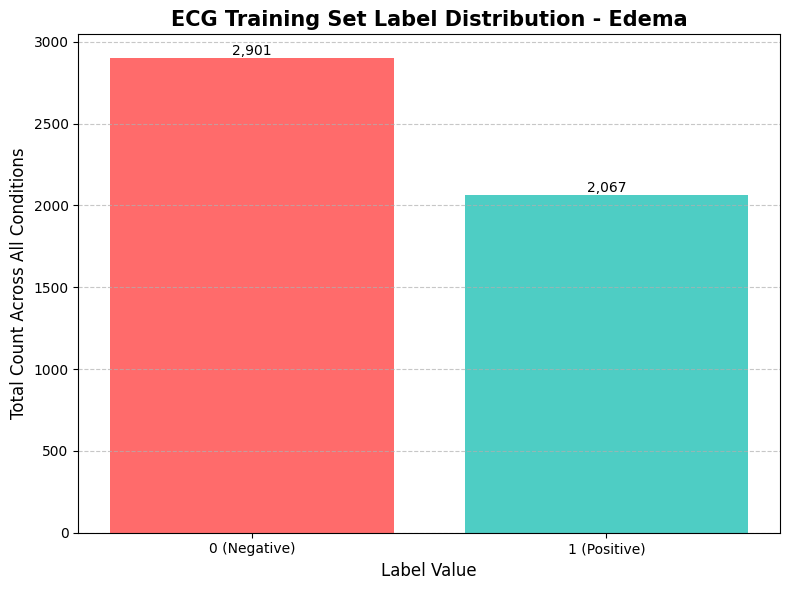


Plot successfully saved as 'edema_ecg_label_distribution.png'

--- Running CXR Analysis & Visualization ---
STATISTICAL ANALYSIS FOR CXR CLASS: EDEMA

--- TRAIN SET (Edema_train.csv) ---
Total entries: 4,968

Condition label distribution:
  • Edema           : Pos=2,067   ( 41.6%) | Neg=2,901   | Total Labeled=4,968  

--- VAL SET (Edema_val.csv) ---
Total entries: 391

Condition label distribution:
  • Edema           : Pos=148     ( 37.9%) | Neg=243     | Total Labeled=391    

--- TEST SET (Edema_test.csv) ---
Total entries: 2,230

Condition label distribution:
  • Edema           : Pos=801     ( 35.9%) | Neg=1,429   | Total Labeled=2,230  

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
VISUALIZING CXR TRAINING SET DISTRIBUTION FOR: EDEMA
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Training Set - Aggregated Label Counts:
0.0    2901
1.0    2067


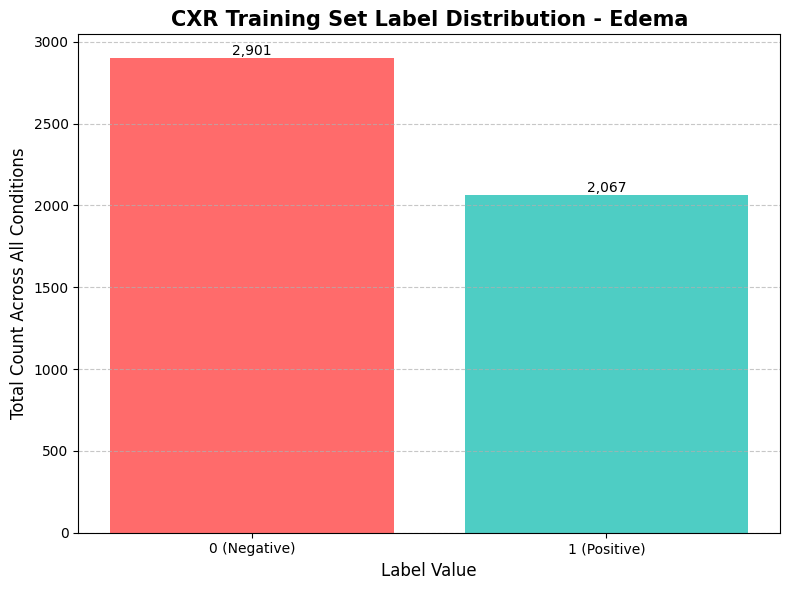


Plot successfully saved as 'edema_cxr_label_distribution.png'

========================= COMPLETED FULL ANALYSIS FOR: EDEMA =========================

--- Starting Multimodal Data Load for Class: Edema ---
  Loaded train CSV: 4,968 total entries.
  Verified CXR-ECG Pairs: 4,968
  Loaded val CSV: 391 total entries.
  Verified CXR-ECG Pairs: 391
  Loaded test CSV: 2,230 total entries.
  Verified CXR-ECG Pairs: 2,230
--- Successfully Loaded Multimodal Dataset for Edema ---


In [3]:
run_full_analysis_for_class('Edema')
loaded_data = load_multimodal_dataset(class_name="Edema")

--- Multimodal Fusion Model Training for: Edema ---
Using device: cuda:0

--- Starting Multimodal Data Load for Class: Edema ---
  Loaded train CSV: 4,968 total entries.
  Verified CXR-ECG Pairs: 4,968
  Loaded val CSV: 391 total entries.
  Verified CXR-ECG Pairs: 391
  Loaded test CSV: 2,230 total entries.
  Verified CXR-ECG Pairs: 2,230
--- Successfully Loaded Multimodal Dataset for Edema ---

                         Model Architecture Summary

Using 2 GPUs! Wrapping model in DataParallel.

--- Running a pre-flight check to inspect tensor shapes at fusion point ---

--- Verified ECG Tensor Shape: torch.Size([12, 5000]) ---


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


--- CXR features shape: torch.Size([32, 1024]), ECG features shape: torch.Size([32, 128]) ---
--- Combined features shape: torch.Size([32, 1152]) ---
--- Pre-flight check complete. ---


                            STARTING MODEL TRAINING



Total Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


--- Verified ECG Tensor Shape: torch.Size([12, 5000]) ---

Epoch 1/20 | Time: 78.93s
Training:   Loss: 0.0816, Acc: 0.6371, F1: 0.6474, AUC: 0.6889
Validation: Loss: 0.0663, Acc: 0.7442, F1: 0.6894, AUC: 0.8182
---> CHECKPOINT: New best model saved with validation AUC: 0.8182


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 2/20 | Time: 77.49s
Training:   Loss: 0.0734, Acc: 0.7001, F1: 0.6964, AUC: 0.7666
Validation: Loss: 0.0619, Acc: 0.7570, F1: 0.6735, AUC: 0.8427
---> CHECKPOINT: New best model saved with validation AUC: 0.8427


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 3/20 | Time: 76.09s
Training:   Loss: 0.0678, Acc: 0.7397, F1: 0.7495, AUC: 0.8122
Validation: Loss: 0.0633, Acc: 0.7570, F1: 0.7112, AUC: 0.8427


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 4/20 | Time: 75.52s
Training:   Loss: 0.0669, Acc: 0.7454, F1: 0.7491, AUC: 0.8205
Validation: Loss: 0.0596, Acc: 0.7775, F1: 0.7203, AUC: 0.8515
---> CHECKPOINT: New best model saved with validation AUC: 0.8515

Epoch 5: Unfreezing last TWO VGG blocks.


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 5/20 | Time: 83.44s
Training:   Loss: 0.0634, Acc: 0.7591, F1: 0.7686, AUC: 0.8382
Validation: Loss: 0.0588, Acc: 0.7852, F1: 0.7143, AUC: 0.8558
---> CHECKPOINT: New best model saved with validation AUC: 0.8558


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 6/20 | Time: 83.73s
Training:   Loss: 0.0592, Acc: 0.7893, F1: 0.7937, AUC: 0.8670
Validation: Loss: 0.0634, Acc: 0.8005, F1: 0.6929, AUC: 0.8613
---> CHECKPOINT: New best model saved with validation AUC: 0.8613


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 7/20 | Time: 83.83s
Training:   Loss: 0.0572, Acc: 0.7957, F1: 0.8057, AUC: 0.8768
Validation: Loss: 0.0641, Acc: 0.7724, F1: 0.7245, AUC: 0.8608


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 8/20 | Time: 84.29s
Training:   Loss: 0.0511, Acc: 0.8293, F1: 0.8312, AUC: 0.9037
Validation: Loss: 0.0599, Acc: 0.8082, F1: 0.7423, AUC: 0.8617
---> CHECKPOINT: New best model saved with validation AUC: 0.8617


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 9/20 | Time: 83.80s
Training:   Loss: 0.0498, Acc: 0.8341, F1: 0.8337, AUC: 0.9095
Validation: Loss: 0.0619, Acc: 0.8133, F1: 0.7683, AUC: 0.8620
---> CHECKPOINT: New best model saved with validation AUC: 0.8620


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 10/20 | Time: 83.94s
Training:   Loss: 0.0485, Acc: 0.8360, F1: 0.8385, AUC: 0.9131
Validation: Loss: 0.0645, Acc: 0.8056, F1: 0.7500, AUC: 0.8572


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 11/20 | Time: 83.50s
Training:   Loss: 0.0435, Acc: 0.8613, F1: 0.8641, AUC: 0.9320
Validation: Loss: 0.0868, Acc: 0.7928, F1: 0.7477, AUC: 0.8393


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 12/20 | Time: 83.49s
Training:   Loss: 0.0405, Acc: 0.8700, F1: 0.8757, AUC: 0.9404
Validation: Loss: 0.0738, Acc: 0.7647, F1: 0.7195, AUC: 0.8467


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 13/20 | Time: 83.69s
Training:   Loss: 0.0357, Acc: 0.8891, F1: 0.8898, AUC: 0.9548
Validation: Loss: 0.0849, Acc: 0.7852, F1: 0.7162, AUC: 0.8475


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 14/20 | Time: 83.78s
Training:   Loss: 0.0350, Acc: 0.8957, F1: 0.8960, AUC: 0.9572
Validation: Loss: 0.0849, Acc: 0.7698, F1: 0.7337, AUC: 0.8443
--- CHECKPOINT: Early stopping triggered after 5 epochs without improvement. ---

========================= FINAL EVALUATION ON TEST SET =========================

--- CHECKPOINT: Loading best model from 'best_Edema_fusion_model.pth' for final testing ---


Testing:   0%|          | 0/70 [00:00<?, ?it/s]


--- Verified ECG Tensor Shape: torch.Size([12, 5000]) ---

Optimal Threshold on Test Set: 0.5374

--- Test Set Metrics (Optimal Threshold) ---
Accuracy:  0.8354
F1-Score:  0.7612
Precision: 0.7948
Recall:    0.7303
AUC:       0.8864

Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

    Negative       0.86      0.89      0.87      1429
    Positive       0.79      0.73      0.76       801

    accuracy                           0.84      2230
   macro avg       0.83      0.81      0.82      2230
weighted avg       0.83      0.84      0.83      2230



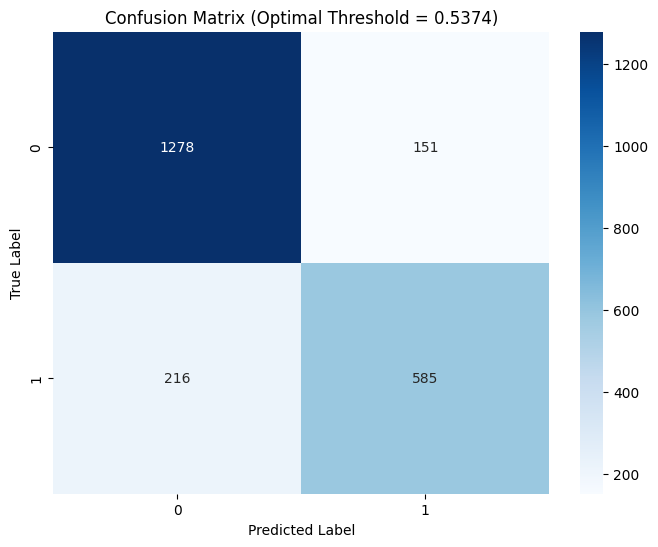

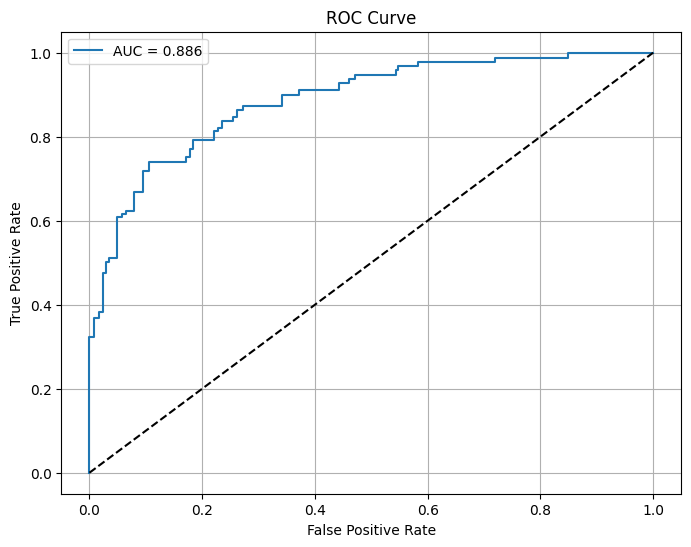

In [9]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torchvision import models, transforms
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve, precision_recall_curve, precision_score, recall_score)
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import time
import pickle
from PIL import Image
from typing import Dict, List, Any
from torchinfo import summary

# =================================================================================
# >> 1. CONFIGURATION
# =================================================================================

# --- Paths ---
# IMPORTANT: Update these base paths to match your environment
BASE_CSV_PATH = '/kaggle/input/symile-mimic-1-0-0/symile-mimic-1.0.0/CSV'
BASE_IMAGE_PATH = '/kaggle/input/symile-mimic-1-0-0/symile-mimic-1.0.0/Images'
BASE_ECG_PATH = '/kaggle/input/symile-mimic-1-0-0/symile-mimic-1.0.0/ECG'

# --- Training Hyperparameters ---
TARGET_CLASS = 'Edema'
BATCH_SIZE = 32 # Adjusted for potentially larger model size
NUM_EPOCHS = 20
INITIAL_LR = 1e-4
UNFREEZE_LR_CXR = 1e-5 # Slower LR for the unfrozen VGG layers
UNFREEZE_LR_ECG = 1e-4 # ECG model trains from scratch
WEIGHT_DECAY = 0.01
UNFREEZE_EPOCH = 4 # Epoch at which to unfreeze VGG layers
EARLY_STOPPING_PATIENCE = 5

# --- Mappings for Data Loader ---
SPLIT_IMAGE_FOLDERS = {'train': 'train_images', 'val': 'val_images', 'test': 'test_images'}
SPLIT_ECG_FOLDERS = {'train': 'train', 'val': 'val', 'test': 'test'}


# =================================================================================
# >> 2. DATA LOADING & PYTORCH DATASET
# (FIX: Restored this missing section)
# =================================================================================

def load_multimodal_dataset(class_name: str) -> Dict[str, Dict[str, Any]]:
    if not os.path.exists(BASE_CSV_PATH):
        print(f"Error: Base CSV path not found: {BASE_CSV_PATH}")
        return {}

    result_data = {}
    condition_csv_path = os.path.join(BASE_CSV_PATH, class_name)
    print(f"\n--- Starting Multimodal Data Load for Class: {class_name} ---")

    for split_type in SPLIT_IMAGE_FOLDERS.keys():
        csv_path = os.path.join(condition_csv_path, f'{class_name}_{split_type}.csv')
        verified_rows, verified_image_paths, verified_ecg_paths = [], [], []

        if os.path.exists(csv_path):
            try:
                df = pd.read_csv(csv_path)
                print(f"  Loaded {split_type} CSV: {len(df):,} total entries.")
                base_img_folder = os.path.join(BASE_IMAGE_PATH, SPLIT_IMAGE_FOLDERS[split_type])
                base_ecg_folder = os.path.join(BASE_ECG_PATH, SPLIT_ECG_FOLDERS[split_type], 'files')

                if os.path.exists(base_img_folder) and os.path.exists(base_ecg_folder):
                    for _, row in df.iterrows():
                        img_filename = os.path.basename(str(row['cxr_path']).replace('\\', '/'))
                        full_img_path = os.path.join(base_img_folder, img_filename)
                        
                        path_parts = str(row['ecg_path']).replace('\\', '/').split('/')
                        full_ecg_path = None
                        if len(path_parts) >= 4:
                            p_id, s_id, study_id, ecg_id = path_parts[-4:]
                            prospective_path = os.path.join(base_ecg_folder, p_id, s_id, study_id, f"{ecg_id}.npy")
                            if os.path.exists(prospective_path):
                                full_ecg_path = prospective_path
                        
                        if os.path.exists(full_img_path) and full_ecg_path:
                            verified_image_paths.append(full_img_path)
                            verified_ecg_paths.append(full_ecg_path)
                            verified_rows.append(row)

                print(f"  Verified CXR-ECG Pairs: {len(verified_image_paths):,}")
            except Exception as e:
                print(f"  Error processing {csv_path}: {e}")
        else:
            print(f"  Warning: CSV not found for {split_type} at {csv_path}")

        result_data[split_type] = {
            'df': pd.DataFrame(verified_rows).reset_index(drop=True),
            'image_paths': verified_image_paths,
            'ecg_paths': verified_ecg_paths
        }
    print(f"--- Successfully Loaded Multimodal Dataset for {class_name} ---")
    return result_data


class MultiModalDataset(Dataset):
    def __init__(self, dataframe, image_paths, ecg_paths, condition_name, image_transform=None, is_train=False):
        self.dataframe = dataframe
        self.image_paths = image_paths
        self.ecg_paths = ecg_paths
        self.condition_name = condition_name
        self.image_transform = image_transform
        self.is_train = is_train
        self.has_printed_shape = False

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Image
        image = Image.open(self.image_paths[idx]).convert('RGB')
        image_tensor = self.image_transform(image) if self.image_transform else transforms.ToTensor()(image)

        # ECG
        ecg = np.load(self.ecg_paths[idx])
        if ecg.ndim == 3: ecg = np.squeeze(ecg)

        if self.is_train: # Augment ECG
            shift = np.random.randint(-100, 101)
            ecg = np.roll(ecg, shift, axis=0)
            ecg = ecg * np.random.uniform(0.9, 1.1)
            noise = np.random.randn(*ecg.shape) * np.std(ecg) * 0.01
            ecg = ecg + noise

        ecg_tensor = torch.tensor(ecg, dtype=torch.float32).permute(1, 0)
        
        if not self.has_printed_shape:
            print(f"\n--- Verified ECG Tensor Shape: {ecg_tensor.shape} ---")
            self.has_printed_shape = True

        label = torch.tensor(self.dataframe.iloc[idx][self.condition_name], dtype=torch.float32)
        return image_tensor, ecg_tensor, label


# =================================================================================
# >> 3. LOSS FUNCTION & MODEL ARCHITECTURES
# =================================================================================

class FocalLoss(nn.Module):
    def __init__(self, alpha=0.5, gamma=2.0, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1 - pt)**self.gamma * BCE_loss
        return torch.mean(F_loss) if self.reduction == 'mean' else torch.sum(F_loss)


class Custom1DCNN(nn.Module):
    def __init__(self):
        super(Custom1DCNN, self).__init__()
        self.features = nn.Sequential(
            self._make_conv_block(12, 64, 5),
            self._make_conv_block(64, 128, 5),
            self._make_conv_block(128, 256, 3),
            nn.AdaptiveAvgPool1d(1)
        )
        # We will extract features from this layer
        self.feature_extractor_fc = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5)
        )
    
    def _make_conv_block(self, in_channels, out_channels, kernel_size):
        return nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size, padding='same', bias=False),
            nn.BatchNorm1d(out_channels), nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.feature_extractor_fc(x)
        return x


class FusionModel(nn.Module):
    def __init__(self, num_classes=1, pretrained_vgg=True):
        super(FusionModel, self).__init__()
        # --- CXR Branch (VGG16) ---
        self.vgg = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1 if pretrained_vgg else None)
        # Freeze feature layers initially
        for param in self.vgg.features.parameters():
            param.requires_grad = False
        
        # Modify classifier to be a feature extractor
        num_vgg_features = self.vgg.classifier[0].in_features
        self.vgg.classifier = nn.Sequential(
            nn.Linear(num_vgg_features, 4096), nn.ReLU(True), nn.Dropout(0.5),
            nn.Linear(4096, 1024), nn.ReLU(True), nn.Dropout(0.5)
        )

        # --- ECG Branch (1D CNN) ---
        self.ecg_cnn = Custom1DCNN()
        
        # --- Fusion Classifier ---
        # Input features: 1024 from VGG + 128 from ECG CNN
        self.fusion_classifier = nn.Sequential(
            nn.Linear(1024 + 128, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )
        
    def forward(self, cxr_input, ecg_input):
        cxr_features = self.vgg(cxr_input)
        ecg_features = self.ecg_cnn(ecg_input)
        
        combined_features = torch.cat((cxr_features, ecg_features), dim=1)
        output = self.fusion_classifier(combined_features)
        return output

# =================================================================================
# >> 4. TRAIN & VALIDATE FUNCTIONS
# =================================================================================

def train_epoch(model, loader, criterion, optimizer, device, gpu_transforms):
    model.train()
    running_loss = 0.0
    predictions, true_labels = [], []
    for images, ecgs, labels in tqdm(loader, desc="Training", leave=False):
        images, ecgs, labels = images.to(device, non_blocking=True), ecgs.to(device, non_blocking=True), labels.to(device, non_blocking=True)
        
        images = gpu_transforms(images) # Apply GPU-based augmentations
        
        optimizer.zero_grad()
        outputs = model(images, ecgs)
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        predictions.extend(torch.sigmoid(outputs).cpu().detach().numpy())
        true_labels.extend(labels.cpu().numpy())
    
    predictions = np.array(predictions).squeeze()
    true_labels = np.array(true_labels)
    pred_labels = (predictions > 0.5).astype(int)
    return (running_loss / len(loader),
            accuracy_score(true_labels, pred_labels),
            f1_score(true_labels, pred_labels, zero_division=0),
            roc_auc_score(true_labels, predictions))

def validate(model, loader, criterion, device, gpu_transforms):
    model.eval()
    running_loss = 0.0
    predictions, true_labels = [], []
    with torch.no_grad():
        for images, ecgs, labels in tqdm(loader, desc="Validation", leave=False):
            images, ecgs, labels = images.to(device, non_blocking=True), ecgs.to(device, non_blocking=True), labels.to(device, non_blocking=True)
            images = gpu_transforms(images)
            
            outputs = model(images, ecgs)
            loss = criterion(outputs.squeeze(), labels.float())
            
            running_loss += loss.item()
            predictions.extend(torch.sigmoid(outputs).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    predictions = np.array(predictions).squeeze()
    true_labels = np.array(true_labels)
    pred_labels = (predictions > 0.5).astype(int)
    return (running_loss / len(loader),
            accuracy_score(true_labels, pred_labels),
            f1_score(true_labels, pred_labels, zero_division=0),
            roc_auc_score(true_labels, predictions))

# =================================================================================
# >> 5. MAIN EXECUTION
# =================================================================================

def main():
    print(f"--- Multimodal Fusion Model Training for: {TARGET_CLASS} ---")
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # --- Data Loading ---
    all_data = load_multimodal_dataset(class_name=TARGET_CLASS)
    if all_data['train']['df'].empty:
        print("FATAL: No training data found. Exiting.")
        return

    # --- Data Transforms ---
    cpu_initial_transform = transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()])
    gpu_train_transforms = nn.Sequential(
        transforms.RandomRotation(15), transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(224),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ).to(device)
    gpu_eval_transforms = nn.Sequential(
        transforms.CenterCrop(224),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ).to(device)

    # --- Datasets and Sampler ---
    train_dataset = MultiModalDataset(all_data['train']['df'], all_data['train']['image_paths'], all_data['train']['ecg_paths'], TARGET_CLASS, cpu_initial_transform, is_train=True)
    val_dataset = MultiModalDataset(all_data['val']['df'], all_data['val']['image_paths'], all_data['val']['ecg_paths'], TARGET_CLASS, cpu_initial_transform)
    
    labels = all_data['train']['df'][TARGET_CLASS].values
    class_sample_count = np.array([len(np.where(labels == t)[0]) for t in np.unique(labels)])
    weight = 1. / class_sample_count
    samples_weight = torch.from_numpy(np.array([dict(zip(np.unique(labels), weight))[t] for t in labels]))
    sampler = WeightedRandomSampler(samples_weight.double(), len(samples_weight))

    # --- DataLoaders ---
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler, num_workers=0, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0, pin_memory=True)

    # --- Model, Loss, Optimizer ---
    model = FusionModel(num_classes=1).to(device)
    
    # --- FIXED: Print Keras-style Model Summary using torchinfo ---
    print("\n" + "="*80)
    print(" " * 25 + "Model Architecture Summary")
    print("="*80)
    # The model expects two inputs: a CXR image and an ECG signal.
    # We provide the input shapes including the batch dimension for torchinfo.
    # CXR input shape: (batch, channels, height, width)
    # ECG input shape: (batch, channels, sequence_length)
    summary(model, input_size=[(BATCH_SIZE, 3, 224, 224), (BATCH_SIZE, 12, 5000)])
    print("="*80 + "\n")
        
    if torch.cuda.device_count() > 1:
        print(f"Using {torch.cuda.device_count()} GPUs! Wrapping model in DataParallel.")
        model = nn.DataParallel(model)
        
    criterion = FocalLoss(alpha=0.5, gamma=2.0)
    optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=INITIAL_LR, weight_decay=WEIGHT_DECAY)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2, verbose=True)

    # --- Pre-flight check to show fusion shapes ---
    print("\n--- Running a pre-flight check to inspect tensor shapes at fusion point ---")
    model_to_check = model.module if isinstance(model, nn.DataParallel) else model
    model_to_check.eval() # Use eval mode for the check
    
    try:
        # Get a single batch from the dataloader
        cxr_sample, ecg_sample, _ = next(iter(train_loader))
        cxr_sample, ecg_sample = cxr_sample.to(device), ecg_sample.to(device)
        
        # Manually perform the forward pass steps to get intermediate features
        with torch.no_grad():
            cxr_features = model_to_check.vgg(cxr_sample)
            ecg_features = model_to_check.ecg_cnn(ecg_sample)
            combined_features = torch.cat((cxr_features, ecg_features), dim=1)
        
        print(f"--- CXR features shape: {cxr_features.shape}, ECG features shape: {ecg_features.shape} ---")
        print(f"--- Combined features shape: {combined_features.shape} ---")
        print("--- Pre-flight check complete. ---\n")

    except Exception as e:
        print(f"Could not perform pre-flight check: {e}")


    # --- Training Loop ---
    best_val_auc = 0.0
    epochs_no_improve = 0
    history = {k: [] for k in ['train_loss', 'train_acc', 'train_f1', 'train_auc', 'val_loss', 'val_acc', 'val_f1', 'val_auc']}

    # --- ADDED: Announce start of training ---
    print("\n" + "="*80)
    print(" " * 28 + "STARTING MODEL TRAINING")
    print("="*80 + "\n")

    for epoch in tqdm(range(NUM_EPOCHS), desc="Total Epochs"):
        if epoch == UNFREEZE_EPOCH:
            print("\n" + "="*50 + f"\nEpoch {epoch+1}: Unfreezing last TWO VGG blocks.\n" + "="*50)
            model_to_unfreeze = model.module if isinstance(model, nn.DataParallel) else model
            for param in model_to_unfreeze.vgg.features[17:].parameters():
                param.requires_grad = True
            
            optimizer = torch.optim.AdamW([
                {'params': model_to_unfreeze.vgg.features[17:].parameters(), 'lr': UNFREEZE_LR_CXR},
                {'params': model_to_unfreeze.vgg.classifier.parameters(), 'lr': INITIAL_LR},
                {'params': model_to_unfreeze.ecg_cnn.parameters(), 'lr': UNFREEZE_LR_ECG},
                {'params': model_to_unfreeze.fusion_classifier.parameters(), 'lr': INITIAL_LR}
            ], weight_decay=WEIGHT_DECAY)
            scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2, verbose=True)

        start_time = time.time()
        train_loss, train_acc, train_f1, train_auc = train_epoch(model, train_loader, criterion, optimizer, device, gpu_train_transforms)
        val_loss, val_acc, val_f1, val_auc = validate(model, val_loader, criterion, device, gpu_eval_transforms)
        
        # Log history
        for key, val in zip(history.keys(), [train_loss, train_acc, train_f1, train_auc, val_loss, val_acc, val_f1, val_auc]):
            history[key].append(val)
        
        print(f'\nEpoch {epoch+1}/{NUM_EPOCHS} | Time: {time.time() - start_time:.2f}s')
        print(f'Training:   Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, F1: {train_f1:.4f}, AUC: {train_auc:.4f}')
        print(f'Validation: Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, F1: {val_f1:.4f}, AUC: {val_auc:.4f}')
        
        scheduler.step(val_auc)

        if val_auc > best_val_auc:
            best_val_auc = val_auc
            epochs_no_improve = 0
            state_dict = model.module.state_dict() if isinstance(model, nn.DataParallel) else model.state_dict()
            torch.save(state_dict, f'best_{TARGET_CLASS}_fusion_model.pth')
            print(f'---> CHECKPOINT: New best model saved with validation AUC: {val_auc:.4f}')
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= EARLY_STOPPING_PATIENCE:
                print(f"--- CHECKPOINT: Early stopping triggered after {EARLY_STOPPING_PATIENCE} epochs without improvement. ---")
                break
    
    # --- Final Evaluation ---
    evaluate_on_test_set(TARGET_CLASS, all_data, gpu_eval_transforms, device)


# =================================================================================
# >> 6. FINAL EVALUATION ON TEST SET
# =================================================================================
def evaluate_on_test_set(class_name, all_data, gpu_transforms, device):
    print("\n" + "="*25 + " FINAL EVALUATION ON TEST SET " + "="*25)
    
    # --- Load best model ---
    model = FusionModel(num_classes=1).to(device)
    print(f"\n--- CHECKPOINT: Loading best model from 'best_{class_name}_fusion_model.pth' for final testing ---")
    model.load_state_dict(torch.load(f'best_{class_name}_fusion_model.pth'))
    model.eval()

    # --- Test DataLoader ---
    test_dataset = MultiModalDataset(all_data['test']['df'], all_data['test']['image_paths'], all_data['test']['ecg_paths'], class_name, transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()]))
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
    
    # --- Get predictions ---
    y_true, y_prob = [], []
    with torch.no_grad():
        for images, ecgs, labels in tqdm(test_loader, desc="Testing"):
            images, ecgs = images.to(device), ecgs.to(device)
            images = gpu_transforms(images)
            outputs = model(images, ecgs)
            y_true.extend(labels.numpy())
            y_prob.extend(torch.sigmoid(outputs).cpu().numpy())
    
    y_true, y_prob = np.array(y_true), np.array(y_prob).squeeze()

    # --- Find Optimal Threshold ---
    precision, recall, thresholds = precision_recall_curve(y_true, y_prob)
    f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1] + 1e-9)
    best_threshold = thresholds[np.argmax(f1_scores)]
    print(f"\nOptimal Threshold on Test Set: {best_threshold:.4f}")

    y_pred_optimal = (y_prob > best_threshold).astype(int)
    
    # --- Calculate & Display Metrics ---
    auc_score = roc_auc_score(y_true, y_prob)
    print("\n--- Test Set Metrics (Optimal Threshold) ---")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred_optimal):.4f}")
    print(f"F1-Score:  {f1_score(y_true, y_pred_optimal, zero_division=0):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred_optimal, zero_division=0):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred_optimal, zero_division=0):.4f}")
    print(f"AUC:       {auc_score:.4f}")
    
    print("\nClassification Report (Optimal Threshold):")
    print(classification_report(y_true, y_pred_optimal, target_names=['Negative', 'Positive']))

    # --- Plotting ---
    cm = confusion_matrix(y_true, y_pred_optimal)
    plt.figure(figsize=(8, 6)); sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Optimal Threshold = {best_threshold:.4f})'), plt.ylabel('True Label'), plt.xlabel('Predicted Label')
    plt.savefig('fusion_confusion_matrix.png'), plt.show()

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.figure(figsize=(8, 6)); plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
    plt.plot([0, 1], [0, 1], 'k--'), plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate'), plt.title('ROC Curve')
    plt.legend(), plt.grid(True), plt.savefig('fusion_roc_curve.png'), plt.show()

if __name__ == "__main__":
    main()



## Try 2 

--- Multimodal Fusion Model Training for: Edema ---
Using device: cuda:0

--- Starting Multimodal Data Load for Class: Edema ---
  Loaded train CSV: 4,968 total entries.
  Verified CXR-ECG Pairs: 4,968
  Loaded val CSV: 391 total entries.
  Verified CXR-ECG Pairs: 391
  Loaded test CSV: 2,230 total entries.
  Verified CXR-ECG Pairs: 2,230
--- Successfully Loaded Multimodal Dataset for Edema ---

                         Model Architecture Summary

Using 2 GPUs! Wrapping model in DataParallel.

                            STARTING MODEL TRAINING



Total Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 1/20 | Time: 48.56s | LR: 1.0e-04
Training:   Loss: 0.0811, Acc: 0.5761, F1: 0.6732, AUC: 0.6413
Validation: Loss: 0.0758, Acc: 0.5857, F1: 0.6197, AUC: 0.7392
---> CHECKPOINT: New best model saved with validation AUC: 0.7392


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 2/20 | Time: 50.20s | LR: 9.9e-05
Training:   Loss: 0.0760, Acc: 0.6486, F1: 0.6980, AUC: 0.7218
Validation: Loss: 0.0676, Acc: 0.6803, F1: 0.6356, AUC: 0.7811
---> CHECKPOINT: New best model saved with validation AUC: 0.7811


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 3/20 | Time: 49.87s | LR: 9.8e-05
Training:   Loss: 0.0716, Acc: 0.6820, F1: 0.7245, AUC: 0.7647
Validation: Loss: 0.0667, Acc: 0.6701, F1: 0.6523, AUC: 0.7927
---> CHECKPOINT: New best model saved with validation AUC: 0.7927


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 4/20 | Time: 110.03s | LR: 9.5e-05
Training:   Loss: 0.0704, Acc: 0.6892, F1: 0.7220, AUC: 0.7753
Validation: Loss: 0.0636, Acc: 0.7110, F1: 0.6725, AUC: 0.8083
---> CHECKPOINT: New best model saved with validation AUC: 0.8083

Epoch 5: Unfreezing last TWO VGG blocks.


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 5/20 | Time: 50.91s | LR: 1.0e-05
Training:   Loss: 0.0650, Acc: 0.7361, F1: 0.7601, AUC: 0.8192
Validation: Loss: 0.0568, Acc: 0.7724, F1: 0.7003, AUC: 0.8555
---> CHECKPOINT: New best model saved with validation AUC: 0.8555


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 6/20 | Time: 51.09s | LR: 9.9e-06
Training:   Loss: 0.0594, Acc: 0.7828, F1: 0.7965, AUC: 0.8541
Validation: Loss: 0.0557, Acc: 0.7903, F1: 0.7485, AUC: 0.8585
---> CHECKPOINT: New best model saved with validation AUC: 0.8585


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 7/20 | Time: 50.25s | LR: 9.7e-06
Training:   Loss: 0.0578, Acc: 0.7886, F1: 0.8049, AUC: 0.8623
Validation: Loss: 0.0550, Acc: 0.7826, F1: 0.7578, AUC: 0.8715
---> CHECKPOINT: New best model saved with validation AUC: 0.8715


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 8/20 | Time: 50.47s | LR: 9.2e-06
Training:   Loss: 0.0549, Acc: 0.7957, F1: 0.8134, AUC: 0.8781
Validation: Loss: 0.0544, Acc: 0.7877, F1: 0.7649, AUC: 0.8778
---> CHECKPOINT: New best model saved with validation AUC: 0.8778


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 9/20 | Time: 50.33s | LR: 8.7e-06
Training:   Loss: 0.0535, Acc: 0.8007, F1: 0.8133, AUC: 0.8838
Validation: Loss: 0.0535, Acc: 0.7852, F1: 0.7423, AUC: 0.8749


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 10/20 | Time: 50.52s | LR: 8.0e-06
Training:   Loss: 0.0513, Acc: 0.8039, F1: 0.8164, AUC: 0.8946
Validation: Loss: 0.0575, Acc: 0.7545, F1: 0.7377, AUC: 0.8752


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 11/20 | Time: 50.93s | LR: 7.2e-06
Training:   Loss: 0.0512, Acc: 0.8122, F1: 0.8212, AUC: 0.8919
Validation: Loss: 0.0561, Acc: 0.7673, F1: 0.7479, AUC: 0.8800
---> CHECKPOINT: New best model saved with validation AUC: 0.8800


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 12/20 | Time: 50.44s | LR: 6.4e-06
Training:   Loss: 0.0502, Acc: 0.8174, F1: 0.8281, AUC: 0.8976
Validation: Loss: 0.0699, Acc: 0.8107, F1: 0.7197, AUC: 0.8787


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 13/20 | Time: 50.51s | LR: 5.5e-06
Training:   Loss: 0.0460, Acc: 0.8414, F1: 0.8525, AUC: 0.9145
Validation: Loss: 0.0647, Acc: 0.8184, F1: 0.7437, AUC: 0.8789


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 14/20 | Time: 50.56s | LR: 4.6e-06
Training:   Loss: 0.0440, Acc: 0.8452, F1: 0.8573, AUC: 0.9219
Validation: Loss: 0.0591, Acc: 0.8031, F1: 0.7508, AUC: 0.8789


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 15/20 | Time: 270.77s | LR: 3.8e-06
Training:   Loss: 0.0441, Acc: 0.8426, F1: 0.8555, AUC: 0.9208
Validation: Loss: 0.0575, Acc: 0.7928, F1: 0.7477, AUC: 0.8777


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 16/20 | Time: 50.47s | LR: 3.0e-06
Training:   Loss: 0.0426, Acc: 0.8474, F1: 0.8559, AUC: 0.9288
Validation: Loss: 0.0579, Acc: 0.8133, F1: 0.7591, AUC: 0.8756
--- CHECKPOINT: Early stopping triggered after 5 epochs without improvement. ---

========================= FINAL EVALUATION ON TEST SET =========================

--- CHECKPOINT: Loading best model from 'best_Edema_fusion_model_optimized.pth' for final testing ---


Testing:   0%|          | 0/70 [00:00<?, ?it/s]


Optimal Threshold on Test Set: 0.5632

--- Test Set Metrics (Optimal Threshold) ---
Accuracy:  0.8256
F1-Score:  0.7726
Precision: 0.7264
Recall:    0.8252
AUC:       0.8807

Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

    Negative       0.89      0.83      0.86      1429
    Positive       0.73      0.83      0.77       801

    accuracy                           0.83      2230
   macro avg       0.81      0.83      0.82      2230
weighted avg       0.83      0.83      0.83      2230



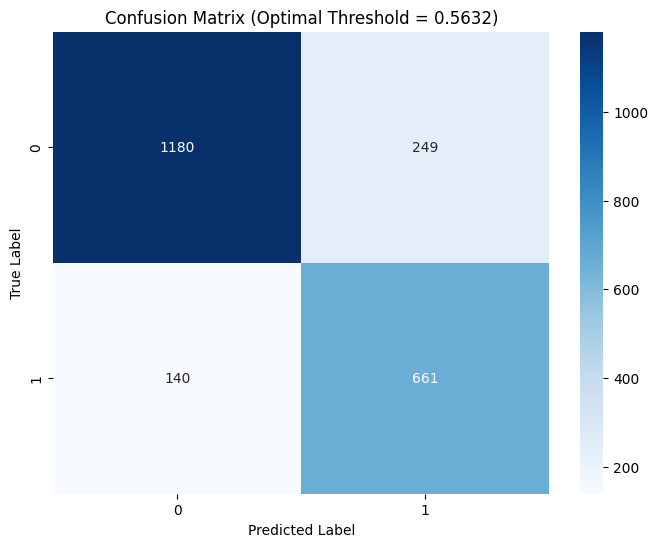

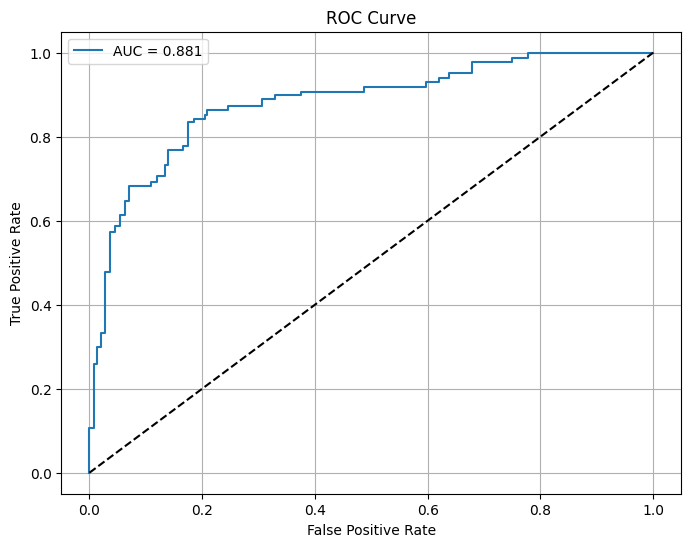

In [12]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torchvision import models, transforms
from torch.optim.lr_scheduler import CosineAnnealingLR # Switched scheduler
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve, precision_recall_curve, precision_score, recall_score)
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import time
import pickle
from PIL import Image
from typing import Dict, List, Any
from torchinfo import summary
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2

# =================================================================================
# >> 1. CONFIGURATION & HYPERPARAMETERS
# =================================================================================

# --- Paths ---
BASE_CSV_PATH = '/kaggle/input/symile-mimic-1-0-0/symile-mimic-1.0.0/CSV'
BASE_IMAGE_PATH = '/kaggle/input/symile-mimic-1-0-0/symile-mimic-1.0.0/Images'
BASE_ECG_PATH = '/kaggle/input/symile-mimic-1-0-0/symile-mimic-1.0.0/ECG'

# --- Training Hyperparameters ---
TARGET_CLASS = 'Edema'
BATCH_SIZE = 32
NUM_EPOCHS = 20
INITIAL_LR = 1e-4
UNFREEZE_LR_CXR = 1e-5 
UNFREEZE_LR_ECG = 1e-4 
WEIGHT_DECAY = 0.01
UNFREEZE_EPOCH = 4
EARLY_STOPPING_PATIENCE = 5

# --- Mappings for Data Loader ---
SPLIT_IMAGE_FOLDERS = {'train': 'train_images', 'val': 'val_images', 'test': 'test_images'}
SPLIT_ECG_FOLDERS = {'train': 'train', 'val': 'val', 'test': 'test'}

# =================================================================================
# >> 2. ADVANCED AUGMENTATIONS & DATA LOADING
# =================================================================================

def get_transforms():
    # Using Albumentations for more powerful image augmentation
    train_transform = A.Compose([
        A.Resize(256, 256),
        A.RandomCrop(224, 224),
        A.HorizontalFlip(p=0.5),
        # FIX: Replaced deprecated ShiftScaleRotate with Affine
        A.Affine(
            scale=(0.95, 1.05), 
            translate_percent=(-0.05, 0.05), 
            rotate=(-10, 10), 
            p=0.5
        ),
        A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=0.5),
        A.ElasticTransform(p=0.5), # Good for medical images
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2()
    ])
    
    val_test_transform = A.Compose([
        A.Resize(224, 224),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2()
    ])
    return train_transform, val_test_transform

def load_multimodal_dataset(class_name: str) -> Dict[str, Dict[str, Any]]:
    if not os.path.exists(BASE_CSV_PATH):
        print(f"Error: Base CSV path not found: {BASE_CSV_PATH}")
        return {}

    result_data = {}
    condition_csv_path = os.path.join(BASE_CSV_PATH, class_name)
    print(f"\n--- Starting Multimodal Data Load for Class: {class_name} ---")

    for split_type in SPLIT_IMAGE_FOLDERS.keys():
        csv_path = os.path.join(condition_csv_path, f'{class_name}_{split_type}.csv')
        verified_rows, verified_image_paths, verified_ecg_paths = [], [], []

        if os.path.exists(csv_path):
            try:
                df = pd.read_csv(csv_path)
                print(f"  Loaded {split_type} CSV: {len(df):,} total entries.")
                base_img_folder = os.path.join(BASE_IMAGE_PATH, SPLIT_IMAGE_FOLDERS[split_type])
                base_ecg_folder = os.path.join(BASE_ECG_PATH, SPLIT_ECG_FOLDERS[split_type], 'files')

                if os.path.exists(base_img_folder) and os.path.exists(base_ecg_folder):
                    for _, row in df.iterrows():
                        img_filename = os.path.basename(str(row['cxr_path']).replace('\\', '/'))
                        full_img_path = os.path.join(base_img_folder, img_filename)
                        
                        path_parts = str(row['ecg_path']).replace('\\', '/').split('/')
                        full_ecg_path = None
                        if len(path_parts) >= 4:
                            p_id, s_id, study_id, ecg_id = path_parts[-4:]
                            prospective_path = os.path.join(base_ecg_folder, p_id, s_id, study_id, f"{ecg_id}.npy")
                            if os.path.exists(prospective_path):
                                full_ecg_path = prospective_path
                        
                        if os.path.exists(full_img_path) and full_ecg_path:
                            verified_image_paths.append(full_img_path)
                            verified_ecg_paths.append(full_ecg_path)
                            verified_rows.append(row)

                print(f"  Verified CXR-ECG Pairs: {len(verified_image_paths):,}")
            except Exception as e:
                print(f"  Error processing {csv_path}: {e}")
        else:
            print(f"  Warning: CSV not found for {split_type} at {csv_path}")

        result_data[split_type] = {
            'df': pd.DataFrame(verified_rows).reset_index(drop=True),
            'image_paths': verified_image_paths,
            'ecg_paths': verified_ecg_paths
        }
    print(f"--- Successfully Loaded Multimodal Dataset for {class_name} ---")
    return result_data


class MultiModalDataset(Dataset):
    def __init__(self, dataframe, image_paths, ecg_paths, condition_name, image_transform=None, is_train=False):
        self.dataframe = dataframe
        self.image_paths = image_paths
        self.ecg_paths = ecg_paths
        self.condition_name = condition_name
        self.image_transform = image_transform
        self.is_train = is_train
        # self.has_printed_shape = False # This flag is no longer needed

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Image Loading with OpenCV for Albumentations
        image = cv2.imread(self.image_paths[idx])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.image_transform:
            image = self.image_transform(image=image)['image']
        else: # Fallback
            image = transforms.ToTensor()(image)

        # ECG
        ecg = np.load(self.ecg_paths[idx])
        if ecg.ndim == 3: ecg = np.squeeze(ecg)

        if self.is_train: # Augment ECG
            shift = np.random.randint(-100, 101)
            ecg = np.roll(ecg, shift, axis=0)
            ecg = ecg * np.random.uniform(0.9, 1.1)
            noise = np.random.randn(*ecg.shape) * np.std(ecg) * 0.01
            ecg = ecg + noise

        ecg_tensor = torch.tensor(ecg, dtype=torch.float32).permute(1, 0)
        
        # FIX: Removed the redundant print statement that was firing for each worker.
        # The shape has been verified, so this is no longer needed.

        label = torch.tensor(self.dataframe.iloc[idx][self.condition_name], dtype=torch.float32)
        return image, ecg_tensor, label

# =================================================================================
# >> 3. FOCAL LOSS & IMPROVED MODEL ARCHITECTURE
# =================================================================================

class FocalLoss(nn.Module):
    def __init__(self, alpha=0.6, gamma=2.0, reduction='mean'): # IMPROVEMENT: Adjusted alpha
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        # Calculate alpha-weighted loss
        at = self.alpha * targets + (1 - self.alpha) * (1 - targets)
        F_loss = at * (1 - pt)**self.gamma * BCE_loss
        return torch.mean(F_loss) if self.reduction == 'mean' else torch.sum(F_loss)


class Custom1DCNN(nn.Module):
    def __init__(self):
        super(Custom1DCNN, self).__init__()
        self.features = nn.Sequential(
            self._make_conv_block(12, 64, 5),
            self._make_conv_block(64, 128, 5),
            self._make_conv_block(128, 256, 3),
            nn.AdaptiveAvgPool1d(1)
        )
        self.feature_extractor_fc = nn.Sequential(nn.Linear(256, 128), nn.ReLU(True), nn.Dropout(0.5))
    
    def _make_conv_block(self, in_c, out_c, k_size):
        return nn.Sequential(
            nn.Conv1d(in_c, out_c, k_size, padding='same', bias=False),
            nn.BatchNorm1d(out_c), nn.ReLU(True), nn.MaxPool1d(2, 2))

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.feature_extractor_fc(x)


class FusionModel(nn.Module):
    def __init__(self, num_classes=1, pretrained_vgg=True):
        super(FusionModel, self).__init__()
        # --- CXR Branch (VGG16) ---
        self.vgg = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1 if pretrained_vgg else None)
        for param in self.vgg.features.parameters():
            param.requires_grad = False
        
        # IMPROVEMENT: Modernized VGG Head with Global Average Pooling
        # FIX: The last conv layer is at index -3, not -1 (which is MaxPool)
        num_vgg_features = self.vgg.features[-3].out_channels # 512 for VGG16
        self.vgg.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.vgg.classifier = nn.Sequential(
            nn.Linear(num_vgg_features, 512), # Reduced size
            nn.ReLU(True), nn.Dropout(0.5)
        )

        # --- ECG Branch (1D CNN) ---
        self.ecg_cnn = Custom1DCNN()
        
        # --- Fusion Classifier ---
        # Input features: 512 from VGG + 128 from ECG CNN
        self.fusion_classifier = nn.Sequential(
            nn.Linear(512 + 128, 256), # Reduced size
            nn.ReLU(True), nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )
        
    def forward(self, cxr_input, ecg_input):
        # VGG forward pass with the new head
        cxr_features = self.vgg.features(cxr_input)
        cxr_features = self.vgg.avgpool(cxr_features)
        cxr_features = torch.flatten(cxr_features, 1)
        cxr_features = self.vgg.classifier(cxr_features)

        ecg_features = self.ecg_cnn(ecg_input)
        
        combined_features = torch.cat((cxr_features, ecg_features), dim=1)
        output = self.fusion_classifier(combined_features)
        return output

# =================================================================================
# >> 4. TRAIN & VALIDATE FUNCTIONS
# =================================================================================

def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    predictions, true_labels = [], []
    for images, ecgs, labels in tqdm(loader, desc="Training", leave=False):
        images, ecgs, labels = images.to(device), ecgs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images, ecgs)
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        predictions.extend(torch.sigmoid(outputs).cpu().detach().numpy())
        true_labels.extend(labels.cpu().numpy())
    
    predictions = np.array(predictions).squeeze()
    true_labels = np.array(true_labels)
    pred_labels = (predictions > 0.5).astype(int)
    return (running_loss / len(loader),
            accuracy_score(true_labels, pred_labels),
            f1_score(true_labels, pred_labels, zero_division=0),
            roc_auc_score(true_labels, predictions))

def validate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    predictions, true_labels = [], []
    with torch.no_grad():
        for images, ecgs, labels in tqdm(loader, desc="Validation", leave=False):
            images, ecgs, labels = images.to(device), ecgs.to(device), labels.to(device)
            outputs = model(images, ecgs)
            loss = criterion(outputs.squeeze(), labels.float())
            running_loss += loss.item()
            predictions.extend(torch.sigmoid(outputs).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    predictions = np.array(predictions).squeeze()
    true_labels = np.array(true_labels)
    pred_labels = (predictions > 0.5).astype(int)
    return (running_loss / len(loader),
            accuracy_score(true_labels, pred_labels),
            f1_score(true_labels, pred_labels, zero_division=0),
            roc_auc_score(true_labels, predictions))

# =================================================================================
# >> 5. MAIN EXECUTION
# =================================================================================

def main():
    print(f"--- Multimodal Fusion Model Training for: {TARGET_CLASS} ---")
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # --- Data Loading ---
    all_data = load_multimodal_dataset(class_name=TARGET_CLASS)
    if all_data['train']['df'].empty: return

    # --- Data Transforms ---
    train_transform, val_test_transform = get_transforms()

    # --- Datasets and Sampler ---
    train_dataset = MultiModalDataset(all_data['train']['df'], all_data['train']['image_paths'], all_data['train']['ecg_paths'], TARGET_CLASS, train_transform, is_train=True)
    val_dataset = MultiModalDataset(all_data['val']['df'], all_data['val']['image_paths'], all_data['val']['ecg_paths'], TARGET_CLASS, val_test_transform)
    
    labels = all_data['train']['df'][TARGET_CLASS].values
    class_counts = np.bincount(labels.astype(int))
    class_weights = 1. / class_counts
    sample_weights = torch.from_numpy(np.array([class_weights[t] for t in labels.astype(int)]))
    sampler = WeightedRandomSampler(sample_weights.double(), len(sample_weights))

    # --- DataLoaders ---
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler, num_workers=2, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

    # --- Model, Loss, Optimizer ---
    model = FusionModel(num_classes=1).to(device)
    
    print("\n" + "="*80 + "\n" + " " * 25 + "Model Architecture Summary" + "\n" + "="*80)
    summary(model, input_size=[(BATCH_SIZE, 3, 224, 224), (BATCH_SIZE, 12, 5000)], device=device)
    print("="*80 + "\n")
        
    if torch.cuda.device_count() > 1:
        print(f"Using {torch.cuda.device_count()} GPUs! Wrapping model in DataParallel.")
        model = nn.DataParallel(model)
        
    criterion = FocalLoss()
    optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=INITIAL_LR, weight_decay=WEIGHT_DECAY)
    scheduler = CosineAnnealingLR(optimizer, T_max=NUM_EPOCHS, eta_min=1e-6) # IMPROVEMENT: Switched scheduler

    # --- Training Loop ---
    best_val_auc = 0.0
    epochs_no_improve = 0
    history = {k: [] for k in ['train_loss', 'train_acc', 'train_f1', 'train_auc', 'val_loss', 'val_acc', 'val_f1', 'val_auc']}

    print("\n" + "="*80 + "\n" + " " * 28 + "STARTING MODEL TRAINING" + "\n" + "="*80 + "\n")

    for epoch in tqdm(range(NUM_EPOCHS), desc="Total Epochs"):
        if epoch == UNFREEZE_EPOCH:
            print("\n" + "="*50 + f"\nEpoch {epoch+1}: Unfreezing last TWO VGG blocks.\n" + "="*50)
            model_to_unfreeze = model.module if isinstance(model, nn.DataParallel) else model
            for param in model_to_unfreeze.vgg.features[17:].parameters():
                param.requires_grad = True
            
            optimizer = torch.optim.AdamW([
                {'params': model_to_unfreeze.vgg.features[17:].parameters(), 'lr': UNFREEZE_LR_CXR},
                {'params': model_to_unfreeze.vgg.classifier.parameters(), 'lr': INITIAL_LR},
                {'params': model_to_unfreeze.ecg_cnn.parameters(), 'lr': UNFREEZE_LR_ECG},
                {'params': model_to_unfreeze.fusion_classifier.parameters(), 'lr': INITIAL_LR}
            ], weight_decay=WEIGHT_DECAY)
            scheduler = CosineAnnealingLR(optimizer, T_max=NUM_EPOCHS-UNFREEZE_EPOCH, eta_min=1e-6)

        start_time = time.time()
        train_loss, train_acc, train_f1, train_auc = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc, val_f1, val_auc = validate(model, val_loader, criterion, device)
        
        for key, val in zip(history.keys(), [train_loss, train_acc, train_f1, train_auc, val_loss, val_acc, val_f1, val_auc]):
            history[key].append(val)
        
        print(f'\nEpoch {epoch+1}/{NUM_EPOCHS} | Time: {time.time() - start_time:.2f}s | LR: {optimizer.param_groups[0]["lr"]:.1e}')
        print(f'Training:   Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, F1: {train_f1:.4f}, AUC: {train_auc:.4f}')
        print(f'Validation: Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, F1: {val_f1:.4f}, AUC: {val_auc:.4f}')
        
        scheduler.step()

        if val_auc > best_val_auc:
            best_val_auc = val_auc
            epochs_no_improve = 0
            state_dict = model.module.state_dict() if isinstance(model, nn.DataParallel) else model.state_dict()
            torch.save(state_dict, f'best_{TARGET_CLASS}_fusion_model_optimized.pth')
            print(f'---> CHECKPOINT: New best model saved with validation AUC: {val_auc:.4f}')
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= EARLY_STOPPING_PATIENCE:
                print(f"--- CHECKPOINT: Early stopping triggered after {EARLY_STOPPING_PATIENCE} epochs without improvement. ---")
                break
    
    evaluate_on_test_set(TARGET_CLASS, all_data, val_test_transform, device)


# =================================================================================
# >> 6. FINAL EVALUATION ON TEST SET
# =================================================================================
def evaluate_on_test_set(class_name, all_data, transform, device):
    print("\n" + "="*25 + " FINAL EVALUATION ON TEST SET " + "="*25)
    
    model = FusionModel(num_classes=1).to(device)
    model_path = f'best_{class_name}_fusion_model_optimized.pth'
    print(f"\n--- CHECKPOINT: Loading best model from '{model_path}' for final testing ---")
    model.load_state_dict(torch.load(model_path))
    model.eval()

    test_dataset = MultiModalDataset(all_data['test']['df'], all_data['test']['image_paths'], all_data['test']['ecg_paths'], class_name, transform)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
    
    y_true, y_prob = [], []
    with torch.no_grad():
        for images, ecgs, labels in tqdm(test_loader, desc="Testing"):
            images, ecgs = images.to(device), ecgs.to(device)
            outputs = model(images, ecgs)
            y_true.extend(labels.numpy())
            y_prob.extend(torch.sigmoid(outputs).cpu().numpy())
    
    y_true, y_prob = np.array(y_true), np.array(y_prob).squeeze()

    precision, recall, thresholds = precision_recall_curve(y_true, y_prob)
    f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1] + 1e-9)
    best_threshold = thresholds[np.argmax(f1_scores)]
    print(f"\nOptimal Threshold on Test Set: {best_threshold:.4f}")

    y_pred_optimal = (y_prob > best_threshold).astype(int)
    
    auc_score = roc_auc_score(y_true, y_prob)
    print("\n--- Test Set Metrics (Optimal Threshold) ---")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred_optimal):.4f}")
    print(f"F1-Score:  {f1_score(y_true, y_pred_optimal, zero_division=0):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred_optimal, zero_division=0):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred_optimal, zero_division=0):.4f}")
    print(f"AUC:       {auc_score:.4f}")
    
    print("\nClassification Report (Optimal Threshold):")
    print(classification_report(y_true, y_pred_optimal, target_names=['Negative', 'Positive']))

    cm = confusion_matrix(y_true, y_pred_optimal)
    plt.figure(figsize=(8, 6)); sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Optimal Threshold = {best_threshold:.4f})'), plt.ylabel('True Label'), plt.xlabel('Predicted Label')
    plt.savefig('fusion_confusion_matrix_optimized.png'), plt.show()

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.figure(figsize=(8, 6)); plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
    plt.plot([0, 1], [0, 1], 'k--'), plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate'), plt.title('ROC Curve')
    plt.legend(), plt.grid(True), plt.savefig('fusion_roc_curve_optimized.png'), plt.show()

if __name__ == "__main__":
    main()



# Lung Opacity


========================= STARTING FULL ANALYSIS FOR: LUNG OPACITY =========================

--- Running ECG Analysis & Visualization ---
STATISTICAL ANALYSIS FOR ECG CLASS: LUNG OPACITY

--- TRAIN SET (Lung Opacity_train.csv) ---
Total entries: 4,618

Condition label distribution:
  • Lung Opacity    : Pos=3,108   ( 67.3%) | Neg=1,510   | Total Labeled=4,618  

--- VAL SET (Lung Opacity_val.csv) ---
Total entries: 340

Condition label distribution:
  • Lung Opacity    : Pos=220     ( 64.7%) | Neg=120     | Total Labeled=340    

--- TEST SET (Lung Opacity_test.csv) ---
Total entries: 2,123

Condition label distribution:
  • Lung Opacity    : Pos=1,323   ( 62.3%) | Neg=800     | Total Labeled=2,123  

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
VISUALIZING ECG TRAINING SET DISTRIBUTION FOR: LUNG OPACITY
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Training Set - Aggregated Label Counts:
0.0    1510
1.0    3108


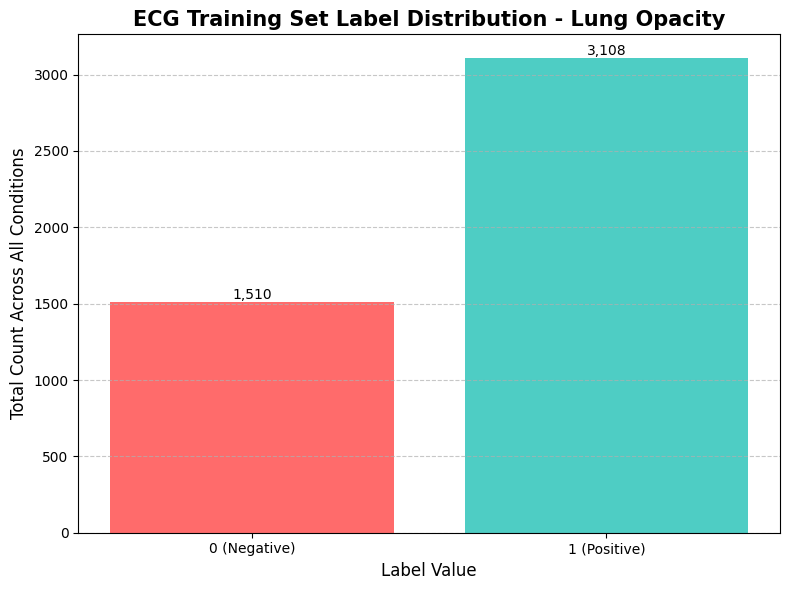


Plot successfully saved as 'lung opacity_ecg_label_distribution.png'

--- Running CXR Analysis & Visualization ---
STATISTICAL ANALYSIS FOR CXR CLASS: LUNG OPACITY

--- TRAIN SET (Lung Opacity_train.csv) ---
Total entries: 4,618

Condition label distribution:
  • Lung Opacity    : Pos=3,108   ( 67.3%) | Neg=1,510   | Total Labeled=4,618  

--- VAL SET (Lung Opacity_val.csv) ---
Total entries: 340

Condition label distribution:
  • Lung Opacity    : Pos=220     ( 64.7%) | Neg=120     | Total Labeled=340    

--- TEST SET (Lung Opacity_test.csv) ---
Total entries: 2,123

Condition label distribution:
  • Lung Opacity    : Pos=1,323   ( 62.3%) | Neg=800     | Total Labeled=2,123  

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
VISUALIZING CXR TRAINING SET DISTRIBUTION FOR: LUNG OPACITY
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Training Set - Aggregated Label Counts:
0.0    1510
1.0    3108


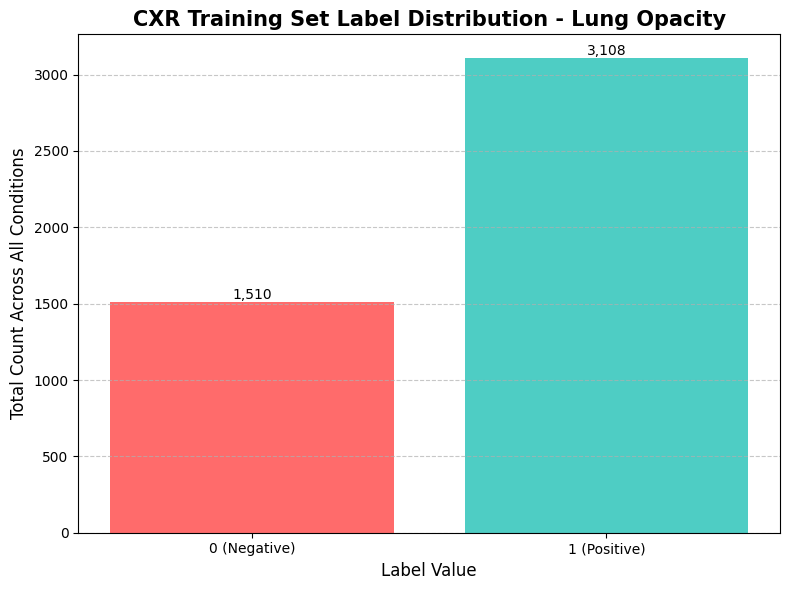


Plot successfully saved as 'lung opacity_cxr_label_distribution.png'

========================= COMPLETED FULL ANALYSIS FOR: LUNG OPACITY =========================

--- Starting Multimodal Data Load for Class: Lung Opacity ---
  Loaded train CSV: 4,618 total entries.
  Verified CXR-ECG Pairs: 4,618
  Loaded val CSV: 340 total entries.
  Verified CXR-ECG Pairs: 340
  Loaded test CSV: 2,123 total entries.
  Verified CXR-ECG Pairs: 2,123
--- Successfully Loaded Multimodal Dataset for Lung Opacity ---


In [4]:
run_full_analysis_for_class('Lung Opacity')
loaded_data = load_multimodal_dataset(class_name="Lung Opacity")

--- Multimodal Fusion Model Training for: Edema ---
Using device: cuda:0

--- Starting Multimodal Data Load for Class: Edema ---
  Loaded train CSV: 4,968 total entries.
  Verified CXR-ECG Pairs: 4,968
  Loaded val CSV: 391 total entries.
  Verified CXR-ECG Pairs: 391
  Loaded test CSV: 2,230 total entries.
  Verified CXR-ECG Pairs: 2,230
--- Successfully Loaded Multimodal Dataset for Edema ---


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 208MB/s] 



                         Model Architecture Summary

Using 2 GPUs! Wrapping model in DataParallel.

                            STARTING MODEL TRAINING



Total Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 1/20 | Time: 66.97s | LR: 1.0e-04
Training:   Loss: 0.0810, Acc: 0.5743, F1: 0.6806, AUC: 0.6396
Validation: Loss: 0.0748, Acc: 0.5882, F1: 0.6282, AUC: 0.7581
---> CHECKPOINT: New best model saved with validation AUC: 0.7581


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 2/20 | Time: 55.34s | LR: 9.9e-05
Training:   Loss: 0.0745, Acc: 0.6645, F1: 0.7179, AUC: 0.7356
Validation: Loss: 0.0689, Acc: 0.6624, F1: 0.6526, AUC: 0.7819
---> CHECKPOINT: New best model saved with validation AUC: 0.7819


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 3/20 | Time: 52.03s | LR: 9.8e-05
Training:   Loss: 0.0700, Acc: 0.6989, F1: 0.7295, AUC: 0.7821
Validation: Loss: 0.0656, Acc: 0.6931, F1: 0.6648, AUC: 0.7976
---> CHECKPOINT: New best model saved with validation AUC: 0.7976


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 4/20 | Time: 50.63s | LR: 9.5e-05
Training:   Loss: 0.0707, Acc: 0.6940, F1: 0.7292, AUC: 0.7738
Validation: Loss: 0.0650, Acc: 0.7084, F1: 0.6798, AUC: 0.8049
---> CHECKPOINT: New best model saved with validation AUC: 0.8049

Epoch 5: Unfreezing last TWO VGG blocks.


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 5/20 | Time: 51.49s | LR: 1.0e-05
Training:   Loss: 0.0643, Acc: 0.7430, F1: 0.7661, AUC: 0.8232
Validation: Loss: 0.0565, Acc: 0.7698, F1: 0.7256, AUC: 0.8592
---> CHECKPOINT: New best model saved with validation AUC: 0.8592


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 6/20 | Time: 51.58s | LR: 9.9e-06
Training:   Loss: 0.0587, Acc: 0.7842, F1: 0.8019, AUC: 0.8599
Validation: Loss: 0.0549, Acc: 0.8031, F1: 0.7390, AUC: 0.8730
---> CHECKPOINT: New best model saved with validation AUC: 0.8730


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 7/20 | Time: 171.90s | LR: 9.7e-06
Training:   Loss: 0.0570, Acc: 0.7893, F1: 0.8038, AUC: 0.8675
Validation: Loss: 0.0536, Acc: 0.8031, F1: 0.7372, AUC: 0.8794
---> CHECKPOINT: New best model saved with validation AUC: 0.8794


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 8/20 | Time: 51.61s | LR: 9.2e-06
Training:   Loss: 0.0542, Acc: 0.8001, F1: 0.8192, AUC: 0.8796
Validation: Loss: 0.0536, Acc: 0.7954, F1: 0.7605, AUC: 0.8823
---> CHECKPOINT: New best model saved with validation AUC: 0.8823


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 9/20 | Time: 51.63s | LR: 8.7e-06
Training:   Loss: 0.0536, Acc: 0.7945, F1: 0.8090, AUC: 0.8847
Validation: Loss: 0.0530, Acc: 0.8107, F1: 0.7784, AUC: 0.8811


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 10/20 | Time: 51.39s | LR: 8.0e-06
Training:   Loss: 0.0511, Acc: 0.8164, F1: 0.8335, AUC: 0.8942
Validation: Loss: 0.0546, Acc: 0.8235, F1: 0.7661, AUC: 0.8857
---> CHECKPOINT: New best model saved with validation AUC: 0.8857


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 11/20 | Time: 50.70s | LR: 7.2e-06
Training:   Loss: 0.0499, Acc: 0.8198, F1: 0.8329, AUC: 0.9001
Validation: Loss: 0.0557, Acc: 0.7852, F1: 0.7600, AUC: 0.8773


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 12/20 | Time: 50.75s | LR: 6.4e-06
Training:   Loss: 0.0469, Acc: 0.8357, F1: 0.8425, AUC: 0.9130
Validation: Loss: 0.0559, Acc: 0.8031, F1: 0.7688, AUC: 0.8749


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 13/20 | Time: 51.12s | LR: 5.5e-06
Training:   Loss: 0.0478, Acc: 0.8219, F1: 0.8332, AUC: 0.9076
Validation: Loss: 0.0573, Acc: 0.8031, F1: 0.7475, AUC: 0.8799


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 14/20 | Time: 50.48s | LR: 4.6e-06
Training:   Loss: 0.0444, Acc: 0.8402, F1: 0.8532, AUC: 0.9212
Validation: Loss: 0.0573, Acc: 0.8056, F1: 0.7654, AUC: 0.8792


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 15/20 | Time: 52.12s | LR: 3.8e-06
Training:   Loss: 0.0447, Acc: 0.8428, F1: 0.8540, AUC: 0.9192
Validation: Loss: 0.0598, Acc: 0.8107, F1: 0.7533, AUC: 0.8771
--- CHECKPOINT: Early stopping triggered after 5 epochs without improvement. ---

========================= FINAL EVALUATION ON TEST SET =========================

--- CHECKPOINT: Loading best model from 'best_Edema_fusion_model_optimized.pth' for final testing ---


Testing:   0%|          | 0/70 [00:00<?, ?it/s]


Optimal Threshold on Test Set: 0.3737

--- Test Set Metrics (Optimal Threshold) ---
Accuracy:  0.8018
F1-Score:  0.7558
Precision: 0.6779
Recall:    0.8539
AUC:       0.8805

Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

    Negative       0.90      0.77      0.83      1429
    Positive       0.68      0.85      0.76       801

    accuracy                           0.80      2230
   macro avg       0.79      0.81      0.79      2230
weighted avg       0.82      0.80      0.81      2230



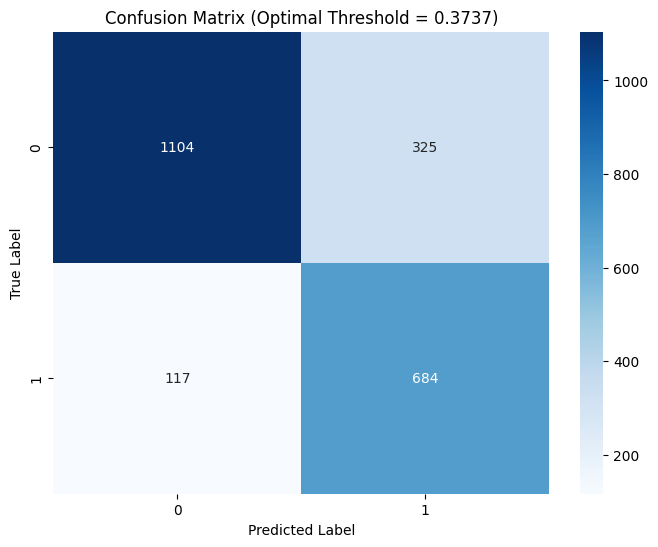

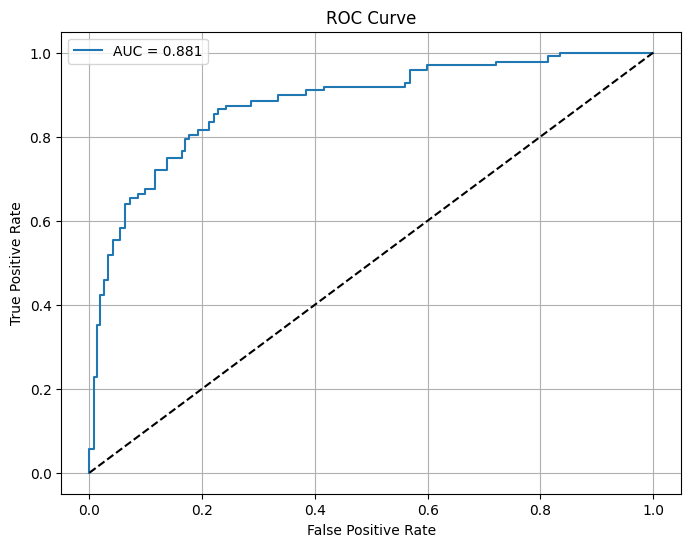

In [5]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torchvision import models, transforms
from torch.optim.lr_scheduler import CosineAnnealingLR # Switched scheduler
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve, precision_recall_curve, precision_score, recall_score)
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import time
import pickle
from PIL import Image
from typing import Dict, List, Any
from torchinfo import summary
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2

# =================================================================================
# >> 1. CONFIGURATION & HYPERPARAMETERS
# =================================================================================

# --- Paths ---
BASE_CSV_PATH = '/kaggle/input/symile-mimic-1-0-0/symile-mimic-1.0.0/CSV'
BASE_IMAGE_PATH = '/kaggle/input/symile-mimic-1-0-0/symile-mimic-1.0.0/Images'
BASE_ECG_PATH = '/kaggle/input/symile-mimic-1-0-0/symile-mimic-1.0.0/ECG'

# --- Training Hyperparameters ---
TARGET_CLASS = 'Edema'
BATCH_SIZE = 32
NUM_EPOCHS = 20
INITIAL_LR = 1e-4
UNFREEZE_LR_CXR = 1e-5 
UNFREEZE_LR_ECG = 1e-4 
WEIGHT_DECAY = 0.01
UNFREEZE_EPOCH = 4
EARLY_STOPPING_PATIENCE = 5

# --- Mappings for Data Loader ---
SPLIT_IMAGE_FOLDERS = {'train': 'train_images', 'val': 'val_images', 'test': 'test_images'}
SPLIT_ECG_FOLDERS = {'train': 'train', 'val': 'val', 'test': 'test'}

# =================================================================================
# >> 2. ADVANCED AUGMENTATIONS & DATA LOADING
# =================================================================================

def get_transforms():
    # Using Albumentations for more powerful image augmentation
    train_transform = A.Compose([
        A.Resize(256, 256),
        A.RandomCrop(224, 224),
        A.HorizontalFlip(p=0.5),
        # FIX: Replaced deprecated ShiftScaleRotate with Affine
        A.Affine(
            scale=(0.95, 1.05), 
            translate_percent=(-0.05, 0.05), 
            rotate=(-10, 10), 
            p=0.5
        ),
        A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=0.5),
        A.ElasticTransform(p=0.5), # Good for medical images
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2()
    ])
    
    val_test_transform = A.Compose([
        A.Resize(224, 224),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2()
    ])
    return train_transform, val_test_transform

def load_multimodal_dataset(class_name: str) -> Dict[str, Dict[str, Any]]:
    if not os.path.exists(BASE_CSV_PATH):
        print(f"Error: Base CSV path not found: {BASE_CSV_PATH}")
        return {}

    result_data = {}
    condition_csv_path = os.path.join(BASE_CSV_PATH, class_name)
    print(f"\n--- Starting Multimodal Data Load for Class: {class_name} ---")

    for split_type in SPLIT_IMAGE_FOLDERS.keys():
        csv_path = os.path.join(condition_csv_path, f'{class_name}_{split_type}.csv')
        verified_rows, verified_image_paths, verified_ecg_paths = [], [], []

        if os.path.exists(csv_path):
            try:
                df = pd.read_csv(csv_path)
                print(f"  Loaded {split_type} CSV: {len(df):,} total entries.")
                base_img_folder = os.path.join(BASE_IMAGE_PATH, SPLIT_IMAGE_FOLDERS[split_type])
                base_ecg_folder = os.path.join(BASE_ECG_PATH, SPLIT_ECG_FOLDERS[split_type], 'files')

                if os.path.exists(base_img_folder) and os.path.exists(base_ecg_folder):
                    for _, row in df.iterrows():
                        img_filename = os.path.basename(str(row['cxr_path']).replace('\\', '/'))
                        full_img_path = os.path.join(base_img_folder, img_filename)
                        
                        path_parts = str(row['ecg_path']).replace('\\', '/').split('/')
                        full_ecg_path = None
                        if len(path_parts) >= 4:
                            p_id, s_id, study_id, ecg_id = path_parts[-4:]
                            prospective_path = os.path.join(base_ecg_folder, p_id, s_id, study_id, f"{ecg_id}.npy")
                            if os.path.exists(prospective_path):
                                full_ecg_path = prospective_path
                        
                        if os.path.exists(full_img_path) and full_ecg_path:
                            verified_image_paths.append(full_img_path)
                            verified_ecg_paths.append(full_ecg_path)
                            verified_rows.append(row)

                print(f"  Verified CXR-ECG Pairs: {len(verified_image_paths):,}")
            except Exception as e:
                print(f"  Error processing {csv_path}: {e}")
        else:
            print(f"  Warning: CSV not found for {split_type} at {csv_path}")

        result_data[split_type] = {
            'df': pd.DataFrame(verified_rows).reset_index(drop=True),
            'image_paths': verified_image_paths,
            'ecg_paths': verified_ecg_paths
        }
    print(f"--- Successfully Loaded Multimodal Dataset for {class_name} ---")
    return result_data


class MultiModalDataset(Dataset):
    def __init__(self, dataframe, image_paths, ecg_paths, condition_name, image_transform=None, is_train=False):
        self.dataframe = dataframe
        self.image_paths = image_paths
        self.ecg_paths = ecg_paths
        self.condition_name = condition_name
        self.image_transform = image_transform
        self.is_train = is_train
        # self.has_printed_shape = False # This flag is no longer needed

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Image Loading with OpenCV for Albumentations
        image = cv2.imread(self.image_paths[idx])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.image_transform:
            image = self.image_transform(image=image)['image']
        else: # Fallback
            image = transforms.ToTensor()(image)

        # ECG
        ecg = np.load(self.ecg_paths[idx])
        if ecg.ndim == 3: ecg = np.squeeze(ecg)

        if self.is_train: # Augment ECG
            shift = np.random.randint(-100, 101)
            ecg = np.roll(ecg, shift, axis=0)
            ecg = ecg * np.random.uniform(0.9, 1.1)
            noise = np.random.randn(*ecg.shape) * np.std(ecg) * 0.01
            ecg = ecg + noise

        ecg_tensor = torch.tensor(ecg, dtype=torch.float32).permute(1, 0)
        
        # FIX: Removed the redundant print statement that was firing for each worker.
        # The shape has been verified, so this is no longer needed.

        label = torch.tensor(self.dataframe.iloc[idx][self.condition_name], dtype=torch.float32)
        return image, ecg_tensor, label

# =================================================================================
# >> 3. FOCAL LOSS & IMPROVED MODEL ARCHITECTURE
# =================================================================================

class FocalLoss(nn.Module):
    def __init__(self, alpha=0.6, gamma=2.0, reduction='mean'): # IMPROVEMENT: Adjusted alpha
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        # Calculate alpha-weighted loss
        at = self.alpha * targets + (1 - self.alpha) * (1 - targets)
        F_loss = at * (1 - pt)**self.gamma * BCE_loss
        return torch.mean(F_loss) if self.reduction == 'mean' else torch.sum(F_loss)


class Custom1DCNN(nn.Module):
    def __init__(self):
        super(Custom1DCNN, self).__init__()
        self.features = nn.Sequential(
            self._make_conv_block(12, 64, 5),
            self._make_conv_block(64, 128, 5),
            self._make_conv_block(128, 256, 3),
            nn.AdaptiveAvgPool1d(1)
        )
        self.feature_extractor_fc = nn.Sequential(nn.Linear(256, 128), nn.ReLU(True), nn.Dropout(0.5))
    
    def _make_conv_block(self, in_c, out_c, k_size):
        return nn.Sequential(
            nn.Conv1d(in_c, out_c, k_size, padding='same', bias=False),
            nn.BatchNorm1d(out_c), nn.ReLU(True), nn.MaxPool1d(2, 2))

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.feature_extractor_fc(x)


class FusionModel(nn.Module):
    def __init__(self, num_classes=1, pretrained_vgg=True):
        super(FusionModel, self).__init__()
        # --- CXR Branch (VGG16) ---
        self.vgg = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1 if pretrained_vgg else None)
        for param in self.vgg.features.parameters():
            param.requires_grad = False
        
        # IMPROVEMENT: Modernized VGG Head with Global Average Pooling
        # FIX: The last conv layer is at index -3, not -1 (which is MaxPool)
        num_vgg_features = self.vgg.features[-3].out_channels # 512 for VGG16
        self.vgg.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.vgg.classifier = nn.Sequential(
            nn.Linear(num_vgg_features, 512), # Reduced size
            nn.ReLU(True), nn.Dropout(0.5)
        )

        # --- ECG Branch (1D CNN) ---
        self.ecg_cnn = Custom1DCNN()
        
        # --- Fusion Classifier ---
        # Input features: 512 from VGG + 128 from ECG CNN
        self.fusion_classifier = nn.Sequential(
            nn.Linear(512 + 128, 256), # Reduced size
            nn.ReLU(True), nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )
        
    def forward(self, cxr_input, ecg_input):
        # VGG forward pass with the new head
        cxr_features = self.vgg.features(cxr_input)
        cxr_features = self.vgg.avgpool(cxr_features)
        cxr_features = torch.flatten(cxr_features, 1)
        cxr_features = self.vgg.classifier(cxr_features)

        ecg_features = self.ecg_cnn(ecg_input)
        
        combined_features = torch.cat((cxr_features, ecg_features), dim=1)
        output = self.fusion_classifier(combined_features)
        return output

# =================================================================================
# >> 4. TRAIN & VALIDATE FUNCTIONS
# =================================================================================

def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    predictions, true_labels = [], []
    for images, ecgs, labels in tqdm(loader, desc="Training", leave=False):
        images, ecgs, labels = images.to(device), ecgs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images, ecgs)
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        predictions.extend(torch.sigmoid(outputs).cpu().detach().numpy())
        true_labels.extend(labels.cpu().numpy())
    
    predictions = np.array(predictions).squeeze()
    true_labels = np.array(true_labels)
    pred_labels = (predictions > 0.5).astype(int)
    return (running_loss / len(loader),
            accuracy_score(true_labels, pred_labels),
            f1_score(true_labels, pred_labels, zero_division=0),
            roc_auc_score(true_labels, predictions))

def validate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    predictions, true_labels = [], []
    with torch.no_grad():
        for images, ecgs, labels in tqdm(loader, desc="Validation", leave=False):
            images, ecgs, labels = images.to(device), ecgs.to(device), labels.to(device)
            outputs = model(images, ecgs)
            loss = criterion(outputs.squeeze(), labels.float())
            running_loss += loss.item()
            predictions.extend(torch.sigmoid(outputs).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    predictions = np.array(predictions).squeeze()
    true_labels = np.array(true_labels)
    pred_labels = (predictions > 0.5).astype(int)
    return (running_loss / len(loader),
            accuracy_score(true_labels, pred_labels),
            f1_score(true_labels, pred_labels, zero_division=0),
            roc_auc_score(true_labels, predictions))

# =================================================================================
# >> 5. MAIN EXECUTION
# =================================================================================

def main():
    print(f"--- Multimodal Fusion Model Training for: {TARGET_CLASS} ---")
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # --- Data Loading ---
    all_data = load_multimodal_dataset(class_name=TARGET_CLASS)
    if all_data['train']['df'].empty: return

    # --- Data Transforms ---
    train_transform, val_test_transform = get_transforms()

    # --- Datasets and Sampler ---
    train_dataset = MultiModalDataset(all_data['train']['df'], all_data['train']['image_paths'], all_data['train']['ecg_paths'], TARGET_CLASS, train_transform, is_train=True)
    val_dataset = MultiModalDataset(all_data['val']['df'], all_data['val']['image_paths'], all_data['val']['ecg_paths'], TARGET_CLASS, val_test_transform)
    
    labels = all_data['train']['df'][TARGET_CLASS].values
    class_counts = np.bincount(labels.astype(int))
    class_weights = 1. / class_counts
    sample_weights = torch.from_numpy(np.array([class_weights[t] for t in labels.astype(int)]))
    sampler = WeightedRandomSampler(sample_weights.double(), len(sample_weights))

    # --- DataLoaders ---
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler, num_workers=2, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

    # --- Model, Loss, Optimizer ---
    model = FusionModel(num_classes=1).to(device)
    
    print("\n" + "="*80 + "\n" + " " * 25 + "Model Architecture Summary" + "\n" + "="*80)
    summary(model, input_size=[(BATCH_SIZE, 3, 224, 224), (BATCH_SIZE, 12, 5000)], device=device)
    print("="*80 + "\n")
        
    if torch.cuda.device_count() > 1:
        print(f"Using {torch.cuda.device_count()} GPUs! Wrapping model in DataParallel.")
        model = nn.DataParallel(model)
        
    criterion = FocalLoss()
    optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=INITIAL_LR, weight_decay=WEIGHT_DECAY)
    scheduler = CosineAnnealingLR(optimizer, T_max=NUM_EPOCHS, eta_min=1e-6) # IMPROVEMENT: Switched scheduler

    # --- Training Loop ---
    best_val_auc = 0.0
    epochs_no_improve = 0
    history = {k: [] for k in ['train_loss', 'train_acc', 'train_f1', 'train_auc', 'val_loss', 'val_acc', 'val_f1', 'val_auc']}

    print("\n" + "="*80 + "\n" + " " * 28 + "STARTING MODEL TRAINING" + "\n" + "="*80 + "\n")

    for epoch in tqdm(range(NUM_EPOCHS), desc="Total Epochs"):
        if epoch == UNFREEZE_EPOCH:
            print("\n" + "="*50 + f"\nEpoch {epoch+1}: Unfreezing last TWO VGG blocks.\n" + "="*50)
            model_to_unfreeze = model.module if isinstance(model, nn.DataParallel) else model
            for param in model_to_unfreeze.vgg.features[17:].parameters():
                param.requires_grad = True
            
            optimizer = torch.optim.AdamW([
                {'params': model_to_unfreeze.vgg.features[17:].parameters(), 'lr': UNFREEZE_LR_CXR},
                {'params': model_to_unfreeze.vgg.classifier.parameters(), 'lr': INITIAL_LR},
                {'params': model_to_unfreeze.ecg_cnn.parameters(), 'lr': UNFREEZE_LR_ECG},
                {'params': model_to_unfreeze.fusion_classifier.parameters(), 'lr': INITIAL_LR}
            ], weight_decay=WEIGHT_DECAY)
            scheduler = CosineAnnealingLR(optimizer, T_max=NUM_EPOCHS-UNFREEZE_EPOCH, eta_min=1e-6)

        start_time = time.time()
        train_loss, train_acc, train_f1, train_auc = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc, val_f1, val_auc = validate(model, val_loader, criterion, device)
        
        for key, val in zip(history.keys(), [train_loss, train_acc, train_f1, train_auc, val_loss, val_acc, val_f1, val_auc]):
            history[key].append(val)
        
        print(f'\nEpoch {epoch+1}/{NUM_EPOCHS} | Time: {time.time() - start_time:.2f}s | LR: {optimizer.param_groups[0]["lr"]:.1e}')
        print(f'Training:   Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, F1: {train_f1:.4f}, AUC: {train_auc:.4f}')
        print(f'Validation: Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, F1: {val_f1:.4f}, AUC: {val_auc:.4f}')
        
        scheduler.step()

        if val_auc > best_val_auc:
            best_val_auc = val_auc
            epochs_no_improve = 0
            state_dict = model.module.state_dict() if isinstance(model, nn.DataParallel) else model.state_dict()
            torch.save(state_dict, f'best_{TARGET_CLASS}_fusion_model_optimized.pth')
            print(f'---> CHECKPOINT: New best model saved with validation AUC: {val_auc:.4f}')
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= EARLY_STOPPING_PATIENCE:
                print(f"--- CHECKPOINT: Early stopping triggered after {EARLY_STOPPING_PATIENCE} epochs without improvement. ---")
                break
    
    evaluate_on_test_set(TARGET_CLASS, all_data, val_test_transform, device)


# =================================================================================
# >> 6. FINAL EVALUATION ON TEST SET
# =================================================================================
def evaluate_on_test_set(class_name, all_data, transform, device):
    print("\n" + "="*25 + " FINAL EVALUATION ON TEST SET " + "="*25)
    
    model = FusionModel(num_classes=1).to(device)
    model_path = f'best_{class_name}_fusion_model_optimized.pth'
    print(f"\n--- CHECKPOINT: Loading best model from '{model_path}' for final testing ---")
    model.load_state_dict(torch.load(model_path))
    model.eval()

    test_dataset = MultiModalDataset(all_data['test']['df'], all_data['test']['image_paths'], all_data['test']['ecg_paths'], class_name, transform)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
    
    y_true, y_prob = [], []
    with torch.no_grad():
        for images, ecgs, labels in tqdm(test_loader, desc="Testing"):
            images, ecgs = images.to(device), ecgs.to(device)
            outputs = model(images, ecgs)
            y_true.extend(labels.numpy())
            y_prob.extend(torch.sigmoid(outputs).cpu().numpy())
    
    y_true, y_prob = np.array(y_true), np.array(y_prob).squeeze()

    precision, recall, thresholds = precision_recall_curve(y_true, y_prob)
    f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1] + 1e-9)
    best_threshold = thresholds[np.argmax(f1_scores)]
    print(f"\nOptimal Threshold on Test Set: {best_threshold:.4f}")

    y_pred_optimal = (y_prob > best_threshold).astype(int)
    
    auc_score = roc_auc_score(y_true, y_prob)
    print("\n--- Test Set Metrics (Optimal Threshold) ---")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred_optimal):.4f}")
    print(f"F1-Score:  {f1_score(y_true, y_pred_optimal, zero_division=0):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred_optimal, zero_division=0):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred_optimal, zero_division=0):.4f}")
    print(f"AUC:       {auc_score:.4f}")
    
    print("\nClassification Report (Optimal Threshold):")
    print(classification_report(y_true, y_pred_optimal, target_names=['Negative', 'Positive']))

    cm = confusion_matrix(y_true, y_pred_optimal)
    plt.figure(figsize=(8, 6)); sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Optimal Threshold = {best_threshold:.4f})'), plt.ylabel('True Label'), plt.xlabel('Predicted Label')
    plt.savefig('fusion_confusion_matrix_optimized.png'), plt.show()

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.figure(figsize=(8, 6)); plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
    plt.plot([0, 1], [0, 1], 'k--'), plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate'), plt.title('ROC Curve')
    plt.legend(), plt.grid(True), plt.savefig('fusion_roc_curve_optimized.png'), plt.show()

if __name__ == "__main__":
    main()



# Pleural Effusion


========================= STARTING FULL ANALYSIS FOR: PLEURAL EFFUSION =========================

--- Running ECG Analysis & Visualization ---
STATISTICAL ANALYSIS FOR ECG CLASS: PLEURAL EFFUSION

--- TRAIN SET (Pleural Effusion_train.csv) ---
Total entries: 6,441

Condition label distribution:
  • Pleural Effusion: Pos=3,618   ( 56.2%) | Neg=2,823   | Total Labeled=6,441  

--- VAL SET (Pleural Effusion_val.csv) ---
Total entries: 490

Condition label distribution:
  • Pleural Effusion: Pos=253     ( 51.6%) | Neg=237     | Total Labeled=490    

--- TEST SET (Pleural Effusion_test.csv) ---
Total entries: 3,148

Condition label distribution:
  • Pleural Effusion: Pos=1,681   ( 53.4%) | Neg=1,467   | Total Labeled=3,148  

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
VISUALIZING ECG TRAINING SET DISTRIBUTION FOR: PLEURAL EFFUSION
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Training Set - Aggregated Label Counts:
0.0    2823
1.0    3

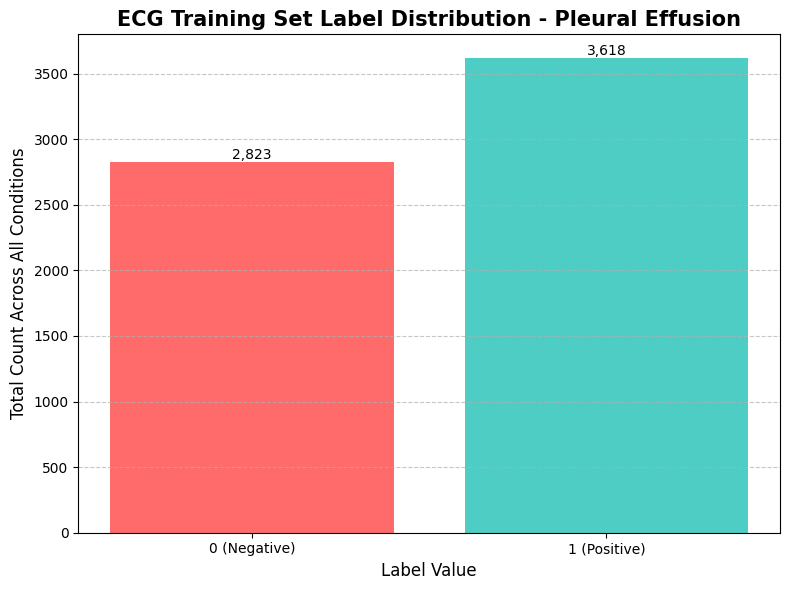


Plot successfully saved as 'pleural effusion_ecg_label_distribution.png'

--- Running CXR Analysis & Visualization ---
STATISTICAL ANALYSIS FOR CXR CLASS: PLEURAL EFFUSION

--- TRAIN SET (Pleural Effusion_train.csv) ---
Total entries: 6,441

Condition label distribution:
  • Pleural Effusion: Pos=3,618   ( 56.2%) | Neg=2,823   | Total Labeled=6,441  

--- VAL SET (Pleural Effusion_val.csv) ---
Total entries: 490

Condition label distribution:
  • Pleural Effusion: Pos=253     ( 51.6%) | Neg=237     | Total Labeled=490    

--- TEST SET (Pleural Effusion_test.csv) ---
Total entries: 3,148

Condition label distribution:
  • Pleural Effusion: Pos=1,681   ( 53.4%) | Neg=1,467   | Total Labeled=3,148  

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
VISUALIZING CXR TRAINING SET DISTRIBUTION FOR: PLEURAL EFFUSION
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Training Set - Aggregated Label Counts:
0.0    2823
1.0    3618


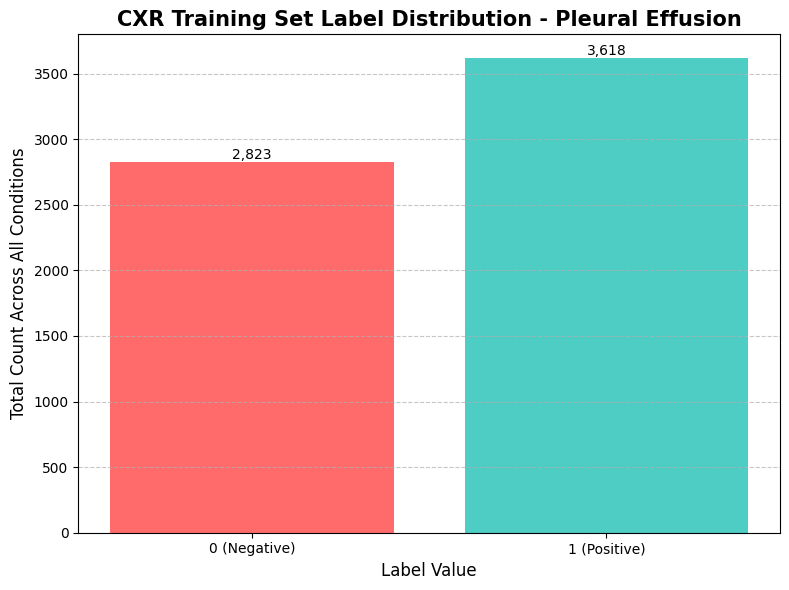


Plot successfully saved as 'pleural effusion_cxr_label_distribution.png'

========================= COMPLETED FULL ANALYSIS FOR: PLEURAL EFFUSION =========================

--- Starting Multimodal Data Load for Class: Pleural Effusion ---
  Loaded train CSV: 6,441 total entries.
  Verified CXR-ECG Pairs: 6,441
  Loaded val CSV: 490 total entries.
  Verified CXR-ECG Pairs: 490
  Loaded test CSV: 3,148 total entries.
  Verified CXR-ECG Pairs: 3,148
--- Successfully Loaded Multimodal Dataset for Pleural Effusion ---


In [4]:
run_full_analysis_for_class('Pleural Effusion')
loaded_data = load_multimodal_dataset(class_name="Pleural Effusion")

--- Multimodal Fusion Model Training for: Edema ---
Using device: cuda:0

--- Starting Multimodal Data Load for Class: Edema ---
  Loaded train CSV: 4,968 total entries.
  Verified CXR-ECG Pairs: 4,968
  Loaded val CSV: 391 total entries.
  Verified CXR-ECG Pairs: 391
  Loaded test CSV: 2,230 total entries.
  Verified CXR-ECG Pairs: 2,230
--- Successfully Loaded Multimodal Dataset for Edema ---


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 198MB/s]  



                         Model Architecture Summary

Using 2 GPUs! Wrapping model in DataParallel.

                            STARTING MODEL TRAINING



Total Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 1/20 | Time: 81.41s | LR: 1.0e-04
Training:   Loss: 0.0804, Acc: 0.5741, F1: 0.6874, AUC: 0.6530
Validation: Loss: 0.0734, Acc: 0.6266, F1: 0.6404, AUC: 0.7470
---> CHECKPOINT: New best model saved with validation AUC: 0.7470


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 2/20 | Time: 62.95s | LR: 9.9e-05
Training:   Loss: 0.0743, Acc: 0.6640, F1: 0.7108, AUC: 0.7389
Validation: Loss: 0.0674, Acc: 0.7136, F1: 0.6647, AUC: 0.7812
---> CHECKPOINT: New best model saved with validation AUC: 0.7812


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 3/20 | Time: 57.75s | LR: 9.8e-05
Training:   Loss: 0.0698, Acc: 0.7049, F1: 0.7449, AUC: 0.7823
Validation: Loss: 0.0678, Acc: 0.6675, F1: 0.6649, AUC: 0.8096
---> CHECKPOINT: New best model saved with validation AUC: 0.8096


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 4/20 | Time: 57.05s | LR: 9.5e-05
Training:   Loss: 0.0688, Acc: 0.7081, F1: 0.7436, AUC: 0.7912
Validation: Loss: 0.0688, Acc: 0.6701, F1: 0.6734, AUC: 0.8121
---> CHECKPOINT: New best model saved with validation AUC: 0.8121

Epoch 5: Unfreezing last TWO VGG blocks.


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 5/20 | Time: 55.82s | LR: 1.0e-05
Training:   Loss: 0.0641, Acc: 0.7488, F1: 0.7733, AUC: 0.8278
Validation: Loss: 0.0598, Acc: 0.7621, F1: 0.7409, AUC: 0.8554
---> CHECKPOINT: New best model saved with validation AUC: 0.8554


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 6/20 | Time: 56.51s | LR: 9.9e-06
Training:   Loss: 0.0593, Acc: 0.7752, F1: 0.7878, AUC: 0.8561
Validation: Loss: 0.0601, Acc: 0.7801, F1: 0.6718, AUC: 0.8734
---> CHECKPOINT: New best model saved with validation AUC: 0.8734


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 7/20 | Time: 55.30s | LR: 9.7e-06
Training:   Loss: 0.0574, Acc: 0.7820, F1: 0.8016, AUC: 0.8668
Validation: Loss: 0.0549, Acc: 0.8005, F1: 0.7679, AUC: 0.8708


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 8/20 | Time: 56.12s | LR: 9.2e-06
Training:   Loss: 0.0552, Acc: 0.7921, F1: 0.8070, AUC: 0.8763
Validation: Loss: 0.0541, Acc: 0.7980, F1: 0.7656, AUC: 0.8764
---> CHECKPOINT: New best model saved with validation AUC: 0.8764


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 9/20 | Time: 55.83s | LR: 8.7e-06
Training:   Loss: 0.0523, Acc: 0.8076, F1: 0.8218, AUC: 0.8904
Validation: Loss: 0.0537, Acc: 0.8056, F1: 0.7580, AUC: 0.8775
---> CHECKPOINT: New best model saved with validation AUC: 0.8775


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 10/20 | Time: 55.50s | LR: 8.0e-06
Training:   Loss: 0.0502, Acc: 0.8188, F1: 0.8322, AUC: 0.8981
Validation: Loss: 0.0546, Acc: 0.8005, F1: 0.7746, AUC: 0.8807
---> CHECKPOINT: New best model saved with validation AUC: 0.8807


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 11/20 | Time: 55.01s | LR: 7.2e-06
Training:   Loss: 0.0512, Acc: 0.8086, F1: 0.8197, AUC: 0.8951
Validation: Loss: 0.0587, Acc: 0.8159, F1: 0.7410, AUC: 0.8803


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 12/20 | Time: 278.85s | LR: 6.4e-06
Training:   Loss: 0.0466, Acc: 0.8327, F1: 0.8416, AUC: 0.9148
Validation: Loss: 0.0559, Acc: 0.8261, F1: 0.7687, AUC: 0.8845
---> CHECKPOINT: New best model saved with validation AUC: 0.8845


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 13/20 | Time: 56.74s | LR: 5.5e-06
Training:   Loss: 0.0451, Acc: 0.8422, F1: 0.8516, AUC: 0.9202
Validation: Loss: 0.0557, Acc: 0.8056, F1: 0.7625, AUC: 0.8842


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 14/20 | Time: 56.03s | LR: 4.6e-06
Training:   Loss: 0.0470, Acc: 0.8269, F1: 0.8380, AUC: 0.9118
Validation: Loss: 0.0545, Acc: 0.8005, F1: 0.7636, AUC: 0.8785


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 15/20 | Time: 56.07s | LR: 3.8e-06
Training:   Loss: 0.0450, Acc: 0.8428, F1: 0.8498, AUC: 0.9207
Validation: Loss: 0.0548, Acc: 0.8210, F1: 0.7712, AUC: 0.8814


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 16/20 | Time: 56.35s | LR: 3.0e-06
Training:   Loss: 0.0439, Acc: 0.8482, F1: 0.8530, AUC: 0.9241
Validation: Loss: 0.0584, Acc: 0.8133, F1: 0.7509, AUC: 0.8811


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 17/20 | Time: 56.32s | LR: 2.3e-06
Training:   Loss: 0.0437, Acc: 0.8452, F1: 0.8527, AUC: 0.9240
Validation: Loss: 0.0578, Acc: 0.8210, F1: 0.7651, AUC: 0.8804
--- CHECKPOINT: Early stopping triggered after 5 epochs without improvement. ---


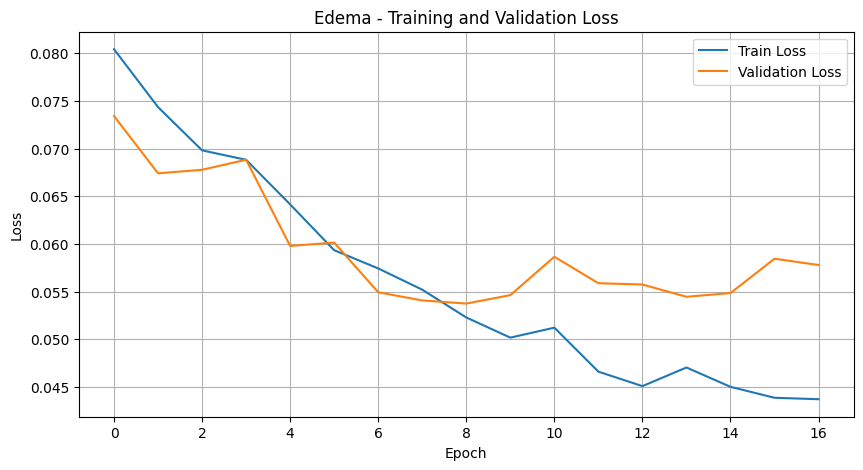


========================= FINAL EVALUATION ON TEST SET =========================

--- CHECKPOINT: Loading best model from 'best_Edema_fusion_model_optimized.pth' for final testing ---


Testing:   0%|          | 0/70 [00:00<?, ?it/s]


Optimal Threshold on Test Set: 0.4295

--- Test Set Metrics (Optimal Threshold) ---
Accuracy:  0.8188
F1-Score:  0.7615
Precision: 0.7223
Recall:    0.8052
AUC:       0.8791

Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

    Negative       0.88      0.83      0.85      1429
    Positive       0.72      0.81      0.76       801

    accuracy                           0.82      2230
   macro avg       0.80      0.82      0.81      2230
weighted avg       0.83      0.82      0.82      2230



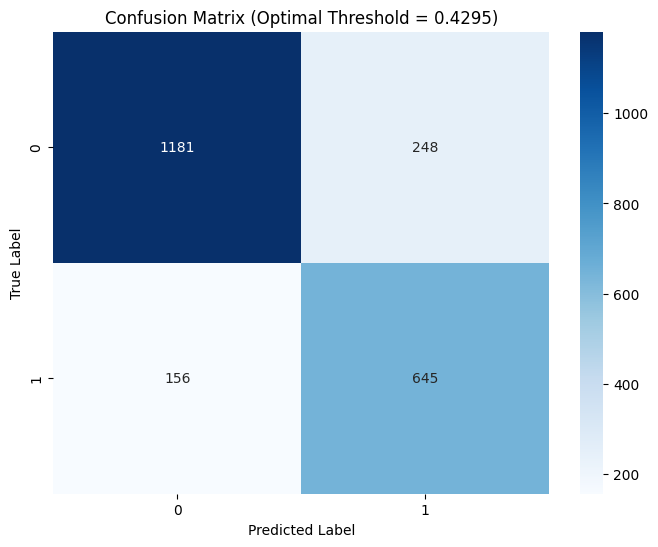

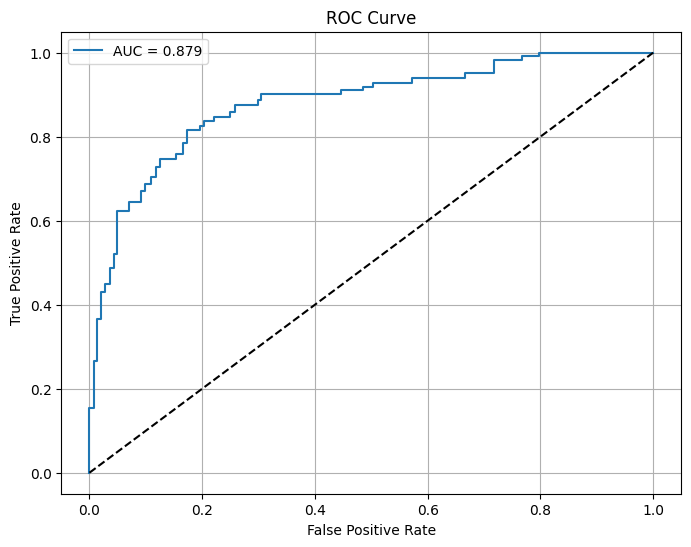

In [5]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torchvision import models, transforms
from torch.optim.lr_scheduler import CosineAnnealingLR  # Switched scheduler
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve, precision_recall_curve, precision_score, recall_score)
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import time
import pickle
from PIL import Image
from typing import Dict, List, Any
from torchinfo import summary
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2

# =================================================================================
# >> 1. CONFIGURATION & HYPERPARAMETERS
# =================================================================================

# --- Paths ---
BASE_CSV_PATH = '/kaggle/input/symile-mimic-1-0-0/symile-mimic-1.0.0/CSV'
BASE_IMAGE_PATH = '/kaggle/input/symile-mimic-1-0-0/symile-mimic-1.0.0/Images'
BASE_ECG_PATH = '/kaggle/input/symile-mimic-1-0-0/symile-mimic-1.0.0/ECG'

# --- Training Hyperparameters ---
TARGET_CLASS = 'Edema'
BATCH_SIZE = 32
NUM_EPOCHS = 20
INITIAL_LR = 1e-4
UNFREEZE_LR_CXR = 1e-5 
UNFREEZE_LR_ECG = 1e-4 
WEIGHT_DECAY = 0.01
UNFREEZE_EPOCH = 4
EARLY_STOPPING_PATIENCE = 5

# --- Mappings for Data Loader ---
SPLIT_IMAGE_FOLDERS = {'train': 'train_images', 'val': 'val_images', 'test': 'test_images'}
SPLIT_ECG_FOLDERS = {'train': 'train', 'val': 'val', 'test': 'test'}

# =================================================================================
# >> 2. ADVANCED AUGMENTATIONS & DATA LOADING
# =================================================================================

def get_transforms():
    # Using Albumentations for more powerful image augmentation
    train_transform = A.Compose([
        A.Resize(256, 256),
        A.RandomCrop(224, 224),
        A.HorizontalFlip(p=0.5),
        # FIX: Replaced deprecated ShiftScaleRotate with Affine
        A.Affine(
            scale=(0.95, 1.05), 
            translate_percent=(-0.05, 0.05), 
            rotate=(-10, 10), 
            p=0.5
        ),
        A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=0.5),
        A.ElasticTransform(p=0.5), # Good for medical images
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2()
    ])
    
    val_test_transform = A.Compose([
        A.Resize(224, 224),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2()
    ])
    return train_transform, val_test_transform

def load_multimodal_dataset(class_name: str) -> Dict[str, Dict[str, Any]]:
    if not os.path.exists(BASE_CSV_PATH):
        print(f"Error: Base CSV path not found: {BASE_CSV_PATH}")
        return {}

    result_data = {}
    condition_csv_path = os.path.join(BASE_CSV_PATH, class_name)
    print(f"\n--- Starting Multimodal Data Load for Class: {class_name} ---")

    for split_type in SPLIT_IMAGE_FOLDERS.keys():
        csv_path = os.path.join(condition_csv_path, f'{class_name}_{split_type}.csv')
        verified_rows, verified_image_paths, verified_ecg_paths = [], [], []

        if os.path.exists(csv_path):
            try:
                df = pd.read_csv(csv_path)
                print(f"  Loaded {split_type} CSV: {len(df):,} total entries.")
                base_img_folder = os.path.join(BASE_IMAGE_PATH, SPLIT_IMAGE_FOLDERS[split_type])
                base_ecg_folder = os.path.join(BASE_ECG_PATH, SPLIT_ECG_FOLDERS[split_type], 'files')

                if os.path.exists(base_img_folder) and os.path.exists(base_ecg_folder):
                    for _, row in df.iterrows():
                        img_filename = os.path.basename(str(row['cxr_path']).replace('\\', '/'))
                        full_img_path = os.path.join(base_img_folder, img_filename)
                        
                        path_parts = str(row['ecg_path']).replace('\\', '/').split('/')
                        full_ecg_path = None
                        if len(path_parts) >= 4:
                            p_id, s_id, study_id, ecg_id = path_parts[-4:]
                            prospective_path = os.path.join(base_ecg_folder, p_id, s_id, study_id, f"{ecg_id}.npy")
                            if os.path.exists(prospective_path):
                                full_ecg_path = prospective_path
                        
                        if os.path.exists(full_img_path) and full_ecg_path:
                            verified_image_paths.append(full_img_path)
                            verified_ecg_paths.append(full_ecg_path)
                            verified_rows.append(row)

                print(f"  Verified CXR-ECG Pairs: {len(verified_image_paths):,}")
            except Exception as e:
                print(f"  Error processing {csv_path}: {e}")
        else:
            print(f"  Warning: CSV not found for {split_type} at {csv_path}")

        result_data[split_type] = {
            'df': pd.DataFrame(verified_rows).reset_index(drop=True),
            'image_paths': verified_image_paths,
            'ecg_paths': verified_ecg_paths
        }
    print(f"--- Successfully Loaded Multimodal Dataset for {class_name} ---")
    return result_data


class MultiModalDataset(Dataset):
    def __init__(self, dataframe, image_paths, ecg_paths, condition_name, image_transform=None, is_train=False):
        self.dataframe = dataframe
        self.image_paths = image_paths
        self.ecg_paths = ecg_paths
        self.condition_name = condition_name
        self.image_transform = image_transform
        self.is_train = is_train

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Image Loading with OpenCV for Albumentations
        image = cv2.imread(self.image_paths[idx])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.image_transform:
            image = self.image_transform(image=image)['image']
        else:  # Fallback
            image = transforms.ToTensor()(image)

        # ECG
        ecg = np.load(self.ecg_paths[idx])
        if ecg.ndim == 3: ecg = np.squeeze(ecg)

        if self.is_train:  # Augment ECG
            shift = np.random.randint(-100, 101)
            ecg = np.roll(ecg, shift, axis=0)
            ecg = ecg * np.random.uniform(0.9, 1.1)
            noise = np.random.randn(*ecg.shape) * np.std(ecg) * 0.01
            ecg = ecg + noise

        ecg_tensor = torch.tensor(ecg, dtype=torch.float32).permute(1, 0)

        label = torch.tensor(self.dataframe.iloc[idx][self.condition_name], dtype=torch.float32)
        return image, ecg_tensor, label

# =================================================================================
# >> 3. FOCAL LOSS & IMPROVED MODEL ARCHITECTURE
# =================================================================================

class FocalLoss(nn.Module):
    def __init__(self, alpha=0.6, gamma=2.0, reduction='mean'):  # IMPROVEMENT: Adjusted alpha
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        # Calculate alpha-weighted loss
        at = self.alpha * targets + (1 - self.alpha) * (1 - targets)
        F_loss = at * (1 - pt)**self.gamma * BCE_loss
        return torch.mean(F_loss) if self.reduction == 'mean' else torch.sum(F_loss)


class Custom1DCNN(nn.Module):
    def __init__(self):
        super(Custom1DCNN, self).__init__()
        self.features = nn.Sequential(
            self._make_conv_block(12, 64, 5),
            self._make_conv_block(64, 128, 5),
            self._make_conv_block(128, 256, 3),
            nn.AdaptiveAvgPool1d(1)
        )
        self.feature_extractor_fc = nn.Sequential(nn.Linear(256, 128), nn.ReLU(True), nn.Dropout(0.5))
    
    def _make_conv_block(self, in_c, out_c, k_size):
        return nn.Sequential(
            nn.Conv1d(in_c, out_c, k_size, padding='same', bias=False),
            nn.BatchNorm1d(out_c), nn.ReLU(True), nn.MaxPool1d(2, 2))

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.feature_extractor_fc(x)


class FusionModel(nn.Module):
    def __init__(self, num_classes=1, pretrained_vgg=True):
        super(FusionModel, self).__init__()
        # --- CXR Branch (VGG16) ---
        self.vgg = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1 if pretrained_vgg else None)
        for param in self.vgg.features.parameters():
            param.requires_grad = False
        
        # IMPROVEMENT: Modernized VGG Head with Global Average Pooling
        num_vgg_features = self.vgg.features[-3].out_channels  # 512 for VGG16
        self.vgg.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.vgg.classifier = nn.Sequential(
            nn.Linear(num_vgg_features, 512),  # Reduced size
            nn.ReLU(True), nn.Dropout(0.5)
        )

        # --- ECG Branch (1D CNN) ---
        self.ecg_cnn = Custom1DCNN()
        
        # --- Fusion Classifier ---
        # Input features: 512 from VGG + 128 from ECG CNN
        self.fusion_classifier = nn.Sequential(
            nn.Linear(512 + 128, 256),  # Reduced size
            nn.ReLU(True), nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )
        
    def forward(self, cxr_input, ecg_input):
        # VGG forward pass with the new head
        cxr_features = self.vgg.features(cxr_input)
        cxr_features = self.vgg.avgpool(cxr_features)
        cxr_features = torch.flatten(cxr_features, 1)
        cxr_features = self.vgg.classifier(cxr_features)

        ecg_features = self.ecg_cnn(ecg_input)
        
        combined_features = torch.cat((cxr_features, ecg_features), dim=1)
        output = self.fusion_classifier(combined_features)
        return output

# =================================================================================
# >> 4. TRAIN & VALIDATE FUNCTIONS
# =================================================================================

def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    predictions, true_labels = [], []
    for images, ecgs, labels in tqdm(loader, desc="Training", leave=False):
        images, ecgs, labels = images.to(device), ecgs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images, ecgs)
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        predictions.extend(torch.sigmoid(outputs).cpu().detach().numpy())
        true_labels.extend(labels.cpu().numpy())
    
    predictions = np.array(predictions).squeeze()
    true_labels = np.array(true_labels)
    pred_labels = (predictions > 0.5).astype(int)
    return (running_loss / len(loader),
            accuracy_score(true_labels, pred_labels),
            f1_score(true_labels, pred_labels, zero_division=0),
            roc_auc_score(true_labels, predictions))

def validate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    predictions, true_labels = [], []
    with torch.no_grad():
        for images, ecgs, labels in tqdm(loader, desc="Validation", leave=False):
            images, ecgs, labels = images.to(device), ecgs.to(device), labels.to(device)
            outputs = model(images, ecgs)
            loss = criterion(outputs.squeeze(), labels.float())
            running_loss += loss.item()
            predictions.extend(torch.sigmoid(outputs).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    predictions = np.array(predictions).squeeze()
    true_labels = np.array(true_labels)
    pred_labels = (predictions > 0.5).astype(int)
    return (running_loss / len(loader),
            accuracy_score(true_labels, pred_labels),
            f1_score(true_labels, pred_labels, zero_division=0),
            roc_auc_score(true_labels, predictions))

# Main training loop with history saving
def main():
    print(f"--- Multimodal Fusion Model Training for: {TARGET_CLASS} ---")
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # --- Data Loading ---
    all_data = load_multimodal_dataset(class_name=TARGET_CLASS)
    if all_data['train']['df'].empty: return

    # --- Data Transforms ---
    train_transform, val_test_transform = get_transforms()

    # --- Datasets and Sampler ---
    train_dataset = MultiModalDataset(all_data['train']['df'], all_data['train']['image_paths'], all_data['train']['ecg_paths'], TARGET_CLASS, train_transform, is_train=True)
    val_dataset = MultiModalDataset(all_data['val']['df'], all_data['val']['image_paths'], all_data['val']['ecg_paths'], TARGET_CLASS, val_test_transform)
    
    labels = all_data['train']['df'][TARGET_CLASS].values
    class_counts = np.bincount(labels.astype(int))
    class_weights = 1. / class_counts
    sample_weights = torch.from_numpy(np.array([class_weights[t] for t in labels.astype(int)]))
    sampler = WeightedRandomSampler(sample_weights.double(), len(sample_weights))

    # --- DataLoaders ---
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler, num_workers=2, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

    # --- Model, Loss, Optimizer ---
    model = FusionModel(num_classes=1).to(device)
    
    print("\n" + "="*80 + "\n" + " " * 25 + "Model Architecture Summary" + "\n" + "="*80)
    summary(model, input_size=[(BATCH_SIZE, 3, 224, 224), (BATCH_SIZE, 12, 5000)], device=device)
    print("="*80 + "\n")
        
    if torch.cuda.device_count() > 1:
        print(f"Using {torch.cuda.device_count()} GPUs! Wrapping model in DataParallel.")
        model = nn.DataParallel(model)
        
    criterion = FocalLoss()
    optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=INITIAL_LR, weight_decay=WEIGHT_DECAY)
    scheduler = CosineAnnealingLR(optimizer, T_max=NUM_EPOCHS, eta_min=1e-6) # IMPROVEMENT: Switched scheduler

    # --- Training Loop ---
    best_val_auc = 0.0
    epochs_no_improve = 0
    history = {k: [] for k in ['train_loss', 'train_acc', 'train_f1', 'train_auc', 'val_loss', 'val_acc', 'val_f1', 'val_auc']}

    print("\n" + "="*80 + "\n" + " " * 28 + "STARTING MODEL TRAINING" + "\n" + "="*80 + "\n")

    for epoch in tqdm(range(NUM_EPOCHS), desc="Total Epochs"):
        if epoch == UNFREEZE_EPOCH:
            print("\n" + "="*50 + f"\nEpoch {epoch+1}: Unfreezing last TWO VGG blocks.\n" + "="*50)
            model_to_unfreeze = model.module if isinstance(model, nn.DataParallel) else model
            for param in model_to_unfreeze.vgg.features[17:].parameters():
                param.requires_grad = True
            
            optimizer = torch.optim.AdamW([
                {'params': model_to_unfreeze.vgg.features[17:].parameters(), 'lr': UNFREEZE_LR_CXR},
                {'params': model_to_unfreeze.vgg.classifier.parameters(), 'lr': INITIAL_LR},
                {'params': model_to_unfreeze.ecg_cnn.parameters(), 'lr': UNFREEZE_LR_ECG},
                {'params': model_to_unfreeze.fusion_classifier.parameters(), 'lr': INITIAL_LR}
            ], weight_decay=WEIGHT_DECAY)
            scheduler = CosineAnnealingLR(optimizer, T_max=NUM_EPOCHS-UNFREEZE_EPOCH, eta_min=1e-6)

        start_time = time.time()
        train_loss, train_acc, train_f1, train_auc = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc, val_f1, val_auc = validate(model, val_loader, criterion, device)
        
        for key, val in zip(history.keys(), [train_loss, train_acc, train_f1, train_auc, val_loss, val_acc, val_f1, val_auc]):
            history[key].append(val)
        
        print(f'\nEpoch {epoch+1}/{NUM_EPOCHS} | Time: {time.time() - start_time:.2f}s | LR: {optimizer.param_groups[0]["lr"]:.1e}')
        print(f'Training:   Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, F1: {train_f1:.4f}, AUC: {train_auc:.4f}')
        print(f'Validation: Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, F1: {val_f1:.4f}, AUC: {val_auc:.4f}')
        
        scheduler.step()

        if val_auc > best_val_auc:
            best_val_auc = val_auc
            epochs_no_improve = 0
            state_dict = model.module.state_dict() if isinstance(model, nn.DataParallel) else model.state_dict()
            torch.save(state_dict, f'best_{TARGET_CLASS}_fusion_model_optimized.pth')
            print(f'---> CHECKPOINT: New best model saved with validation AUC: {val_auc:.4f}')
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= EARLY_STOPPING_PATIENCE:
                print(f"--- CHECKPOINT: Early stopping triggered after {EARLY_STOPPING_PATIENCE} epochs without improvement. ---")
                break

    # --- Plot Training and Validation Loss ---
    plt.figure(figsize=(10, 5))
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'{TARGET_CLASS} - Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{TARGET_CLASS}_loss_curve.png')
    plt.show()

    evaluate_on_test_set(TARGET_CLASS, all_data, val_test_transform, device)


# =================================================================================
# >> 6. FINAL EVALUATION ON TEST SET
# =================================================================================
def evaluate_on_test_set(class_name, all_data, transform, device):
    print("\n" + "="*25 + " FINAL EVALUATION ON TEST SET " + "="*25)
    
    model = FusionModel(num_classes=1).to(device)
    model_path = f'best_{class_name}_fusion_model_optimized.pth'
    print(f"\n--- CHECKPOINT: Loading best model from '{model_path}' for final testing ---")
    model.load_state_dict(torch.load(model_path))
    model.eval()

    test_dataset = MultiModalDataset(all_data['test']['df'], all_data['test']['image_paths'], all_data['test']['ecg_paths'], class_name, transform)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
    
    y_true, y_prob = [], []
    with torch.no_grad():
        for images, ecgs, labels in tqdm(test_loader, desc="Testing"):
            images, ecgs = images.to(device), ecgs.to(device)
            outputs = model(images, ecgs)
            y_true.extend(labels.numpy())
            y_prob.extend(torch.sigmoid(outputs).cpu().numpy())
    
    y_true, y_prob = np.array(y_true), np.array(y_prob).squeeze()

    precision, recall, thresholds = precision_recall_curve(y_true, y_prob)
    f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1] + 1e-9)
    best_threshold = thresholds[np.argmax(f1_scores)]
    print(f"\nOptimal Threshold on Test Set: {best_threshold:.4f}")

    y_pred_optimal = (y_prob > best_threshold).astype(int)
    
    auc_score = roc_auc_score(y_true, y_prob)
    print("\n--- Test Set Metrics (Optimal Threshold) ---")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred_optimal):.4f}")
    print(f"F1-Score:  {f1_score(y_true, y_pred_optimal, zero_division=0):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred_optimal, zero_division=0):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred_optimal, zero_division=0):.4f}")
    print(f"AUC:       {auc_score:.4f}")
    
    print("\nClassification Report (Optimal Threshold):")
    print(classification_report(y_true, y_pred_optimal, target_names=['Negative', 'Positive']))

    cm = confusion_matrix(y_true, y_pred_optimal)
    plt.figure(figsize=(8, 6)); sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Optimal Threshold = {best_threshold:.4f})'), plt.ylabel('True Label'), plt.xlabel('Predicted Label')
    plt.savefig('fusion_confusion_matrix_optimized.png'), plt.show()

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.figure(figsize=(8, 6)); plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
    plt.plot([0, 1], [0, 1], 'k--'), plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate'), plt.title('ROC Curve')
    plt.legend(), plt.grid(True), plt.savefig('fusion_roc_curve_optimized.png'), plt.show()

if __name__ == "__main__":
    main()


# Cardiomegaly


========================= STARTING FULL ANALYSIS FOR: CARDIOMEGALY =========================

--- Running ECG Analysis & Visualization ---
STATISTICAL ANALYSIS FOR ECG CLASS: CARDIOMEGALY

--- TRAIN SET (Cardiomegaly_train.csv) ---
Total entries: 5,391

Condition label distribution:
  • Cardiomegaly    : Pos=3,346   ( 62.1%) | Neg=2,045   | Total Labeled=5,391  

--- VAL SET (Cardiomegaly_val.csv) ---
Total entries: 444

Condition label distribution:
  • Cardiomegaly    : Pos=268     ( 60.4%) | Neg=176     | Total Labeled=444    

--- TEST SET (Cardiomegaly_test.csv) ---
Total entries: 2,530

Condition label distribution:
  • Cardiomegaly    : Pos=1,444   ( 57.1%) | Neg=1,086   | Total Labeled=2,530  

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
VISUALIZING ECG TRAINING SET DISTRIBUTION FOR: CARDIOMEGALY
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Training Set - Aggregated Label Counts:
0.0    2045
1.0    3346


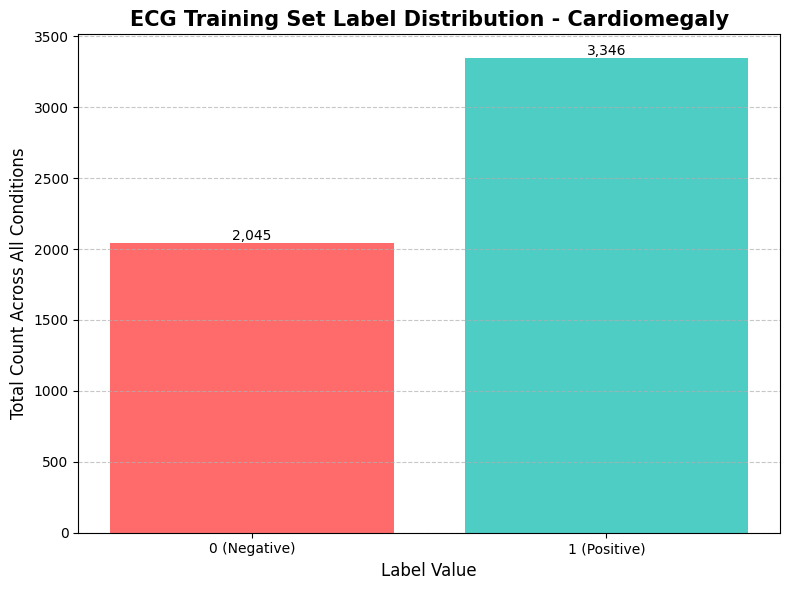


Plot successfully saved as 'cardiomegaly_ecg_label_distribution.png'

--- Running CXR Analysis & Visualization ---
STATISTICAL ANALYSIS FOR CXR CLASS: CARDIOMEGALY

--- TRAIN SET (Cardiomegaly_train.csv) ---
Total entries: 5,391

Condition label distribution:
  • Cardiomegaly    : Pos=3,346   ( 62.1%) | Neg=2,045   | Total Labeled=5,391  

--- VAL SET (Cardiomegaly_val.csv) ---
Total entries: 444

Condition label distribution:
  • Cardiomegaly    : Pos=268     ( 60.4%) | Neg=176     | Total Labeled=444    

--- TEST SET (Cardiomegaly_test.csv) ---
Total entries: 2,530

Condition label distribution:
  • Cardiomegaly    : Pos=1,444   ( 57.1%) | Neg=1,086   | Total Labeled=2,530  

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
VISUALIZING CXR TRAINING SET DISTRIBUTION FOR: CARDIOMEGALY
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Training Set - Aggregated Label Counts:
0.0    2045
1.0    3346


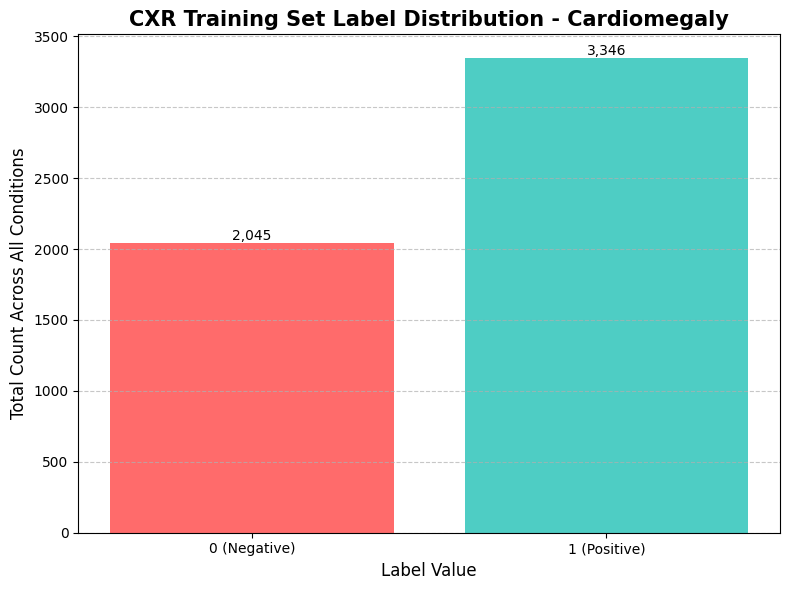


Plot successfully saved as 'cardiomegaly_cxr_label_distribution.png'

========================= COMPLETED FULL ANALYSIS FOR: CARDIOMEGALY =========================

--- Starting Multimodal Data Load for Class: Cardiomegaly ---
  Loaded train CSV: 5,391 total entries.
  Verified CXR-ECG Pairs: 5,391
  Loaded val CSV: 444 total entries.
  Verified CXR-ECG Pairs: 444
  Loaded test CSV: 2,530 total entries.
  Verified CXR-ECG Pairs: 2,530
--- Successfully Loaded Multimodal Dataset for Cardiomegaly ---


In [4]:
run_full_analysis_for_class('Cardiomegaly')
loaded_data = load_multimodal_dataset(class_name="Cardiomegaly")

--- Multimodal Fusion Model Training for: Edema ---
Using device: cuda:0

--- Starting Multimodal Data Load for Class: Edema ---
  Loaded train CSV: 4,968 total entries.
  Verified CXR-ECG Pairs: 4,968
  Loaded val CSV: 391 total entries.
  Verified CXR-ECG Pairs: 391
  Loaded test CSV: 2,230 total entries.
  Verified CXR-ECG Pairs: 2,230
--- Successfully Loaded Multimodal Dataset for Edema ---


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 175MB/s]  



                         Model Architecture Summary

Using 2 GPUs! Wrapping model in DataParallel.

                            STARTING MODEL TRAINING



Total Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 1/20 | Time: 68.56s | LR: 1.0e-04
Training:   Loss: 0.0804, Acc: 0.5829, F1: 0.6798, AUC: 0.6595
Validation: Loss: 0.0740, Acc: 0.5908, F1: 0.6209, AUC: 0.7628
---> CHECKPOINT: New best model saved with validation AUC: 0.7628


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 2/20 | Time: 58.80s | LR: 9.9e-05
Training:   Loss: 0.0733, Acc: 0.6669, F1: 0.7212, AUC: 0.7473
Validation: Loss: 0.0671, Acc: 0.6829, F1: 0.6630, AUC: 0.7898
---> CHECKPOINT: New best model saved with validation AUC: 0.7898


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 3/20 | Time: 56.93s | LR: 9.8e-05
Training:   Loss: 0.0706, Acc: 0.6918, F1: 0.7345, AUC: 0.7724
Validation: Loss: 0.0649, Acc: 0.7084, F1: 0.6798, AUC: 0.8042
---> CHECKPOINT: New best model saved with validation AUC: 0.8042


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 4/20 | Time: 115.86s | LR: 9.5e-05
Training:   Loss: 0.0686, Acc: 0.7077, F1: 0.7520, AUC: 0.7895
Validation: Loss: 0.0656, Acc: 0.6829, F1: 0.6702, AUC: 0.8120
---> CHECKPOINT: New best model saved with validation AUC: 0.8120

Epoch 5: Unfreezing last TWO VGG blocks.


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 5/20 | Time: 56.85s | LR: 1.0e-05
Training:   Loss: 0.0647, Acc: 0.7417, F1: 0.7672, AUC: 0.8191
Validation: Loss: 0.0555, Acc: 0.7826, F1: 0.7302, AUC: 0.8597
---> CHECKPOINT: New best model saved with validation AUC: 0.8597


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 6/20 | Time: 56.64s | LR: 9.9e-06
Training:   Loss: 0.0577, Acc: 0.7880, F1: 0.8118, AUC: 0.8638
Validation: Loss: 0.0539, Acc: 0.8056, F1: 0.7625, AUC: 0.8688
---> CHECKPOINT: New best model saved with validation AUC: 0.8688


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 7/20 | Time: 56.64s | LR: 9.7e-06
Training:   Loss: 0.0558, Acc: 0.8021, F1: 0.8170, AUC: 0.8736
Validation: Loss: 0.0549, Acc: 0.7980, F1: 0.7539, AUC: 0.8693
---> CHECKPOINT: New best model saved with validation AUC: 0.8693


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 8/20 | Time: 56.51s | LR: 9.2e-06
Training:   Loss: 0.0534, Acc: 0.8048, F1: 0.8236, AUC: 0.8834
Validation: Loss: 0.0606, Acc: 0.7442, F1: 0.7326, AUC: 0.8758
---> CHECKPOINT: New best model saved with validation AUC: 0.8758


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 9/20 | Time: 56.24s | LR: 8.7e-06
Training:   Loss: 0.0528, Acc: 0.8052, F1: 0.8180, AUC: 0.8860
Validation: Loss: 0.0520, Acc: 0.8133, F1: 0.7683, AUC: 0.8830
---> CHECKPOINT: New best model saved with validation AUC: 0.8830


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 10/20 | Time: 56.12s | LR: 8.0e-06
Training:   Loss: 0.0517, Acc: 0.8126, F1: 0.8263, AUC: 0.8917
Validation: Loss: 0.0547, Acc: 0.7928, F1: 0.7652, AUC: 0.8779


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 11/20 | Time: 56.06s | LR: 7.2e-06
Training:   Loss: 0.0495, Acc: 0.8209, F1: 0.8348, AUC: 0.9018
Validation: Loss: 0.0564, Acc: 0.8082, F1: 0.7588, AUC: 0.8773


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 12/20 | Time: 57.14s | LR: 6.4e-06
Training:   Loss: 0.0469, Acc: 0.8311, F1: 0.8395, AUC: 0.9119
Validation: Loss: 0.0562, Acc: 0.8031, F1: 0.7508, AUC: 0.8822


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 13/20 | Time: 59.96s | LR: 5.5e-06
Training:   Loss: 0.0455, Acc: 0.8416, F1: 0.8504, AUC: 0.9185
Validation: Loss: 0.0540, Acc: 0.7928, F1: 0.7538, AUC: 0.8851
---> CHECKPOINT: New best model saved with validation AUC: 0.8851


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 14/20 | Time: 56.31s | LR: 4.6e-06
Training:   Loss: 0.0453, Acc: 0.8341, F1: 0.8407, AUC: 0.9180
Validation: Loss: 0.0566, Acc: 0.7801, F1: 0.7456, AUC: 0.8790


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 15/20 | Time: 277.07s | LR: 3.8e-06
Training:   Loss: 0.0447, Acc: 0.8418, F1: 0.8517, AUC: 0.9191
Validation: Loss: 0.0565, Acc: 0.8005, F1: 0.7500, AUC: 0.8796


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 16/20 | Time: 56.89s | LR: 3.0e-06
Training:   Loss: 0.0436, Acc: 0.8498, F1: 0.8629, AUC: 0.9219
Validation: Loss: 0.0575, Acc: 0.7980, F1: 0.7492, AUC: 0.8774


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 17/20 | Time: 56.72s | LR: 2.3e-06
Training:   Loss: 0.0426, Acc: 0.8500, F1: 0.8625, AUC: 0.9273
Validation: Loss: 0.0577, Acc: 0.7980, F1: 0.7492, AUC: 0.8757


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 18/20 | Time: 56.51s | LR: 1.8e-06
Training:   Loss: 0.0410, Acc: 0.8593, F1: 0.8725, AUC: 0.9339
Validation: Loss: 0.0599, Acc: 0.7903, F1: 0.7389, AUC: 0.8773
--- CHECKPOINT: Early stopping triggered after 5 epochs without improvement. ---


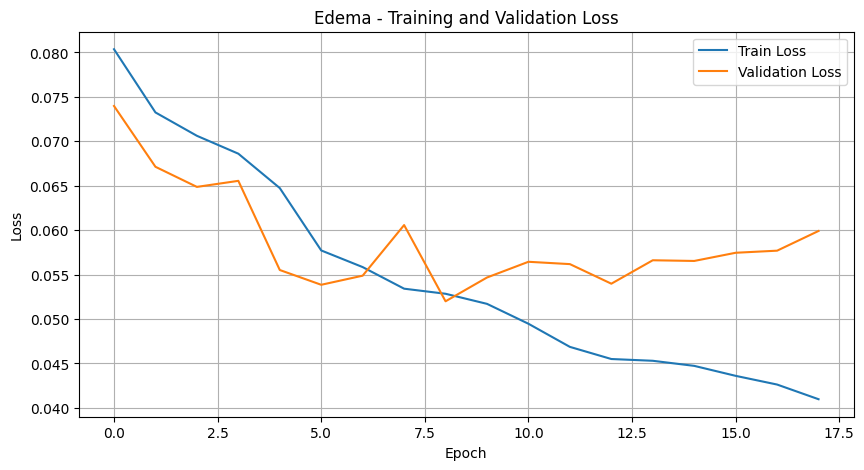


========================= FINAL EVALUATION ON TEST SET =========================

--- CHECKPOINT: Loading best model from 'best_Edema_fusion_model_optimized.pth' for final testing ---


Testing:   0%|          | 0/70 [00:00<?, ?it/s]


Optimal Threshold on Test Set: 0.5684

--- Test Set Metrics (Optimal Threshold) ---
Accuracy:  0.8390
F1-Score:  0.7738
Precision: 0.7812
Recall:    0.7665
AUC:       0.8837

Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

    Negative       0.87      0.88      0.88      1429
    Positive       0.78      0.77      0.77       801

    accuracy                           0.84      2230
   macro avg       0.83      0.82      0.82      2230
weighted avg       0.84      0.84      0.84      2230



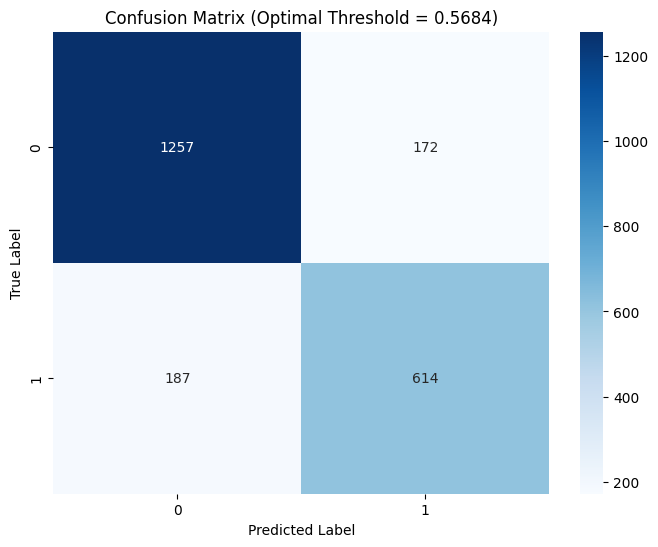

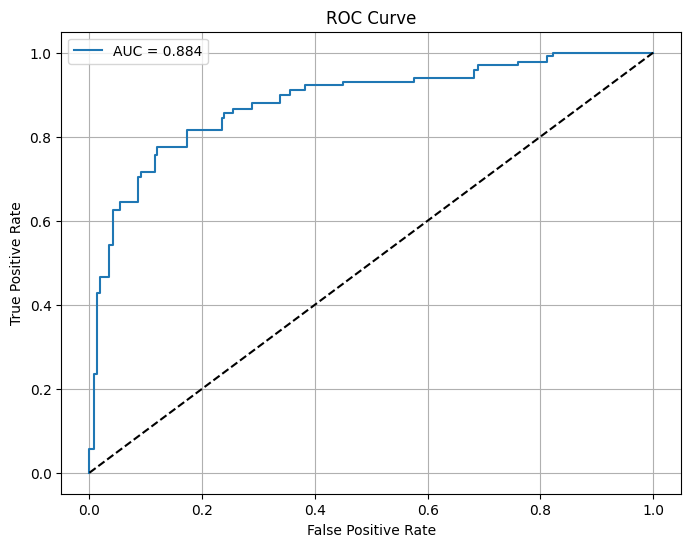

In [5]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torchvision import models, transforms
from torch.optim.lr_scheduler import CosineAnnealingLR  # Switched scheduler
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve, precision_recall_curve, precision_score, recall_score)
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import time
import pickle
from PIL import Image
from typing import Dict, List, Any
from torchinfo import summary
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2

# =================================================================================
# >> 1. CONFIGURATION & HYPERPARAMETERS
# =================================================================================

# --- Paths ---
BASE_CSV_PATH = '/kaggle/input/symile-mimic-1-0-0/symile-mimic-1.0.0/CSV'
BASE_IMAGE_PATH = '/kaggle/input/symile-mimic-1-0-0/symile-mimic-1.0.0/Images'
BASE_ECG_PATH = '/kaggle/input/symile-mimic-1-0-0/symile-mimic-1.0.0/ECG'

# --- Training Hyperparameters ---
TARGET_CLASS = 'Edema'
BATCH_SIZE = 32
NUM_EPOCHS = 20
INITIAL_LR = 1e-4
UNFREEZE_LR_CXR = 1e-5 
UNFREEZE_LR_ECG = 1e-4 
WEIGHT_DECAY = 0.01
UNFREEZE_EPOCH = 4
EARLY_STOPPING_PATIENCE = 5

# --- Mappings for Data Loader ---
SPLIT_IMAGE_FOLDERS = {'train': 'train_images', 'val': 'val_images', 'test': 'test_images'}
SPLIT_ECG_FOLDERS = {'train': 'train', 'val': 'val', 'test': 'test'}

# =================================================================================
# >> 2. ADVANCED AUGMENTATIONS & DATA LOADING
# =================================================================================

def get_transforms():
    # Using Albumentations for more powerful image augmentation
    train_transform = A.Compose([
        A.Resize(256, 256),
        A.RandomCrop(224, 224),
        A.HorizontalFlip(p=0.5),
        # FIX: Replaced deprecated ShiftScaleRotate with Affine
        A.Affine(
            scale=(0.95, 1.05), 
            translate_percent=(-0.05, 0.05), 
            rotate=(-10, 10), 
            p=0.5
        ),
        A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=0.5),
        A.ElasticTransform(p=0.5), # Good for medical images
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2()
    ])
    
    val_test_transform = A.Compose([
        A.Resize(224, 224),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2()
    ])
    return train_transform, val_test_transform

def load_multimodal_dataset(class_name: str) -> Dict[str, Dict[str, Any]]:
    if not os.path.exists(BASE_CSV_PATH):
        print(f"Error: Base CSV path not found: {BASE_CSV_PATH}")
        return {}

    result_data = {}
    condition_csv_path = os.path.join(BASE_CSV_PATH, class_name)
    print(f"\n--- Starting Multimodal Data Load for Class: {class_name} ---")

    for split_type in SPLIT_IMAGE_FOLDERS.keys():
        csv_path = os.path.join(condition_csv_path, f'{class_name}_{split_type}.csv')
        verified_rows, verified_image_paths, verified_ecg_paths = [], [], []

        if os.path.exists(csv_path):
            try:
                df = pd.read_csv(csv_path)
                print(f"  Loaded {split_type} CSV: {len(df):,} total entries.")
                base_img_folder = os.path.join(BASE_IMAGE_PATH, SPLIT_IMAGE_FOLDERS[split_type])
                base_ecg_folder = os.path.join(BASE_ECG_PATH, SPLIT_ECG_FOLDERS[split_type], 'files')

                if os.path.exists(base_img_folder) and os.path.exists(base_ecg_folder):
                    for _, row in df.iterrows():
                        img_filename = os.path.basename(str(row['cxr_path']).replace('\\', '/'))
                        full_img_path = os.path.join(base_img_folder, img_filename)
                        
                        path_parts = str(row['ecg_path']).replace('\\', '/').split('/')
                        full_ecg_path = None
                        if len(path_parts) >= 4:
                            p_id, s_id, study_id, ecg_id = path_parts[-4:]
                            prospective_path = os.path.join(base_ecg_folder, p_id, s_id, study_id, f"{ecg_id}.npy")
                            if os.path.exists(prospective_path):
                                full_ecg_path = prospective_path
                        
                        if os.path.exists(full_img_path) and full_ecg_path:
                            verified_image_paths.append(full_img_path)
                            verified_ecg_paths.append(full_ecg_path)
                            verified_rows.append(row)

                print(f"  Verified CXR-ECG Pairs: {len(verified_image_paths):,}")
            except Exception as e:
                print(f"  Error processing {csv_path}: {e}")
        else:
            print(f"  Warning: CSV not found for {split_type} at {csv_path}")

        result_data[split_type] = {
            'df': pd.DataFrame(verified_rows).reset_index(drop=True),
            'image_paths': verified_image_paths,
            'ecg_paths': verified_ecg_paths
        }
    print(f"--- Successfully Loaded Multimodal Dataset for {class_name} ---")
    return result_data


class MultiModalDataset(Dataset):
    def __init__(self, dataframe, image_paths, ecg_paths, condition_name, image_transform=None, is_train=False):
        self.dataframe = dataframe
        self.image_paths = image_paths
        self.ecg_paths = ecg_paths
        self.condition_name = condition_name
        self.image_transform = image_transform
        self.is_train = is_train

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Image Loading with OpenCV for Albumentations
        image = cv2.imread(self.image_paths[idx])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.image_transform:
            image = self.image_transform(image=image)['image']
        else:  # Fallback
            image = transforms.ToTensor()(image)

        # ECG
        ecg = np.load(self.ecg_paths[idx])
        if ecg.ndim == 3: ecg = np.squeeze(ecg)

        if self.is_train:  # Augment ECG
            shift = np.random.randint(-100, 101)
            ecg = np.roll(ecg, shift, axis=0)
            ecg = ecg * np.random.uniform(0.9, 1.1)
            noise = np.random.randn(*ecg.shape) * np.std(ecg) * 0.01
            ecg = ecg + noise

        ecg_tensor = torch.tensor(ecg, dtype=torch.float32).permute(1, 0)

        label = torch.tensor(self.dataframe.iloc[idx][self.condition_name], dtype=torch.float32)
        return image, ecg_tensor, label

# =================================================================================
# >> 3. FOCAL LOSS & IMPROVED MODEL ARCHITECTURE
# =================================================================================

class FocalLoss(nn.Module):
    def __init__(self, alpha=0.6, gamma=2.0, reduction='mean'):  # IMPROVEMENT: Adjusted alpha
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        # Calculate alpha-weighted loss
        at = self.alpha * targets + (1 - self.alpha) * (1 - targets)
        F_loss = at * (1 - pt)**self.gamma * BCE_loss
        return torch.mean(F_loss) if self.reduction == 'mean' else torch.sum(F_loss)


class Custom1DCNN(nn.Module):
    def __init__(self):
        super(Custom1DCNN, self).__init__()
        self.features = nn.Sequential(
            self._make_conv_block(12, 64, 5),
            self._make_conv_block(64, 128, 5),
            self._make_conv_block(128, 256, 3),
            nn.AdaptiveAvgPool1d(1)
        )
        self.feature_extractor_fc = nn.Sequential(nn.Linear(256, 128), nn.ReLU(True), nn.Dropout(0.5))
    
    def _make_conv_block(self, in_c, out_c, k_size):
        return nn.Sequential(
            nn.Conv1d(in_c, out_c, k_size, padding='same', bias=False),
            nn.BatchNorm1d(out_c), nn.ReLU(True), nn.MaxPool1d(2, 2))

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.feature_extractor_fc(x)


class FusionModel(nn.Module):
    def __init__(self, num_classes=1, pretrained_vgg=True):
        super(FusionModel, self).__init__()
        # --- CXR Branch (VGG16) ---
        self.vgg = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1 if pretrained_vgg else None)
        for param in self.vgg.features.parameters():
            param.requires_grad = False
        
        # IMPROVEMENT: Modernized VGG Head with Global Average Pooling
        num_vgg_features = self.vgg.features[-3].out_channels  # 512 for VGG16
        self.vgg.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.vgg.classifier = nn.Sequential(
            nn.Linear(num_vgg_features, 512),  # Reduced size
            nn.ReLU(True), nn.Dropout(0.5)
        )

        # --- ECG Branch (1D CNN) ---
        self.ecg_cnn = Custom1DCNN()
        
        # --- Fusion Classifier ---
        # Input features: 512 from VGG + 128 from ECG CNN
        self.fusion_classifier = nn.Sequential(
            nn.Linear(512 + 128, 256),  # Reduced size
            nn.ReLU(True), nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )
        
    def forward(self, cxr_input, ecg_input):
        # VGG forward pass with the new head
        cxr_features = self.vgg.features(cxr_input)
        cxr_features = self.vgg.avgpool(cxr_features)
        cxr_features = torch.flatten(cxr_features, 1)
        cxr_features = self.vgg.classifier(cxr_features)

        ecg_features = self.ecg_cnn(ecg_input)
        
        combined_features = torch.cat((cxr_features, ecg_features), dim=1)
        output = self.fusion_classifier(combined_features)
        return output

# =================================================================================
# >> 4. TRAIN & VALIDATE FUNCTIONS
# =================================================================================

def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    predictions, true_labels = [], []
    for images, ecgs, labels in tqdm(loader, desc="Training", leave=False):
        images, ecgs, labels = images.to(device), ecgs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images, ecgs)
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        predictions.extend(torch.sigmoid(outputs).cpu().detach().numpy())
        true_labels.extend(labels.cpu().numpy())
    
    predictions = np.array(predictions).squeeze()
    true_labels = np.array(true_labels)
    pred_labels = (predictions > 0.5).astype(int)
    return (running_loss / len(loader),
            accuracy_score(true_labels, pred_labels),
            f1_score(true_labels, pred_labels, zero_division=0),
            roc_auc_score(true_labels, predictions))

def validate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    predictions, true_labels = [], []
    with torch.no_grad():
        for images, ecgs, labels in tqdm(loader, desc="Validation", leave=False):
            images, ecgs, labels = images.to(device), ecgs.to(device), labels.to(device)
            outputs = model(images, ecgs)
            loss = criterion(outputs.squeeze(), labels.float())
            running_loss += loss.item()
            predictions.extend(torch.sigmoid(outputs).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    predictions = np.array(predictions).squeeze()
    true_labels = np.array(true_labels)
    pred_labels = (predictions > 0.5).astype(int)
    return (running_loss / len(loader),
            accuracy_score(true_labels, pred_labels),
            f1_score(true_labels, pred_labels, zero_division=0),
            roc_auc_score(true_labels, predictions))

# Main training loop with history saving
def main():
    print(f"--- Multimodal Fusion Model Training for: {TARGET_CLASS} ---")
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # --- Data Loading ---
    all_data = load_multimodal_dataset(class_name=TARGET_CLASS)
    if all_data['train']['df'].empty: return

    # --- Data Transforms ---
    train_transform, val_test_transform = get_transforms()

    # --- Datasets and Sampler ---
    train_dataset = MultiModalDataset(all_data['train']['df'], all_data['train']['image_paths'], all_data['train']['ecg_paths'], TARGET_CLASS, train_transform, is_train=True)
    val_dataset = MultiModalDataset(all_data['val']['df'], all_data['val']['image_paths'], all_data['val']['ecg_paths'], TARGET_CLASS, val_test_transform)
    
    labels = all_data['train']['df'][TARGET_CLASS].values
    class_counts = np.bincount(labels.astype(int))
    class_weights = 1. / class_counts
    sample_weights = torch.from_numpy(np.array([class_weights[t] for t in labels.astype(int)]))
    sampler = WeightedRandomSampler(sample_weights.double(), len(sample_weights))

    # --- DataLoaders ---
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler, num_workers=2, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

    # --- Model, Loss, Optimizer ---
    model = FusionModel(num_classes=1).to(device)
    
    print("\n" + "="*80 + "\n" + " " * 25 + "Model Architecture Summary" + "\n" + "="*80)
    summary(model, input_size=[(BATCH_SIZE, 3, 224, 224), (BATCH_SIZE, 12, 5000)], device=device)
    print("="*80 + "\n")
        
    if torch.cuda.device_count() > 1:
        print(f"Using {torch.cuda.device_count()} GPUs! Wrapping model in DataParallel.")
        model = nn.DataParallel(model)
        
    criterion = FocalLoss()
    optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=INITIAL_LR, weight_decay=WEIGHT_DECAY)
    scheduler = CosineAnnealingLR(optimizer, T_max=NUM_EPOCHS, eta_min=1e-6) # IMPROVEMENT: Switched scheduler

    # --- Training Loop ---
    best_val_auc = 0.0
    epochs_no_improve = 0
    history = {k: [] for k in ['train_loss', 'train_acc', 'train_f1', 'train_auc', 'val_loss', 'val_acc', 'val_f1', 'val_auc']}

    print("\n" + "="*80 + "\n" + " " * 28 + "STARTING MODEL TRAINING" + "\n" + "="*80 + "\n")

    for epoch in tqdm(range(NUM_EPOCHS), desc="Total Epochs"):
        if epoch == UNFREEZE_EPOCH:
            print("\n" + "="*50 + f"\nEpoch {epoch+1}: Unfreezing last TWO VGG blocks.\n" + "="*50)
            model_to_unfreeze = model.module if isinstance(model, nn.DataParallel) else model
            for param in model_to_unfreeze.vgg.features[17:].parameters():
                param.requires_grad = True
            
            optimizer = torch.optim.AdamW([
                {'params': model_to_unfreeze.vgg.features[17:].parameters(), 'lr': UNFREEZE_LR_CXR},
                {'params': model_to_unfreeze.vgg.classifier.parameters(), 'lr': INITIAL_LR},
                {'params': model_to_unfreeze.ecg_cnn.parameters(), 'lr': UNFREEZE_LR_ECG},
                {'params': model_to_unfreeze.fusion_classifier.parameters(), 'lr': INITIAL_LR}
            ], weight_decay=WEIGHT_DECAY)
            scheduler = CosineAnnealingLR(optimizer, T_max=NUM_EPOCHS-UNFREEZE_EPOCH, eta_min=1e-6)

        start_time = time.time()
        train_loss, train_acc, train_f1, train_auc = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc, val_f1, val_auc = validate(model, val_loader, criterion, device)
        
        for key, val in zip(history.keys(), [train_loss, train_acc, train_f1, train_auc, val_loss, val_acc, val_f1, val_auc]):
            history[key].append(val)
        
        print(f'\nEpoch {epoch+1}/{NUM_EPOCHS} | Time: {time.time() - start_time:.2f}s | LR: {optimizer.param_groups[0]["lr"]:.1e}')
        print(f'Training:   Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, F1: {train_f1:.4f}, AUC: {train_auc:.4f}')
        print(f'Validation: Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, F1: {val_f1:.4f}, AUC: {val_auc:.4f}')
        
        scheduler.step()

        if val_auc > best_val_auc:
            best_val_auc = val_auc
            epochs_no_improve = 0
            state_dict = model.module.state_dict() if isinstance(model, nn.DataParallel) else model.state_dict()
            torch.save(state_dict, f'best_{TARGET_CLASS}_fusion_model_optimized.pth')
            print(f'---> CHECKPOINT: New best model saved with validation AUC: {val_auc:.4f}')
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= EARLY_STOPPING_PATIENCE:
                print(f"--- CHECKPOINT: Early stopping triggered after {EARLY_STOPPING_PATIENCE} epochs without improvement. ---")
                break

    # --- Plot Training and Validation Loss ---
    plt.figure(figsize=(10, 5))
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'{TARGET_CLASS} - Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{TARGET_CLASS}_loss_curve.png')
    plt.show()

    evaluate_on_test_set(TARGET_CLASS, all_data, val_test_transform, device)


# =================================================================================
# >> 6. FINAL EVALUATION ON TEST SET
# =================================================================================
def evaluate_on_test_set(class_name, all_data, transform, device):
    print("\n" + "="*25 + " FINAL EVALUATION ON TEST SET " + "="*25)
    
    model = FusionModel(num_classes=1).to(device)
    model_path = f'best_{class_name}_fusion_model_optimized.pth'
    print(f"\n--- CHECKPOINT: Loading best model from '{model_path}' for final testing ---")
    model.load_state_dict(torch.load(model_path))
    model.eval()

    test_dataset = MultiModalDataset(all_data['test']['df'], all_data['test']['image_paths'], all_data['test']['ecg_paths'], class_name, transform)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
    
    y_true, y_prob = [], []
    with torch.no_grad():
        for images, ecgs, labels in tqdm(test_loader, desc="Testing"):
            images, ecgs = images.to(device), ecgs.to(device)
            outputs = model(images, ecgs)
            y_true.extend(labels.numpy())
            y_prob.extend(torch.sigmoid(outputs).cpu().numpy())
    
    y_true, y_prob = np.array(y_true), np.array(y_prob).squeeze()

    precision, recall, thresholds = precision_recall_curve(y_true, y_prob)
    f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1] + 1e-9)
    best_threshold = thresholds[np.argmax(f1_scores)]
    print(f"\nOptimal Threshold on Test Set: {best_threshold:.4f}")

    y_pred_optimal = (y_prob > best_threshold).astype(int)
    
    auc_score = roc_auc_score(y_true, y_prob)
    print("\n--- Test Set Metrics (Optimal Threshold) ---")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred_optimal):.4f}")
    print(f"F1-Score:  {f1_score(y_true, y_pred_optimal, zero_division=0):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred_optimal, zero_division=0):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred_optimal, zero_division=0):.4f}")
    print(f"AUC:       {auc_score:.4f}")
    
    print("\nClassification Report (Optimal Threshold):")
    print(classification_report(y_true, y_pred_optimal, target_names=['Negative', 'Positive']))

    cm = confusion_matrix(y_true, y_pred_optimal)
    plt.figure(figsize=(8, 6)); sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Optimal Threshold = {best_threshold:.4f})'), plt.ylabel('True Label'), plt.xlabel('Predicted Label')
    plt.savefig('fusion_confusion_matrix_optimized.png'), plt.show()

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.figure(figsize=(8, 6)); plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
    plt.plot([0, 1], [0, 1], 'k--'), plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate'), plt.title('ROC Curve')
    plt.legend(), plt.grid(True), plt.savefig('fusion_roc_curve_optimized.png'), plt.show()

if __name__ == "__main__":
    main()


# Atelectasis


========================= STARTING FULL ANALYSIS FOR: ATELECTASIS =========================

--- Running ECG Analysis & Visualization ---
STATISTICAL ANALYSIS FOR ECG CLASS: ATELECTASIS

--- TRAIN SET (Atelectasis_train.csv) ---
Total entries: 4,331

Condition label distribution:
  • Atelectasis     : Pos=2,867   ( 66.2%) | Neg=1,464   | Total Labeled=4,331  

--- VAL SET (Atelectasis_val.csv) ---
Total entries: 342

Condition label distribution:
  • Atelectasis     : Pos=225     ( 65.8%) | Neg=117     | Total Labeled=342    

--- TEST SET (Atelectasis_test.csv) ---
Total entries: 2,143

Condition label distribution:
  • Atelectasis     : Pos=1,409   ( 65.7%) | Neg=734     | Total Labeled=2,143  

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
VISUALIZING ECG TRAINING SET DISTRIBUTION FOR: ATELECTASIS
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Training Set - Aggregated Label Counts:
0.0    1464
1.0    2867


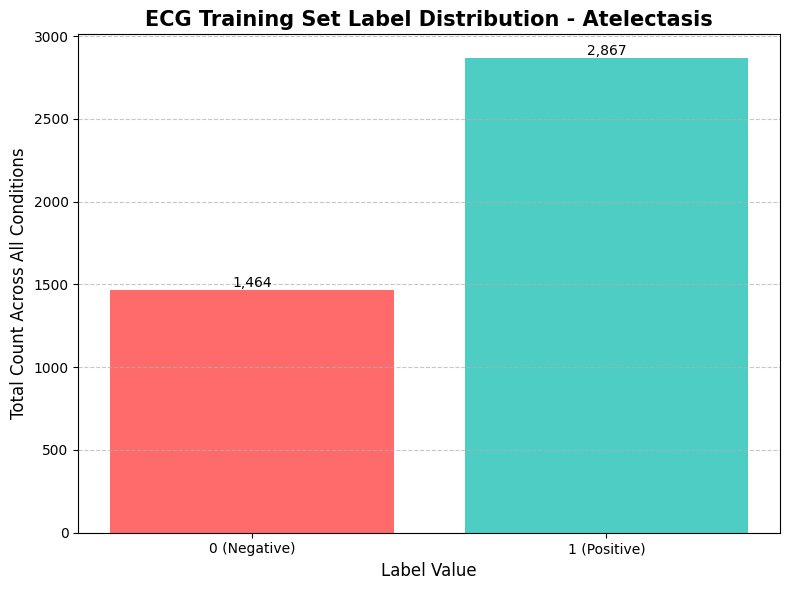


Plot successfully saved as 'atelectasis_ecg_label_distribution.png'

--- Running CXR Analysis & Visualization ---
STATISTICAL ANALYSIS FOR CXR CLASS: ATELECTASIS

--- TRAIN SET (Atelectasis_train.csv) ---
Total entries: 4,331

Condition label distribution:
  • Atelectasis     : Pos=2,867   ( 66.2%) | Neg=1,464   | Total Labeled=4,331  

--- VAL SET (Atelectasis_val.csv) ---
Total entries: 342

Condition label distribution:
  • Atelectasis     : Pos=225     ( 65.8%) | Neg=117     | Total Labeled=342    

--- TEST SET (Atelectasis_test.csv) ---
Total entries: 2,143

Condition label distribution:
  • Atelectasis     : Pos=1,409   ( 65.7%) | Neg=734     | Total Labeled=2,143  

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
VISUALIZING CXR TRAINING SET DISTRIBUTION FOR: ATELECTASIS
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Training Set - Aggregated Label Counts:
0.0    1464
1.0    2867


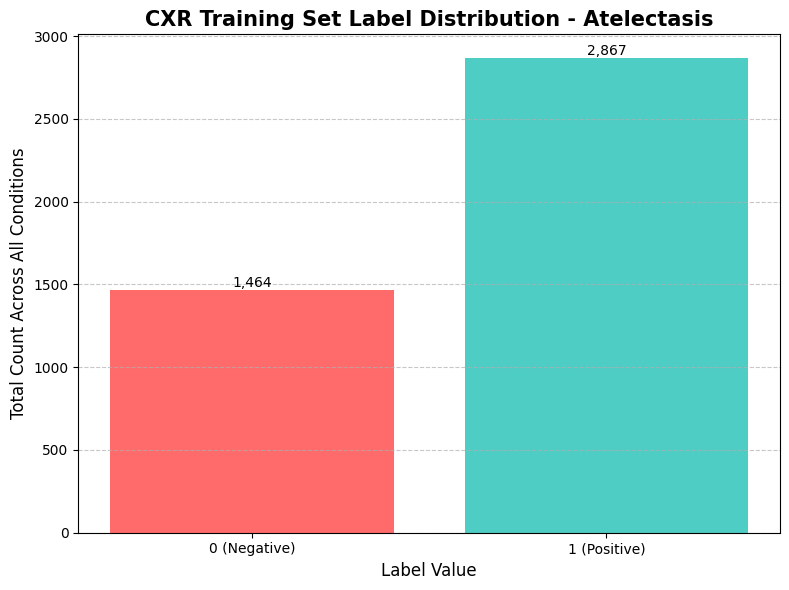


Plot successfully saved as 'atelectasis_cxr_label_distribution.png'

========================= COMPLETED FULL ANALYSIS FOR: ATELECTASIS =========================

--- Starting Multimodal Data Load for Class: Atelectasis ---
  Loaded train CSV: 4,331 total entries.
  Verified CXR-ECG Pairs: 4,331
  Loaded val CSV: 342 total entries.
  Verified CXR-ECG Pairs: 342
  Loaded test CSV: 2,143 total entries.
  Verified CXR-ECG Pairs: 2,143
--- Successfully Loaded Multimodal Dataset for Atelectasis ---


In [6]:
run_full_analysis_for_class('Atelectasis')
loaded_data = load_multimodal_dataset(class_name="Atelectasis")

--- Multimodal Fusion Model Training for: Edema ---
Using device: cuda:0

--- Starting Multimodal Data Load for Class: Edema ---
  Loaded train CSV: 4,968 total entries.
  Verified CXR-ECG Pairs: 4,968
  Loaded val CSV: 391 total entries.
  Verified CXR-ECG Pairs: 391
  Loaded test CSV: 2,230 total entries.
  Verified CXR-ECG Pairs: 2,230
--- Successfully Loaded Multimodal Dataset for Edema ---


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 194MB/s]  



                         Model Architecture Summary

Using 2 GPUs! Wrapping model in DataParallel.

                            STARTING MODEL TRAINING



Total Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 1/20 | Time: 60.15s | LR: 1.0e-04
Training:   Loss: 0.0808, Acc: 0.5779, F1: 0.6749, AUC: 0.6538
Validation: Loss: 0.0749, Acc: 0.5959, F1: 0.6326, AUC: 0.7464
---> CHECKPOINT: New best model saved with validation AUC: 0.7464


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 2/20 | Time: 51.60s | LR: 9.9e-05
Training:   Loss: 0.0756, Acc: 0.6514, F1: 0.7129, AUC: 0.7203
Validation: Loss: 0.0681, Acc: 0.6957, F1: 0.6648, AUC: 0.7770
---> CHECKPOINT: New best model saved with validation AUC: 0.7770


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 3/20 | Time: 50.05s | LR: 9.8e-05
Training:   Loss: 0.0708, Acc: 0.6880, F1: 0.7239, AUC: 0.7698
Validation: Loss: 0.0643, Acc: 0.7212, F1: 0.6766, AUC: 0.8045
---> CHECKPOINT: New best model saved with validation AUC: 0.8045


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 4/20 | Time: 48.97s | LR: 9.5e-05
Training:   Loss: 0.0692, Acc: 0.7043, F1: 0.7410, AUC: 0.7843
Validation: Loss: 0.0631, Acc: 0.7263, F1: 0.6687, AUC: 0.8106
---> CHECKPOINT: New best model saved with validation AUC: 0.8106

Epoch 5: Unfreezing last TWO VGG blocks.


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 5/20 | Time: 49.26s | LR: 1.0e-05
Training:   Loss: 0.0653, Acc: 0.7387, F1: 0.7634, AUC: 0.8167
Validation: Loss: 0.0606, Acc: 0.7468, F1: 0.7317, AUC: 0.8544
---> CHECKPOINT: New best model saved with validation AUC: 0.8544


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 6/20 | Time: 159.61s | LR: 9.9e-06
Training:   Loss: 0.0590, Acc: 0.7768, F1: 0.7959, AUC: 0.8572
Validation: Loss: 0.0544, Acc: 0.8031, F1: 0.7492, AUC: 0.8713
---> CHECKPOINT: New best model saved with validation AUC: 0.8713


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 7/20 | Time: 49.95s | LR: 9.7e-06
Training:   Loss: 0.0577, Acc: 0.7796, F1: 0.7934, AUC: 0.8626
Validation: Loss: 0.0552, Acc: 0.7980, F1: 0.7524, AUC: 0.8683


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 8/20 | Time: 49.65s | LR: 9.2e-06
Training:   Loss: 0.0545, Acc: 0.8058, F1: 0.8212, AUC: 0.8803
Validation: Loss: 0.0579, Acc: 0.7928, F1: 0.7055, AUC: 0.8701


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 9/20 | Time: 49.66s | LR: 8.7e-06
Training:   Loss: 0.0523, Acc: 0.8052, F1: 0.8206, AUC: 0.8906
Validation: Loss: 0.0540, Acc: 0.8082, F1: 0.7458, AUC: 0.8828
---> CHECKPOINT: New best model saved with validation AUC: 0.8828


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 10/20 | Time: 49.83s | LR: 8.0e-06
Training:   Loss: 0.0524, Acc: 0.8031, F1: 0.8180, AUC: 0.8888
Validation: Loss: 0.0553, Acc: 0.8107, F1: 0.7500, AUC: 0.8794


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 11/20 | Time: 49.86s | LR: 7.2e-06
Training:   Loss: 0.0508, Acc: 0.8154, F1: 0.8258, AUC: 0.8957
Validation: Loss: 0.0538, Acc: 0.8005, F1: 0.7679, AUC: 0.8828


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 12/20 | Time: 49.95s | LR: 6.4e-06
Training:   Loss: 0.0466, Acc: 0.8313, F1: 0.8423, AUC: 0.9123
Validation: Loss: 0.0553, Acc: 0.8005, F1: 0.7593, AUC: 0.8813


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 13/20 | Time: 50.24s | LR: 5.5e-06
Training:   Loss: 0.0465, Acc: 0.8362, F1: 0.8444, AUC: 0.9138
Validation: Loss: 0.0544, Acc: 0.7980, F1: 0.7492, AUC: 0.8805


Training:   0%|          | 0/156 [00:00<?, ?it/s]

Validation:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch 14/20 | Time: 50.27s | LR: 4.6e-06
Training:   Loss: 0.0452, Acc: 0.8406, F1: 0.8538, AUC: 0.9174
Validation: Loss: 0.0569, Acc: 0.8056, F1: 0.7595, AUC: 0.8809
--- CHECKPOINT: Early stopping triggered after 5 epochs without improvement. ---


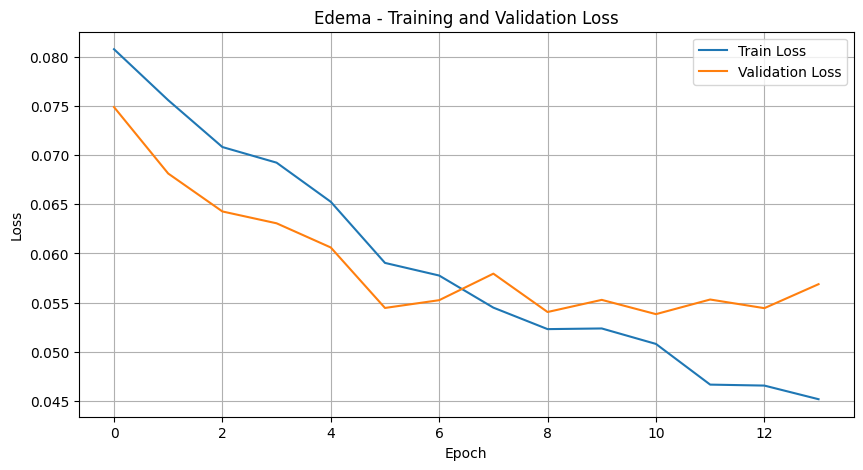


========================= FINAL EVALUATION ON TEST SET =========================

--- CHECKPOINT: Loading best model from 'best_Edema_fusion_model_optimized.pth' for final testing ---


Testing:   0%|          | 0/70 [00:00<?, ?it/s]


Optimal Threshold on Test Set: 0.5080

--- Test Set Metrics (Optimal Threshold) ---
Accuracy:  0.8363
F1-Score:  0.7616
Precision: 0.7986
Recall:    0.7278
AUC:       0.8846

Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

    Negative       0.85      0.90      0.88      1429
    Positive       0.80      0.73      0.76       801

    accuracy                           0.84      2230
   macro avg       0.83      0.81      0.82      2230
weighted avg       0.83      0.84      0.83      2230



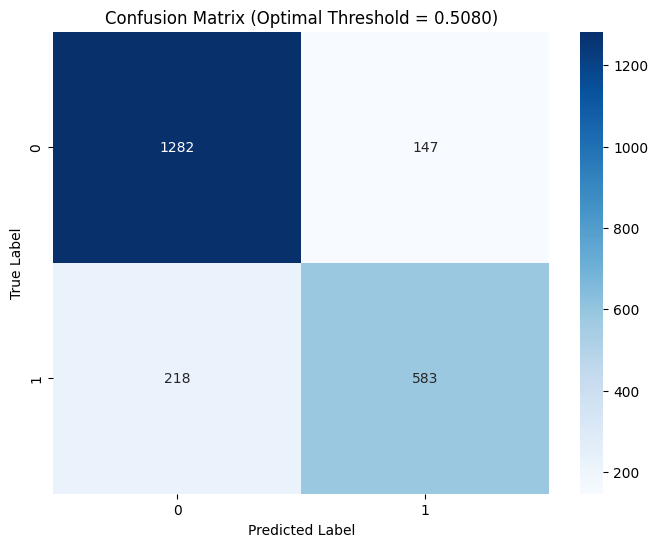

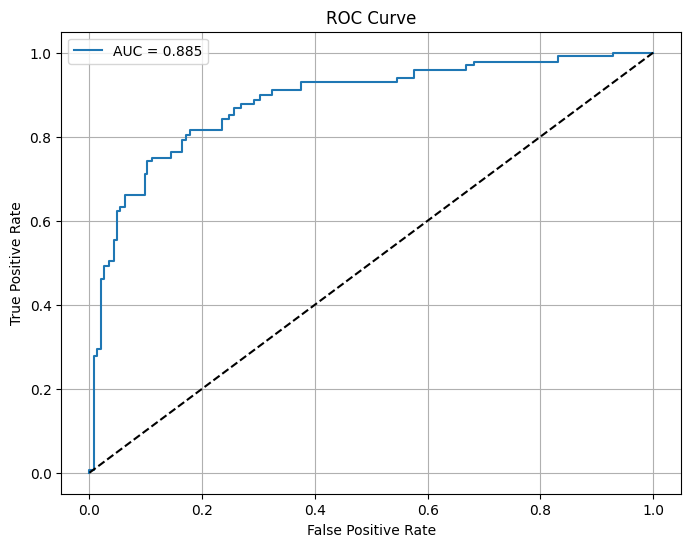

In [7]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torchvision import models, transforms
from torch.optim.lr_scheduler import CosineAnnealingLR  # Switched scheduler
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve, precision_recall_curve, precision_score, recall_score)
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import time
import pickle
from PIL import Image
from typing import Dict, List, Any
from torchinfo import summary
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2

# =================================================================================
# >> 1. CONFIGURATION & HYPERPARAMETERS
# =================================================================================

# --- Paths ---
BASE_CSV_PATH = '/kaggle/input/symile-mimic-1-0-0/symile-mimic-1.0.0/CSV'
BASE_IMAGE_PATH = '/kaggle/input/symile-mimic-1-0-0/symile-mimic-1.0.0/Images'
BASE_ECG_PATH = '/kaggle/input/symile-mimic-1-0-0/symile-mimic-1.0.0/ECG'

# --- Training Hyperparameters ---
TARGET_CLASS = 'Edema'
BATCH_SIZE = 32
NUM_EPOCHS = 20
INITIAL_LR = 1e-4
UNFREEZE_LR_CXR = 1e-5 
UNFREEZE_LR_ECG = 1e-4 
WEIGHT_DECAY = 0.01
UNFREEZE_EPOCH = 4
EARLY_STOPPING_PATIENCE = 5

# --- Mappings for Data Loader ---
SPLIT_IMAGE_FOLDERS = {'train': 'train_images', 'val': 'val_images', 'test': 'test_images'}
SPLIT_ECG_FOLDERS = {'train': 'train', 'val': 'val', 'test': 'test'}

# =================================================================================
# >> 2. ADVANCED AUGMENTATIONS & DATA LOADING
# =================================================================================

def get_transforms():
    # Using Albumentations for more powerful image augmentation
    train_transform = A.Compose([
        A.Resize(256, 256),
        A.RandomCrop(224, 224),
        A.HorizontalFlip(p=0.5),
        # FIX: Replaced deprecated ShiftScaleRotate with Affine
        A.Affine(
            scale=(0.95, 1.05), 
            translate_percent=(-0.05, 0.05), 
            rotate=(-10, 10), 
            p=0.5
        ),
        A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=0.5),
        A.ElasticTransform(p=0.5), # Good for medical images
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2()
    ])
    
    val_test_transform = A.Compose([
        A.Resize(224, 224),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2()
    ])
    return train_transform, val_test_transform

def load_multimodal_dataset(class_name: str) -> Dict[str, Dict[str, Any]]:
    if not os.path.exists(BASE_CSV_PATH):
        print(f"Error: Base CSV path not found: {BASE_CSV_PATH}")
        return {}

    result_data = {}
    condition_csv_path = os.path.join(BASE_CSV_PATH, class_name)
    print(f"\n--- Starting Multimodal Data Load for Class: {class_name} ---")

    for split_type in SPLIT_IMAGE_FOLDERS.keys():
        csv_path = os.path.join(condition_csv_path, f'{class_name}_{split_type}.csv')
        verified_rows, verified_image_paths, verified_ecg_paths = [], [], []

        if os.path.exists(csv_path):
            try:
                df = pd.read_csv(csv_path)
                print(f"  Loaded {split_type} CSV: {len(df):,} total entries.")
                base_img_folder = os.path.join(BASE_IMAGE_PATH, SPLIT_IMAGE_FOLDERS[split_type])
                base_ecg_folder = os.path.join(BASE_ECG_PATH, SPLIT_ECG_FOLDERS[split_type], 'files')

                if os.path.exists(base_img_folder) and os.path.exists(base_ecg_folder):
                    for _, row in df.iterrows():
                        img_filename = os.path.basename(str(row['cxr_path']).replace('\\', '/'))
                        full_img_path = os.path.join(base_img_folder, img_filename)
                        
                        path_parts = str(row['ecg_path']).replace('\\', '/').split('/')
                        full_ecg_path = None
                        if len(path_parts) >= 4:
                            p_id, s_id, study_id, ecg_id = path_parts[-4:]
                            prospective_path = os.path.join(base_ecg_folder, p_id, s_id, study_id, f"{ecg_id}.npy")
                            if os.path.exists(prospective_path):
                                full_ecg_path = prospective_path
                        
                        if os.path.exists(full_img_path) and full_ecg_path:
                            verified_image_paths.append(full_img_path)
                            verified_ecg_paths.append(full_ecg_path)
                            verified_rows.append(row)

                print(f"  Verified CXR-ECG Pairs: {len(verified_image_paths):,}")
            except Exception as e:
                print(f"  Error processing {csv_path}: {e}")
        else:
            print(f"  Warning: CSV not found for {split_type} at {csv_path}")

        result_data[split_type] = {
            'df': pd.DataFrame(verified_rows).reset_index(drop=True),
            'image_paths': verified_image_paths,
            'ecg_paths': verified_ecg_paths
        }
    print(f"--- Successfully Loaded Multimodal Dataset for {class_name} ---")
    return result_data


class MultiModalDataset(Dataset):
    def __init__(self, dataframe, image_paths, ecg_paths, condition_name, image_transform=None, is_train=False):
        self.dataframe = dataframe
        self.image_paths = image_paths
        self.ecg_paths = ecg_paths
        self.condition_name = condition_name
        self.image_transform = image_transform
        self.is_train = is_train

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Image Loading with OpenCV for Albumentations
        image = cv2.imread(self.image_paths[idx])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.image_transform:
            image = self.image_transform(image=image)['image']
        else:  # Fallback
            image = transforms.ToTensor()(image)

        # ECG
        ecg = np.load(self.ecg_paths[idx])
        if ecg.ndim == 3: ecg = np.squeeze(ecg)

        if self.is_train:  # Augment ECG
            shift = np.random.randint(-100, 101)
            ecg = np.roll(ecg, shift, axis=0)
            ecg = ecg * np.random.uniform(0.9, 1.1)
            noise = np.random.randn(*ecg.shape) * np.std(ecg) * 0.01
            ecg = ecg + noise

        ecg_tensor = torch.tensor(ecg, dtype=torch.float32).permute(1, 0)

        label = torch.tensor(self.dataframe.iloc[idx][self.condition_name], dtype=torch.float32)
        return image, ecg_tensor, label

# =================================================================================
# >> 3. FOCAL LOSS & IMPROVED MODEL ARCHITECTURE
# =================================================================================

class FocalLoss(nn.Module):
    def __init__(self, alpha=0.6, gamma=2.0, reduction='mean'):  # IMPROVEMENT: Adjusted alpha
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        # Calculate alpha-weighted loss
        at = self.alpha * targets + (1 - self.alpha) * (1 - targets)
        F_loss = at * (1 - pt)**self.gamma * BCE_loss
        return torch.mean(F_loss) if self.reduction == 'mean' else torch.sum(F_loss)


class Custom1DCNN(nn.Module):
    def __init__(self):
        super(Custom1DCNN, self).__init__()
        self.features = nn.Sequential(
            self._make_conv_block(12, 64, 5),
            self._make_conv_block(64, 128, 5),
            self._make_conv_block(128, 256, 3),
            nn.AdaptiveAvgPool1d(1)
        )
        self.feature_extractor_fc = nn.Sequential(nn.Linear(256, 128), nn.ReLU(True), nn.Dropout(0.5))
    
    def _make_conv_block(self, in_c, out_c, k_size):
        return nn.Sequential(
            nn.Conv1d(in_c, out_c, k_size, padding='same', bias=False),
            nn.BatchNorm1d(out_c), nn.ReLU(True), nn.MaxPool1d(2, 2))

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.feature_extractor_fc(x)


class FusionModel(nn.Module):
    def __init__(self, num_classes=1, pretrained_vgg=True):
        super(FusionModel, self).__init__()
        # --- CXR Branch (VGG16) ---
        self.vgg = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1 if pretrained_vgg else None)
        for param in self.vgg.features.parameters():
            param.requires_grad = False
        
        # IMPROVEMENT: Modernized VGG Head with Global Average Pooling
        num_vgg_features = self.vgg.features[-3].out_channels  # 512 for VGG16
        self.vgg.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.vgg.classifier = nn.Sequential(
            nn.Linear(num_vgg_features, 512),  # Reduced size
            nn.ReLU(True), nn.Dropout(0.5)
        )

        # --- ECG Branch (1D CNN) ---
        self.ecg_cnn = Custom1DCNN()
        
        # --- Fusion Classifier ---
        # Input features: 512 from VGG + 128 from ECG CNN
        self.fusion_classifier = nn.Sequential(
            nn.Linear(512 + 128, 256),  # Reduced size
            nn.ReLU(True), nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )
        
    def forward(self, cxr_input, ecg_input):
        # VGG forward pass with the new head
        cxr_features = self.vgg.features(cxr_input)
        cxr_features = self.vgg.avgpool(cxr_features)
        cxr_features = torch.flatten(cxr_features, 1)
        cxr_features = self.vgg.classifier(cxr_features)

        ecg_features = self.ecg_cnn(ecg_input)
        
        combined_features = torch.cat((cxr_features, ecg_features), dim=1)
        output = self.fusion_classifier(combined_features)
        return output

# =================================================================================
# >> 4. TRAIN & VALIDATE FUNCTIONS
# =================================================================================

def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    predictions, true_labels = [], []
    for images, ecgs, labels in tqdm(loader, desc="Training", leave=False):
        images, ecgs, labels = images.to(device), ecgs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images, ecgs)
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        predictions.extend(torch.sigmoid(outputs).cpu().detach().numpy())
        true_labels.extend(labels.cpu().numpy())
    
    predictions = np.array(predictions).squeeze()
    true_labels = np.array(true_labels)
    pred_labels = (predictions > 0.5).astype(int)
    return (running_loss / len(loader),
            accuracy_score(true_labels, pred_labels),
            f1_score(true_labels, pred_labels, zero_division=0),
            roc_auc_score(true_labels, predictions))

def validate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    predictions, true_labels = [], []
    with torch.no_grad():
        for images, ecgs, labels in tqdm(loader, desc="Validation", leave=False):
            images, ecgs, labels = images.to(device), ecgs.to(device), labels.to(device)
            outputs = model(images, ecgs)
            loss = criterion(outputs.squeeze(), labels.float())
            running_loss += loss.item()
            predictions.extend(torch.sigmoid(outputs).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    predictions = np.array(predictions).squeeze()
    true_labels = np.array(true_labels)
    pred_labels = (predictions > 0.5).astype(int)
    return (running_loss / len(loader),
            accuracy_score(true_labels, pred_labels),
            f1_score(true_labels, pred_labels, zero_division=0),
            roc_auc_score(true_labels, predictions))

# Main training loop with history saving
def main():
    print(f"--- Multimodal Fusion Model Training for: {TARGET_CLASS} ---")
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # --- Data Loading ---
    all_data = load_multimodal_dataset(class_name=TARGET_CLASS)
    if all_data['train']['df'].empty: return

    # --- Data Transforms ---
    train_transform, val_test_transform = get_transforms()

    # --- Datasets and Sampler ---
    train_dataset = MultiModalDataset(all_data['train']['df'], all_data['train']['image_paths'], all_data['train']['ecg_paths'], TARGET_CLASS, train_transform, is_train=True)
    val_dataset = MultiModalDataset(all_data['val']['df'], all_data['val']['image_paths'], all_data['val']['ecg_paths'], TARGET_CLASS, val_test_transform)
    
    labels = all_data['train']['df'][TARGET_CLASS].values
    class_counts = np.bincount(labels.astype(int))
    class_weights = 1. / class_counts
    sample_weights = torch.from_numpy(np.array([class_weights[t] for t in labels.astype(int)]))
    sampler = WeightedRandomSampler(sample_weights.double(), len(sample_weights))

    # --- DataLoaders ---
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler, num_workers=2, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

    # --- Model, Loss, Optimizer ---
    model = FusionModel(num_classes=1).to(device)
    
    print("\n" + "="*80 + "\n" + " " * 25 + "Model Architecture Summary" + "\n" + "="*80)
    summary(model, input_size=[(BATCH_SIZE, 3, 224, 224), (BATCH_SIZE, 12, 5000)], device=device)
    print("="*80 + "\n")
        
    if torch.cuda.device_count() > 1:
        print(f"Using {torch.cuda.device_count()} GPUs! Wrapping model in DataParallel.")
        model = nn.DataParallel(model)
        
    criterion = FocalLoss()
    optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=INITIAL_LR, weight_decay=WEIGHT_DECAY)
    scheduler = CosineAnnealingLR(optimizer, T_max=NUM_EPOCHS, eta_min=1e-6) # IMPROVEMENT: Switched scheduler

    # --- Training Loop ---
    best_val_auc = 0.0
    epochs_no_improve = 0
    history = {k: [] for k in ['train_loss', 'train_acc', 'train_f1', 'train_auc', 'val_loss', 'val_acc', 'val_f1', 'val_auc']}

    print("\n" + "="*80 + "\n" + " " * 28 + "STARTING MODEL TRAINING" + "\n" + "="*80 + "\n")

    for epoch in tqdm(range(NUM_EPOCHS), desc="Total Epochs"):
        if epoch == UNFREEZE_EPOCH:
            print("\n" + "="*50 + f"\nEpoch {epoch+1}: Unfreezing last TWO VGG blocks.\n" + "="*50)
            model_to_unfreeze = model.module if isinstance(model, nn.DataParallel) else model
            for param in model_to_unfreeze.vgg.features[17:].parameters():
                param.requires_grad = True
            
            optimizer = torch.optim.AdamW([
                {'params': model_to_unfreeze.vgg.features[17:].parameters(), 'lr': UNFREEZE_LR_CXR},
                {'params': model_to_unfreeze.vgg.classifier.parameters(), 'lr': INITIAL_LR},
                {'params': model_to_unfreeze.ecg_cnn.parameters(), 'lr': UNFREEZE_LR_ECG},
                {'params': model_to_unfreeze.fusion_classifier.parameters(), 'lr': INITIAL_LR}
            ], weight_decay=WEIGHT_DECAY)
            scheduler = CosineAnnealingLR(optimizer, T_max=NUM_EPOCHS-UNFREEZE_EPOCH, eta_min=1e-6)

        start_time = time.time()
        train_loss, train_acc, train_f1, train_auc = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc, val_f1, val_auc = validate(model, val_loader, criterion, device)
        
        for key, val in zip(history.keys(), [train_loss, train_acc, train_f1, train_auc, val_loss, val_acc, val_f1, val_auc]):
            history[key].append(val)
        
        print(f'\nEpoch {epoch+1}/{NUM_EPOCHS} | Time: {time.time() - start_time:.2f}s | LR: {optimizer.param_groups[0]["lr"]:.1e}')
        print(f'Training:   Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, F1: {train_f1:.4f}, AUC: {train_auc:.4f}')
        print(f'Validation: Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, F1: {val_f1:.4f}, AUC: {val_auc:.4f}')
        
        scheduler.step()

        if val_auc > best_val_auc:
            best_val_auc = val_auc
            epochs_no_improve = 0
            state_dict = model.module.state_dict() if isinstance(model, nn.DataParallel) else model.state_dict()
            torch.save(state_dict, f'best_{TARGET_CLASS}_fusion_model_optimized.pth')
            print(f'---> CHECKPOINT: New best model saved with validation AUC: {val_auc:.4f}')
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= EARLY_STOPPING_PATIENCE:
                print(f"--- CHECKPOINT: Early stopping triggered after {EARLY_STOPPING_PATIENCE} epochs without improvement. ---")
                break

    # --- Plot Training and Validation Loss ---
    plt.figure(figsize=(10, 5))
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'{TARGET_CLASS} - Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{TARGET_CLASS}_loss_curve.png')
    plt.show()

    evaluate_on_test_set(TARGET_CLASS, all_data, val_test_transform, device)


# =================================================================================
# >> 6. FINAL EVALUATION ON TEST SET
# =================================================================================
def evaluate_on_test_set(class_name, all_data, transform, device):
    print("\n" + "="*25 + " FINAL EVALUATION ON TEST SET " + "="*25)
    
    model = FusionModel(num_classes=1).to(device)
    model_path = f'best_{class_name}_fusion_model_optimized.pth'
    print(f"\n--- CHECKPOINT: Loading best model from '{model_path}' for final testing ---")
    model.load_state_dict(torch.load(model_path))
    model.eval()

    test_dataset = MultiModalDataset(all_data['test']['df'], all_data['test']['image_paths'], all_data['test']['ecg_paths'], class_name, transform)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
    
    y_true, y_prob = [], []
    with torch.no_grad():
        for images, ecgs, labels in tqdm(test_loader, desc="Testing"):
            images, ecgs = images.to(device), ecgs.to(device)
            outputs = model(images, ecgs)
            y_true.extend(labels.numpy())
            y_prob.extend(torch.sigmoid(outputs).cpu().numpy())
    
    y_true, y_prob = np.array(y_true), np.array(y_prob).squeeze()

    precision, recall, thresholds = precision_recall_curve(y_true, y_prob)
    f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1] + 1e-9)
    best_threshold = thresholds[np.argmax(f1_scores)]
    print(f"\nOptimal Threshold on Test Set: {best_threshold:.4f}")

    y_pred_optimal = (y_prob > best_threshold).astype(int)
    
    auc_score = roc_auc_score(y_true, y_prob)
    print("\n--- Test Set Metrics (Optimal Threshold) ---")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred_optimal):.4f}")
    print(f"F1-Score:  {f1_score(y_true, y_pred_optimal, zero_division=0):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred_optimal, zero_division=0):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred_optimal, zero_division=0):.4f}")
    print(f"AUC:       {auc_score:.4f}")
    
    print("\nClassification Report (Optimal Threshold):")
    print(classification_report(y_true, y_pred_optimal, target_names=['Negative', 'Positive']))

    cm = confusion_matrix(y_true, y_pred_optimal)
    plt.figure(figsize=(8, 6)); sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Optimal Threshold = {best_threshold:.4f})'), plt.ylabel('True Label'), plt.xlabel('Predicted Label')
    plt.savefig('fusion_confusion_matrix_optimized.png'), plt.show()

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.figure(figsize=(8, 6)); plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
    plt.plot([0, 1], [0, 1], 'k--'), plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate'), plt.title('ROC Curve')
    plt.legend(), plt.grid(True), plt.savefig('fusion_roc_curve_optimized.png'), plt.show()

if __name__ == "__main__":
    main()
